<a href="https://colab.research.google.com/github/ekomissarov/data-analysis/blob/main/Lifetime_proj.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#importing

In [1]:
#@title importing libraries
from google.colab import drive
import pandas as pd
import numpy as np
import time
from datetime import date, datetime, timedelta
import seaborn as sns
from matplotlib import pyplot as plt

sns.set_style("darkgrid")
sns.set_context("paper")

def display_df(df=None):
    with pd.option_context('display.max_rows', None, 'display.max_columns', None):  # more options can be specified also
        display(df)



In [2]:
#@title mounting Google drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


#CSV loading

In [3]:
#@title reading original csv
dataset = 1
if dataset == 1:
    sessions = pd.read_csv('gdrive/MyDrive/public_data/sessions.csv')
    sessions['session_start'] = pd.to_datetime(sessions['session_start'])

    orders = pd.read_csv('gdrive/MyDrive/public_data/book_orders.csv')
    orders['event_dt'] = pd.to_datetime(orders['event_dt'])

    adcosts = pd.read_csv('gdrive/MyDrive/public_data/ad_costs_new.csv')
    adcosts['dt'] = pd.to_datetime(adcosts['dt']).dt.date


    events = pd.read_csv('gdrive/MyDrive/public_data/events.csv')
    events['event_time'] = pd.to_datetime(events['event_time'])

    _HORIZON = 7
    _LAST_COHORT = (sessions.session_start.max()-timedelta(_HORIZON)).date()

elif dataset == 2:
    sessions = pd.read_csv('gdrive/MyDrive/public_data/ch04_final_visits.csv')
    sessions['session_start'] = pd.to_datetime(sessions['session_start'])
    sessions = sessions.drop(columns=['last_ts'])

    orders = pd.read_csv('gdrive/MyDrive/public_data/ch04_final_orders.csv')
    orders['event_dt'] = pd.to_datetime(orders['event_dt'])

    adcosts = pd.read_csv('gdrive/MyDrive/public_data/ch04_final_costs.csv')
    adcosts['dt'] = pd.to_datetime(adcosts['dt']).dt.date
    adcosts = adcosts.groupby(['dt', 'channel']).min().reset_index()


    events = pd.read_csv('gdrive/MyDrive/public_data/ch04_final_events.csv')
    events['event_dt'] = pd.to_datetime(events['event_dt'])
    events.rename(columns={'event_dt': 'event_time', 'user_id': 'uid'}, inplace=True)

    observation_date = datetime(2020, 1, 1).date()  # момент анализа
    _HORIZON = 7
    _LAST_COHORT = observation_date - timedelta(_HORIZON)

print(f"horison: {_HORIZON}, \nLAST_COHORT: {_LAST_COHORT}")

horison: 7, 
LAST_COHORT: 2019-05-07


In [4]:
#@title PREVIEW sessions journal display
print(f"min session start: {sessions.session_start.min()}, \nmax session start: {sessions.session_start.max()}\n")
print(f"unique users: {sessions.user_id.nunique()}\n\n")
display(sessions)

min session start: 2019-05-01 00:00:34, 
max session start: 2019-05-14 23:59:51

unique users: 141419




user_id         region   device  channel  session_duration  \
0        94834909438        Germany   iPhone   Yandex          5.417238   
1       142292250445  United States   iPhone  Organic         33.232475   
2       486879489291  United States      Mac  Organic         33.635569   
3       996478278264        Germany   iPhone   Yandex         76.792801   
4       857023407503  United States  Android  Organic          5.976421   
...              ...            ...      ...      ...               ...   
282932  507281681954  United States       PC  Organic          6.316422   
282933  584727896171         France       PC  Organic         51.814506   
282934  200769562990  United States  Android  Organic         15.380831   
282935  569449250064        Germany   iPhone  Organic         24.139972   
282936  477066637255  United States  Android   Yandex         10.855441   

             session_start  
0      2019-05-01 12:59:48  
1      2019-05-01 21:25:00  
2      2019-05-01 21:18:40  
3      2019-05-01 07:37:52  
4      2019-05-01 01:35:01  
...                    ...  
282932 2019-05-14 06:35:22  
282933 2019-05-14 18:23:01  
282934 2019-05-14 16:20:10  
282935 2019-05-14 09:15:01  
282936 2019-05-14 09:01:11  

[282937 rows x 6 columns]

In [5]:
#@title PREVIEW orders journal display
display(orders)

user_id            event_dt  revenue
0       55519067947 2019-05-01 06:49:16     4.99
1      831753022495 2019-05-01 05:13:14     4.99
2      284598472478 2019-05-01 17:30:59     4.99
3      725363192554 2019-05-01 04:43:16     4.99
4      324356134597 2019-05-01 23:05:43     4.99
...             ...                 ...      ...
21162  353771910308 2019-05-14 19:04:47     4.99
21163  166096415686 2019-05-14 15:24:08     4.99
21164  456767093617 2019-05-14 05:07:56     4.99
21165  352534243935 2019-05-14 23:55:17     4.99
21166  507281681954 2019-05-14 06:35:25     4.99

[21167 rows x 3 columns]

In [6]:
#@title EXAMPLE journal
tmp = sessions[['user_id', 'region', 'device', 'channel', 'session_start']]
tmp = tmp.rename(columns={'session_start': 'event_ts'})
tmp['event_name'] = 'registration/login/other action/card linked'
tmp['other_dimensions...'] = 'other dims for analysis (ex quiz)'
display(tmp[['user_id', 'region', 'device', 'channel', 'other_dimensions...', 'event_name', 'event_ts']])
display(events)

user_id         region   device  channel  \
0        94834909438        Germany   iPhone   Yandex   
1       142292250445  United States   iPhone  Organic   
2       486879489291  United States      Mac  Organic   
3       996478278264        Germany   iPhone   Yandex   
4       857023407503  United States  Android  Organic   
...              ...            ...      ...      ...   
282932  507281681954  United States       PC  Organic   
282933  584727896171         France       PC  Organic   
282934  200769562990  United States  Android  Organic   
282935  569449250064        Germany   iPhone  Organic   
282936  477066637255  United States  Android   Yandex   

                      other_dimensions...  \
0       other dims for analysis (ex quiz)   
1       other dims for analysis (ex quiz)   
2       other dims for analysis (ex quiz)   
3       other dims for analysis (ex quiz)   
4       other dims for analysis (ex quiz)   
...                                   ...   
282932  other dims for analysis (ex quiz)   
282933  other dims for analysis (ex quiz)   
282934  other dims for analysis (ex quiz)   
282935  other dims for analysis (ex quiz)   
282936  other dims for analysis (ex quiz)   

                                         event_name            event_ts  
0       registration/login/other action/card linked 2019-05-01 12:59:48  
1       registration/login/other action/card linked 2019-05-01 21:25:00  
2       registration/login/other action/card linked 2019-05-01 21:18:40  
3       registration/login/other action/card linked 2019-05-01 07:37:52  
4       registration/login/other action/card linked 2019-05-01 01:35:01  
...                                             ...                 ...  
282932  registration/login/other action/card linked 2019-05-14 06:35:22  
282933  registration/login/other action/card linked 2019-05-14 18:23:01  
282934  registration/login/other action/card linked 2019-05-14 16:20:10  
282935  registration/login/other action/card linked 2019-05-14 09:15:01  
282936  registration/login/other action/card linked 2019-05-14 09:01:11  

[282937 rows x 7 columns]

event_name          event_time       uid
0       pageview 2019-08-20 00:27:30  80419792
1       pageview 2019-01-29 08:11:30  74610198
2       pageview 2019-01-29 01:33:02    101714
3       pageview 2019-02-22 19:41:04  90089350
4       pageview 2019-03-04 12:49:09  98247028
...          ...                 ...       ...
15572    payment 2019-04-01 19:27:41  28487647
15573    payment 2019-04-01 19:29:20  28487647
15574    payment 2019-04-01 19:29:23  28487647
15575    payment 2019-04-01 19:29:29  28487647
15576    payment 2019-04-01 19:33:25  28487647

[15577 rows x 3 columns]

In [7]:
#@title PREVIEW adcosts data
display(adcosts)

dt        channel      costs
0   2019-05-01  AnotherSource  1826.0000
1   2019-05-02  AnotherSource  1443.0000
2   2019-05-03  AnotherSource  1508.0000
3   2019-05-04  AnotherSource  1911.0000
4   2019-05-05  AnotherSource  1837.0000
5   2019-05-06  AnotherSource  2192.3000
6   2019-05-07  AnotherSource  1846.9000
7   2019-05-08  AnotherSource  1664.3000
8   2019-05-09  AnotherSource  1653.3000
9   2019-05-10  AnotherSource  1931.6000
10  2019-05-11  AnotherSource  1987.6500
11  2019-05-12  AnotherSource  1768.2000
12  2019-05-13  AnotherSource  2038.0500
13  2019-05-14  AnotherSource  1617.0000
14  2019-05-15  AnotherSource  1536.1500
15  2019-05-01         Yandex   848.0000
16  2019-05-02         Yandex   734.7500
17  2019-05-03         Yandex   833.2500
18  2019-05-04         Yandex  1065.0750
19  2019-05-05         Yandex  1035.3750
20  2019-05-06         Yandex  1014.8250
21  2019-05-07         Yandex   840.2625
22  2019-05-08         Yandex   764.9250
23  2019-05-09         Yandex   703.4750
24  2019-05-10         Yandex   830.7750
25  2019-05-11         Yandex   921.9750
26  2019-05-12         Yandex   817.7500
27  2019-05-13         Yandex   918.0000
28  2019-05-14         Yandex   764.5000
29  2019-05-15         Yandex   728.0000

In [8]:
#@title PREVIEW events
display(events)
display(events.event_name.unique())

event_name          event_time       uid
0       pageview 2019-08-20 00:27:30  80419792
1       pageview 2019-01-29 08:11:30  74610198
2       pageview 2019-01-29 01:33:02    101714
3       pageview 2019-02-22 19:41:04  90089350
4       pageview 2019-03-04 12:49:09  98247028
...          ...                 ...       ...
15572    payment 2019-04-01 19:27:41  28487647
15573    payment 2019-04-01 19:29:20  28487647
15574    payment 2019-04-01 19:29:23  28487647
15575    payment 2019-04-01 19:29:29  28487647
15576    payment 2019-04-01 19:33:25  28487647

[15577 rows x 3 columns]

array(['pageview', 'add_to_cart', 'checkout', 'payment'], dtype=object)

# User profiles

In [9]:
#@title get_profiles function
def get_profiles(sessions, purchase_events=None, events=None, ad_costs=None, event_names=[]):
    """
    На вход принимает "журнал посещений" и "журнал заказов".
    А так же журнал событий и рекламные затраты

    Журнал посещений содержит следующие обязательные поля:
    user_id, session_start, session_duration, и др. доп информация такая как устройство, гео, язык и пр.
    На вход можно передать журнал покупок, который содержит user_id, дату покупки и сумму покупки

    Функция возвращает профили пользователей
    user_id
    first_ts момент первой сессии, обычно это дата, вычесленная по журналу посещений (на анализируемом периоде),
             доп информацию первого посещения (момент первой сессии и доп инфу необходимо обработать отдельно дописав код функции),
    cohort_moment по журналу посещений, дату когорты пользователя,
    purchase_event является ли пользователь покупателем (если передан журнал покупок)
    другие события если передан журнал событий и их названия
    cohort_cac если переданы рекламные затраты
    """
    profiles = (
        sessions.sort_values(by=['user_id', 'session_start'])
        .groupby('user_id')
        .agg(
            {
                'session_start': 'first',
                'channel': 'first',
                'device': 'first',
                'region': 'first',
                # другие параметры
            }
        )
        .rename(columns={
            'user_id': 'user_id',
            'session_start': 'first_ts',
            'channel': 'first_channel',
            'device': 'first_device',
            'region': 'first_region',
        }).reset_index()
    )

    profiles['cohort_moment'] = profiles['first_ts'].dt.date
    #profiles['cohort_moment'] = profiles['first_ts'].to_numpy().astype('datetime64[M]')

    # добавляем флаги покупок, дату первой покупки и сумму первой покупки
    if purchase_events is not None:
        first_purchase = (
            purchase_events
            .sort_values(by=['user_id', 'event_dt'])
            .groupby('user_id')
            .agg({
                'event_dt': 'first',
                'revenue': 'first'
            })
            .rename(columns={'revenue': 'first_revenue',
                             'event_dt': 'first_purchase'})
            .reset_index()
        )
        profiles = profiles.merge(first_purchase, how='left', on='user_id')
        profiles['purchase_event'] = profiles['user_id'].isin(first_purchase.user_id.unique())


    # добавляем флаги для всех событий из event_names
    if events is not None:
        for ev in event_names:
            if ev in events['event_name'].unique():
                # проверяем, встречается ли каждый пользователь
                # среди тех, кто совершил событие event
                profiles[ev] = profiles['user_id'].isin(events.query('event_name == @ev')['uid'].unique())

    if ad_costs is not None:
        # считаем количество уникальных пользователей
        # с одинаковыми источником и датой привлечения
        new_users = (
            profiles.groupby(['cohort_moment', 'first_channel'])
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'unique_users'})
            .reset_index()
        )

        # объединяем траты на рекламу и число привлечённых пользователей
        # по дате и каналу привлечения и вычисляем CAC
        ad_costs = ad_costs.merge(
            new_users,
            left_on=['dt', 'channel'],
            right_on=['cohort_moment', 'first_channel'],
            how='left').drop(columns=['dt', 'channel'])
        ad_costs['cohort_cac'] = ad_costs['costs'] / ad_costs['unique_users']

        # добавим стоимость привлечения в профили
        profiles = profiles.merge(ad_costs, on=['cohort_moment', 'first_channel'], how='left')

        # органические пользователи не связаны с данными о рекламе,
        # поэтому в столбце cohort_cac у них значения NaN
        # заменим их на ноль, ведь стоимость привлечения равна нулю
        profiles['cohort_cac'] = profiles['cohort_cac'].fillna(0)

    if profiles.user_id.nunique() != len(profiles):
        raise Exception("Profiling error")

    return profiles


# строим профили по двум наборам данных
profiles = get_profiles(sessions, purchase_events=orders, ad_costs=adcosts, events=None, event_names=[])

print(f"min cohort_moment {profiles.cohort_moment.min()}, \nmax cohort_moment {profiles.cohort_moment.max()}\n\n")
display(profiles.sort_values('cohort_moment'))

min cohort_moment 2019-05-01, 
max cohort_moment 2019-05-14




user_id            first_ts  first_channel first_device  \
57417   407805747618 2019-05-01 09:38:46        Organic       iPhone   
122462  867466635372 2019-05-01 05:12:16        Organic           PC   
12864    91741219309 2019-05-01 11:39:04  AnotherSource          Mac   
83071   590630125429 2019-05-01 19:01:34         Yandex       iPhone   
39726   281550309697 2019-05-01 09:59:47        Organic          Mac   
...              ...                 ...            ...          ...   
14237   101455902427 2019-05-14 00:22:34  AnotherSource       iPhone   
72202   513708768291 2019-05-14 21:42:28        Organic       iPhone   
14238   101468485660 2019-05-14 07:20:55        Organic      Android   
11237    79918056452 2019-05-14 18:03:53        Organic      Android   
134230  950406710928 2019-05-14 17:34:43         Yandex          Mac   

              first_region cohort_moment first_purchase  first_revenue  \
57417        United States    2019-05-01            NaT            NaN   
122462       United States    2019-05-01            NaT            NaN   
12864        United States    2019-05-01            NaT            NaN   
83071        United States    2019-05-01            NaT            NaN   
39726   Russian Federation    2019-05-01            NaT            NaN   
...                    ...           ...            ...            ...   
14237   Russian Federation    2019-05-14            NaT            NaN   
72202   Russian Federation    2019-05-14            NaT            NaN   
14238               France    2019-05-14            NaT            NaN   
11237        United States    2019-05-14            NaT            NaN   
134230  Russian Federation    2019-05-14            NaT            NaN   

        purchase_event   costs  unique_users  cohort_cac  
57417            False     NaN           NaN    0.000000  
122462           False     NaN           NaN    0.000000  
12864            False  1826.0        1867.0    0.978040  
83071            False   848.0        3404.0    0.249119  
39726            False     NaN           NaN    0.000000  
...                ...     ...           ...         ...  
14237            False  1617.0        1576.0    1.026015  
72202            False     NaN           NaN    0.000000  
14238            False     NaN           NaN    0.000000  
11237            False     NaN           NaN    0.000000  
134230           False   764.5        3087.0    0.247651  

[141419 rows x 12 columns]

In [10]:
#@title EXAMPLE building profiles with event
if dataset == 1:
    events.loc[(events.event_name=='add_to_cart')
                       &(events.uid==3918159), 'uid'
    ]=94834909438
    tmp = get_profiles(sessions,
                 purchase_events=orders, ad_costs=adcosts,
                 events=events, event_names=['add_to_cart']
    )
    tmp[tmp.add_to_cart]

In [11]:
#@title join_sessions_with_profiles function
def join_sessions_with_profiles(sessions, profiles):
    """
    склеиваем журнал посещений с профилями пользователей
    и вычисляем для каждой записи журнала lifetime (в нужном интервале, минуты, дни, месяца)
    добавляет поле-классификатор периодов lifetime

    возвращает отсортированную таблицу по user_id и session_start
    """
    result = profiles.merge(sessions, on='user_id', how='left') \
        .sort_values(by=['user_id', 'session_start'], ascending=[True, True]) \
        .reset_index(drop=True)
    result['lifetime_periods'] = (result['session_start'] - result['first_ts']).dt.days
    #result['lifetime_periods'] = (result['session_start'] - result['first_ts']).dt.total_seconds()/60

    def lt_grp(periods):
        if periods<=1:
            return "Новички"
        elif periods<=7:
            return "Менее недели"
        return "Более недели"

    result['lifetime_group'] = result.lifetime_periods.map(lt_grp)
    return result

join_sessions_with_profiles(sessions, profiles)

user_id            first_ts  first_channel first_device  \
0           10964006 2019-05-12 04:50:17         Yandex          Mac   
1           10964006 2019-05-12 04:50:17         Yandex          Mac   
2           10964006 2019-05-12 04:50:17         Yandex          Mac   
3           12358165 2019-05-10 23:16:24         Yandex       iPhone   
4           12358165 2019-05-10 23:16:24         Yandex       iPhone   
...              ...                 ...            ...          ...   
282932  999954663782 2019-05-04 09:57:28  AnotherSource      Android   
282933  999957797889 2019-05-14 21:54:26         Yandex      Android   
282934  999974288578 2019-05-07 03:42:53        Organic       iPhone   
282935  999996691258 2019-05-05 09:27:58  AnotherSource       iPhone   
282936  999996691258 2019-05-05 09:27:58  AnotherSource       iPhone   

              first_region cohort_moment      first_purchase  first_revenue  \
0                  Germany    2019-05-12 2019-05-13 04:00:32           4.99   
1                  Germany    2019-05-12 2019-05-13 04:00:32           4.99   
2                  Germany    2019-05-12 2019-05-13 04:00:32           4.99   
3            United States    2019-05-10                 NaT            NaN   
4            United States    2019-05-10                 NaT            NaN   
...                    ...           ...                 ...            ...   
282932       United States    2019-05-04                 NaT            NaN   
282933  Russian Federation    2019-05-14                 NaT            NaN   
282934              France    2019-05-07                 NaT            NaN   
282935  Russian Federation    2019-05-05                 NaT            NaN   
282936  Russian Federation    2019-05-05                 NaT            NaN   

        purchase_event     costs  unique_users  cohort_cac  \
0                 True   817.750        3281.0    0.249238   
1                 True   817.750        3281.0    0.249238   
2                 True   817.750        3281.0    0.249238   
3                False   830.775        3470.0    0.239416   
4                False   830.775        3470.0    0.239416   
...                ...       ...           ...         ...   
282932           False  1911.000        1965.0    0.972519   
282933           False   764.500        3087.0    0.247651   
282934           False       NaN           NaN    0.000000   
282935           False  1837.000        1910.0    0.961780   
282936           False  1837.000        1910.0    0.961780   

                    region   device        channel  session_duration  \
0                  Germany      Mac         Yandex         18.358495   
1                  Germany      Mac         Yandex          9.317945   
2                  Germany      Mac         Yandex         21.288979   
3            United States   iPhone         Yandex          7.406291   
4            United States   iPhone         Yandex          0.953297   
...                    ...      ...            ...               ...   
282932       United States  Android  AnotherSource         18.319029   
282933  Russian Federation  Android         Yandex         19.478615   
282934              France   iPhone        Organic          4.526489   
282935  Russian Federation   iPhone  AnotherSource         16.594600   
282936  Russian Federation   iPhone  AnotherSource         20.978822   

             session_start  lifetime_periods lifetime_group  
0      2019-05-12 04:50:17                 0        Новички  
1      2019-05-13 04:00:27                 0        Новички  
2      2019-05-14 04:21:06                 1        Новички  
3      2019-05-10 23:16:24                 0        Новички  
4      2019-05-11 11:01:14                 0        Новички  
...                    ...               ...            ...  
282932 2019-05-04 09:57:28                 0        Новички  
282933 2019-05-14 21:54:26                 0        Новички  
282934 2019-05-07 03:42:53     

In [12]:
#@title lifetime group unique users
# посчитаем количество уникальных пользователей по полю классификатору периодов Lifetime
# можно использовать именно count, а не nunique потому что мы уже сгруппировали датафрейм по user_id
# берем последнюю (last) запись user_id, т.к. мы рассчитываем что работаем с упорядоченным журналом по user_id и session_start
display(
    join_sessions_with_profiles(sessions, profiles) \
    .groupby('user_id').last().reset_index() \
    .groupby('lifetime_group')[['user_id', 'purchase_event']].agg({'user_id': 'count', 'purchase_event': 'sum'})
)

user_id  purchase_event
lifetime_group                         
Более недели       8724            1811
Менее недели      41092            6041
Новички           91603            5213

In [13]:
#@title EXAMPLE just one filtered user_id
# посмотрим данные журнала для одного из пользователей
# данные отсортированы по session_start
tmp = join_sessions_with_profiles(sessions, profiles)
tmp[tmp.user_id==899350127552]

user_id            first_ts  first_channel first_device  \
254136  899350127552 2019-05-01 00:00:34  AnotherSource      Android   
254137  899350127552 2019-05-01 00:00:34  AnotherSource      Android   
254138  899350127552 2019-05-01 00:00:34  AnotherSource      Android   
254139  899350127552 2019-05-01 00:00:34  AnotherSource      Android   
254140  899350127552 2019-05-01 00:00:34  AnotherSource      Android   
254141  899350127552 2019-05-01 00:00:34  AnotherSource      Android   
254142  899350127552 2019-05-01 00:00:34  AnotherSource      Android   
254143  899350127552 2019-05-01 00:00:34  AnotherSource      Android   
254144  899350127552 2019-05-01 00:00:34  AnotherSource      Android   

         first_region cohort_moment first_purchase  first_revenue  \
254136  United States    2019-05-01            NaT            NaN   
254137  United States    2019-05-01            NaT            NaN   
254138  United States    2019-05-01            NaT            NaN   
254139  United States    2019-05-01            NaT            NaN   
254140  United States    2019-05-01            NaT            NaN   
254141  United States    2019-05-01            NaT            NaN   
254142  United States    2019-05-01            NaT            NaN   
254143  United States    2019-05-01            NaT            NaN   
254144  United States    2019-05-01            NaT            NaN   

        purchase_event   costs  unique_users  cohort_cac         region  \
254136           False  1826.0        1867.0     0.97804  United States   
254137           False  1826.0        1867.0     0.97804  United States   
254138           False  1826.0        1867.0     0.97804  United States   
254139           False  1826.0        1867.0     0.97804  United States   
254140           False  1826.0        1867.0     0.97804  United States   
254141           False  1826.0        1867.0     0.97804  United States   
254142           False  1826.0        1867.0     0.97804  United States   
254143           False  1826.0        1867.0     0.97804  United States   
254144           False  1826.0        1867.0     0.97804  United States   

         device        channel  session_duration       session_start  \
254136  Android  AnotherSource         29.896842 2019-05-01 00:00:34   
254137       PC  AnotherSource         85.384231 2019-05-02 15:28:32   
254138       PC  AnotherSource         25.111850 2019-05-03 01:55:18   
254139       PC  AnotherSource         23.589122 2019-05-04 07:58:11   
254140       PC  AnotherSource         25.238101 2019-05-05 08:41:56   
254141       PC  AnotherSource          6.620370 2019-05-06 16:28:53   
254142       PC  AnotherSource         20.000071 2019-05-07 08:47:12   
254143       PC  AnotherSource         16.216031 2019-05-10 02:56:38   
254144       PC  AnotherSource         23.928395 2019-05-12 11:59:12   

        lifetime_periods lifetime_group  
254136                 0        Новички  
254137                 1        Новички  
254138                 2   Менее недели  
254139                 3   Менее недели  
254140                 4   Менее недели  
254141                 5   Менее недели  
254142                 6   Менее недели  
254143                 9   Более недели  
254144                11   Более недели

#Retention Rate
важнейший показатель для компаний, которые зарабатывают с пользователей напрямую. Например, для интернет-магазинов или сервисов, работающих по подписке. Ведь чем дольше привлечённый рекламой или другими способами клиент пользуется продуктом, тем больше потенциальная выручка. Полезен Retention Rate и для зарабатывающих на рекламе компаний — социальных сетей, поисковых систем. Чем дольше клиенты пользуются сервисом, тем больше показов рекламных объявлений можно продать.

In [14]:
#@title Ex. расчета Retention для минимальной (для одной) даты из журнала посещений
tmp = join_sessions_with_profiles(sessions, profiles)
tmp = tmp[tmp.cohort_moment==tmp.cohort_moment.min()].groupby('lifetime_periods')['user_id'].nunique().to_frame()
tmp['retention'] = [i/tmp.user_id.iloc[0] for i in tmp['user_id']]
tmp

user_id  retention
lifetime_periods                    
0                   10369   1.000000
1                    4213   0.406307
2                    3059   0.295014
3                    2415   0.232906
4                    1993   0.192208
5                    1750   0.168772
6                    1473   0.142058
7                    1418   0.136754
8                    1250   0.120552
9                    1107   0.106761
10                   1013   0.097695
11                    917   0.088437
12                    869   0.083808
13                    404   0.038962

In [15]:
#@title Ex. retention using slice example function
def get_retention_using_slice(sessions, profiles, slice=slice(0, None, None)):
    result = join_sessions_with_profiles(sessions, profiles)
    result = result.pivot_table(index='cohort_moment', columns='lifetime_periods', values='user_id', aggfunc='nunique')
    result = result.iloc[slice].apply(lambda x: pd.Series(x.dropna().values), axis=1).dropna(axis=1).sum().to_frame()
    result.columns = ['users', ]
    result['retention'] = [i/result.users.iloc[0] for i in result['users']]
    return result

get_retention_using_slice(sessions, profiles, slice(1, 5, 1))

users  retention
0  40166.0   1.000000
1   8770.0   0.218344
2   5321.0   0.132475
3   3609.0   0.089852
4   2791.0   0.069487
5   2199.0   0.054748
6   1849.0   0.046034
7   1578.0   0.039287
8   1399.0   0.034830
9   1182.0   0.029428

In [16]:
#@title get_retention function
def get_retention(sessions, profiles, last_cohort_moment, horizon, ignore_horizon=False, first_cohort_moment=None, dimensions=[]):
    """
    sessions - журнал посещений
    profiles - профили пользователей
    last_cohort_moment - последняя когорта которую берем в анализ (ограничение появляется естественным образом
                         если горизонт анализа выходит за момент анализа и когорта еще не прожила нужный период)
    horizon - горизонт анализа
    ignore_horizon - игнорировать горизонт? (True - выводим все доступные когорты (треугольная матрица);
                                             False - выводим только когорты [0..hirizon-1])
    first_cohort_moment - если хотим ограничить и не брать в анализ старые когорты
    """
    if not ignore_horizon:
        profiles_filtered = profiles[profiles.cohort_moment<=last_cohort_moment+timedelta(1)]
    else:
        profiles_filtered = profiles

    if first_cohort_moment is not None:
        profiles_filtered = profiles_filtered[profiles_filtered.cohort_moment>=first_cohort_moment]

    retention_raw = join_sessions_with_profiles(sessions, profiles_filtered)

    def group_by_dimensions(df, dims, horizon, ignore_horizon):
        if len(dims) == 0:
            df['cohort'] = "All users"
            dims = ['cohort']

        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )

        df_filtered = df
        if not ignore_horizon:
            df_filtered = df[df.lifetime_periods<horizon]

        cohorts_users = df_filtered.pivot_table(index=dims, columns='lifetime_periods', values='user_id', aggfunc='nunique')
        cohorts_users['cohort_size']=cohort_sizes
        cohorts_users = cohorts_users[['cohort_size'] + list(i for i in range(horizon if not ignore_horizon else len(cohorts_users.columns)-1) if i in cohorts_users.columns)]
        cohorts_users = cohorts_users.fillna(0)
        cohorts_retention = cohorts_users.div(cohorts_users['cohort_size'], axis=0)
        cohorts_retention['cohort_size'] = cohort_sizes

        return cohorts_users, cohorts_retention

    # агрегация без динамики ==
    cohorts_users, cohorts_retention = group_by_dimensions(retention_raw, dimensions, horizon, ignore_horizon)

    # агрегация с динамикой ==
    cohorts_users_in_time, cohorts_retention_in_time = group_by_dimensions(retention_raw, dimensions+['cohort_moment'], horizon, ignore_horizon)

    return retention_raw, cohorts_users, cohorts_retention, cohorts_users_in_time, cohorts_retention_in_time


_, \
cohorts_users, cohorts_retention, \
cohorts_users_dyn, cohorts_retention_dyn = get_retention(sessions, profiles,
                                                         last_cohort_moment=_LAST_COHORT,
                                                         horizon=_HORIZON, ignore_horizon=True,
                                                         #first_cohort_moment=(sessions.session_start.min()+timedelta(85)).date(),
                                                         dimensions=['first_device']
                                                        )
#display_df(cohorts_users_dyn)
display_df(cohorts_retention_dyn)

lifetime_periods            cohort_size    0         1         2         3  \
first_device cohort_moment                                                   
Android      2019-05-01            2093  1.0  0.400860  0.295270  0.233636   
             2019-05-02            1700  1.0  0.411176  0.300588  0.230588   
             2019-05-03            1812  1.0  0.200883  0.107616  0.059603   
             2019-05-04            2264  1.0  0.188163  0.102915  0.060954   
             2019-05-05            2266  1.0  0.141659  0.056929  0.038835   
             2019-05-06            2258  1.0  0.247121  0.136404  0.101417   
             2019-05-07            1923  1.0  0.244930  0.141446  0.097764   
             2019-05-08            1766  1.0  0.304643  0.177237  0.135334   
             2019-05-09            1860  1.0  0.363441  0.252151  0.188172   
             2019-05-10            2100  1.0  0.367143  0.262381  0.207143   
             2019-05-11            2297  1.0  0.365259  0.238572  0.111450   
             2019-05-12            1966  1.0  0.409461  0.164802  0.000000   
             2019-05-13            2230  1.0  0.263229  0.000000  0.000000   
             2019-05-14            1855  1.0  0.000000  0.000000  0.000000   
Mac          2019-05-01            2596  1.0  0.419877  0.310478  0.221880   
             2019-05-02            2163  1.0  0.377254  0.303282  0.233472   
             2019-05-03            2229  1.0  0.173172  0.108569  0.067295   
             2019-05-04            2793  1.0  0.186896  0.102041  0.058002   
             2019-05-05            2754  1.0  0.126725  0.055192  0.033043   
             2019-05-06            2902  1.0  0.247760  0.147140  0.100965   
             2019-05-07            2528  1.0  0.240111  0.134098  0.096123   
             2019-05-08            2223  1.0  0.285650  0.177688  0.133153   
             2019-05-09            2188  1.0  0.363346  0.265082  0.202011   
             2019-05-10            2594  1.0  0.362375  0.245952  0.212028   
             2019-05-11            2837  1.0  0.363412  0.244272  0.125132   
             2019-05-12            2446  1.0  0.400654  0.178659  0.000000   
             2019-05-13            2776  1.0  0.252522  0.000000  0.000000   
             2019-05-14            2325  1.0  0.000000  0.000000  0.000000   
PC           2019-05-01            1076  1.0  0.405204  0.301115  0.242565   
             2019-05-02             895  1.0  0.377654  0.311732  0.233520   
             2019-05-03             957  1.0  0.198537  0.090909  0.043887   
             2019-05-04            1229  1.0  0.165175  0.100895  0.063466   
             2019-05-05            1140  1.0  0.147368  0.048246  0.035088   
             2019-05-06            1160  1.0  0.247414  0.124138  0.091379   
             2019-05-07            1039  1.0  0.238691  0.148219  0.096246   
             2019-05-08             883  1.0  0.272933  0.186863  0.122310   
             2019-05-09             927  1.0  0.353830  0.284790  0.190939   
             2019-05-10            1121  1.0  0.370205  0.286351  0.184657   
             2019-05-11            1179  1.0  0.358779  0.251908  0.128923   
             2019-05-12             970  1.0  0.411340  0.168041  0.000000   
             2019-05-13            1183  1.0  0.256128  0.000000  0.000000   
             2019-05-14             972  1.0  0.000000  0.000000  0.000000   
iPhone       2019-05-01            4604  1.0  0.401390  0.284752  0.236533   
             2019-05-02            3798  1.0  0.409953  0.297262  0.231701   
             2019-05-03            4031  1.0  0.192260  0.099231  0.062267   
             2019-05-04            5140  1.0  0.192996  0.108560  0.061479   
             2019-05-05            4995  1.0  0.132933  0.057257  0.031832   
             2019-05-06            5234  1.0  0.243600  0.134696  0.092854   
             2019-05-07            4314  1.0  0.235744  0.153917  0.093649   
             2019-05-0

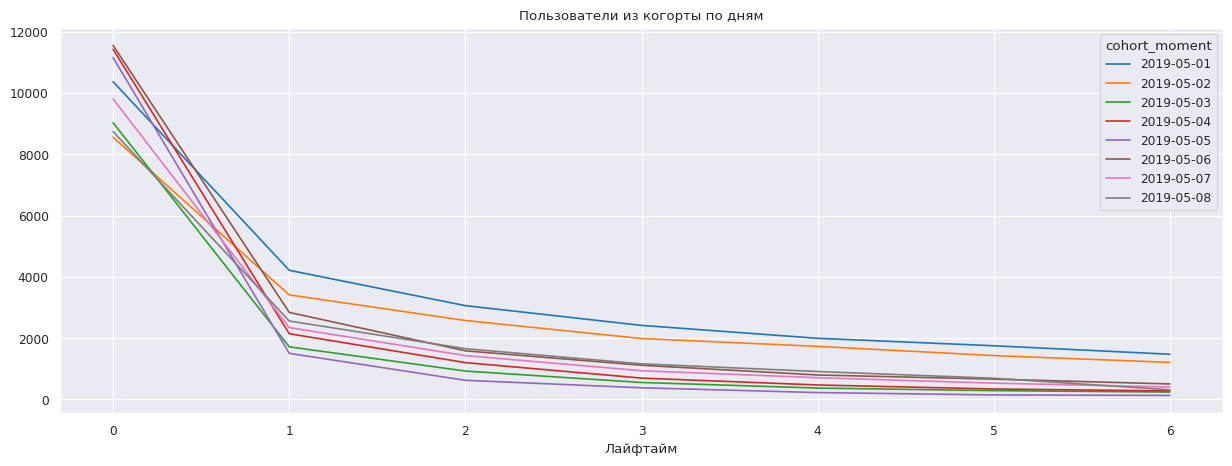

In [17]:
#@title Cohort unique users (first N cohorts)
_, _, _, cohorts_users_dyn, cohorts_retention_dyn = get_retention(sessions, profiles,
                                                               last_cohort_moment=_LAST_COHORT,
                                                               horizon=_HORIZON, ignore_horizon=False, dimensions=[])
N=10

cohorts_users_dyn[0:N].drop(columns=['cohort_size']).T.plot(
    grid=True,  # добавляем сетку
    xticks=list(cohorts_users_dyn.columns.values[1:]),
    figsize=(15, 5),  # размер графика
    );
plt.xlabel('Лайфтайм')  # название оси X
plt.title('Пользователи из когорты по дням')  # название графика
plt.show()



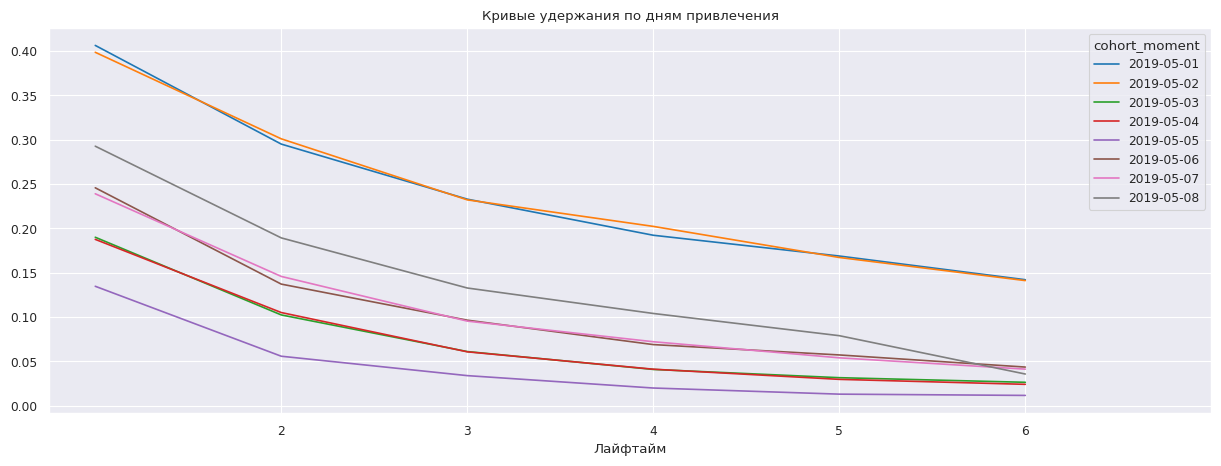

In [18]:
#@title Cohort retention (коэффициент удержания когорт), first N cohorts
cohorts_retention_dyn.drop(columns=['cohort_size', 0, ])[0:N].T.plot(
    grid=True,  # добавляем сетку
    xticks=list(cohorts_retention_dyn.columns.values[2:]),
    figsize=(15, 5),  # размер графика
);
plt.xlabel('Лайфтайм')  # название оси X
plt.title('Кривые удержания по дням привлечения')  # название графика
plt.show()



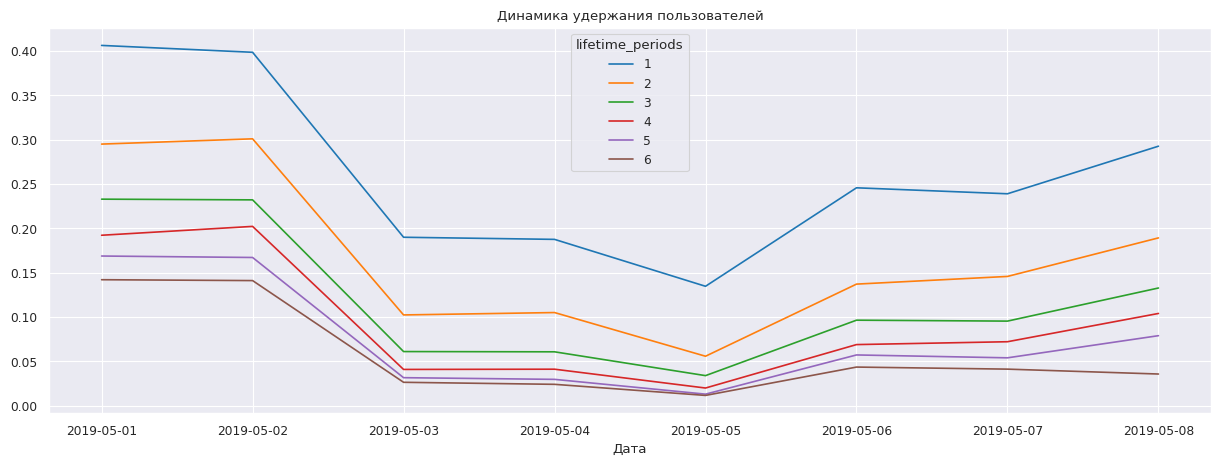

In [19]:
#@title Retention dynamics for n-group cohort (история изменения удержания когорт, в данном случае n -ого дня)
cohorts_retention_dyn.drop(columns=['cohort_size', 0, ]).plot(
    grid=True,  # добавляем сетку
    figsize=(15, 5),  # размер графика
);
plt.xlabel('Дата')  # название оси X
plt.title('Динамика удержания пользователей')  # название графика
plt.show()

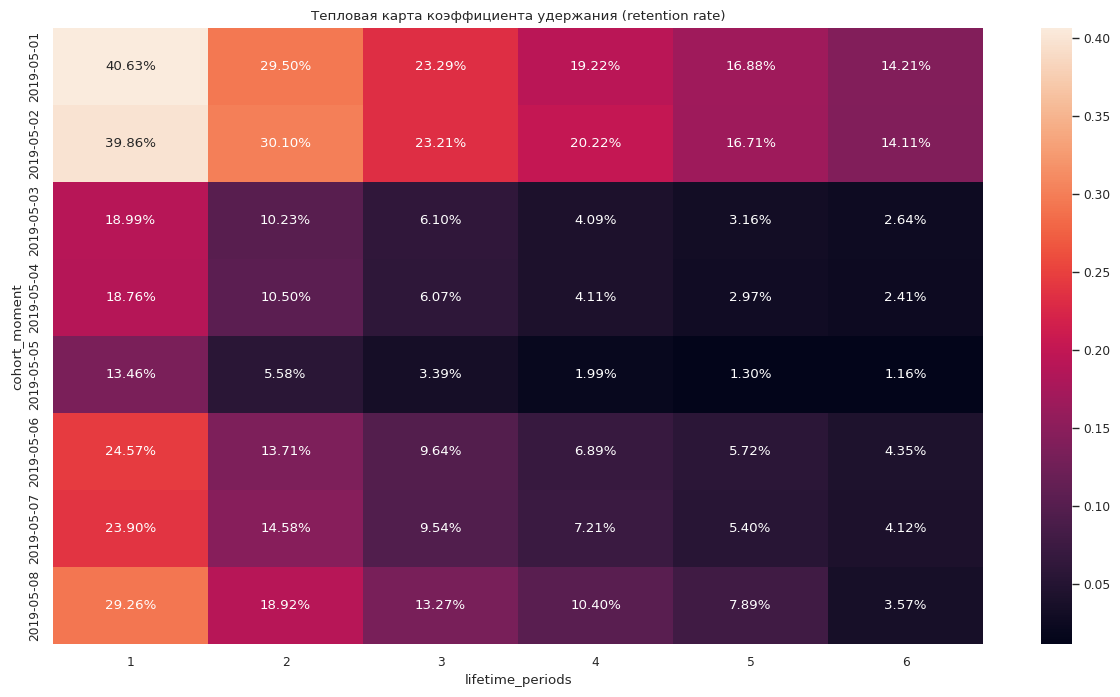

In [20]:
#@title heatmap retention
_, _, _, cohorts_users_dyn, cohorts_retention_dyn = get_retention(sessions, profiles,
                                                               last_cohort_moment=_LAST_COHORT,
                                                               horizon=_HORIZON, ignore_horizon=False, dimensions=[])
plt.figure(figsize=(15, 8))
sns.heatmap(cohorts_retention_dyn.fillna(0).drop(columns=['cohort_size', 0, ]), annot=True, fmt='.2%')
plt.title('Тепловая карта коэффициента удержания (retention rate)')  # название графика
plt.show()

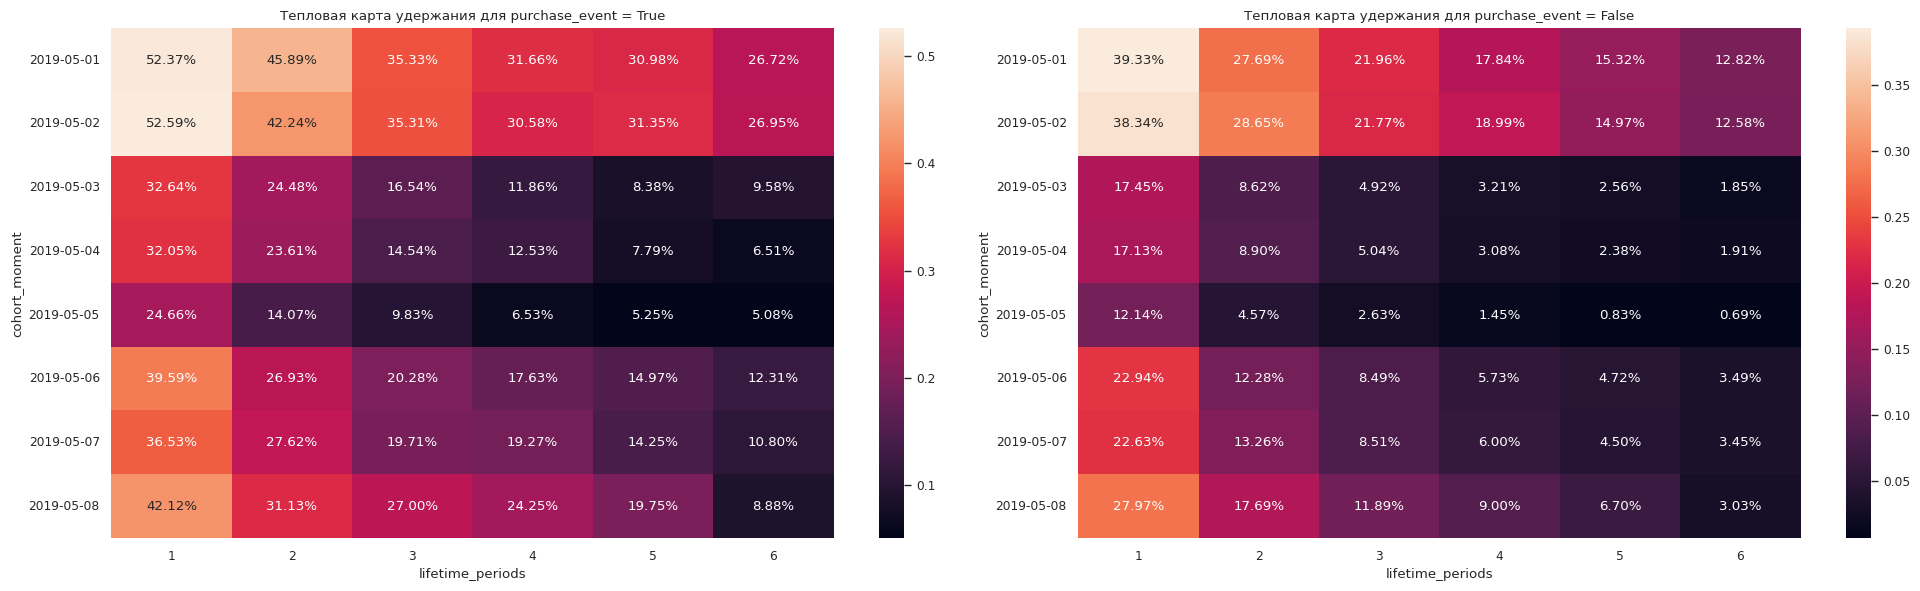

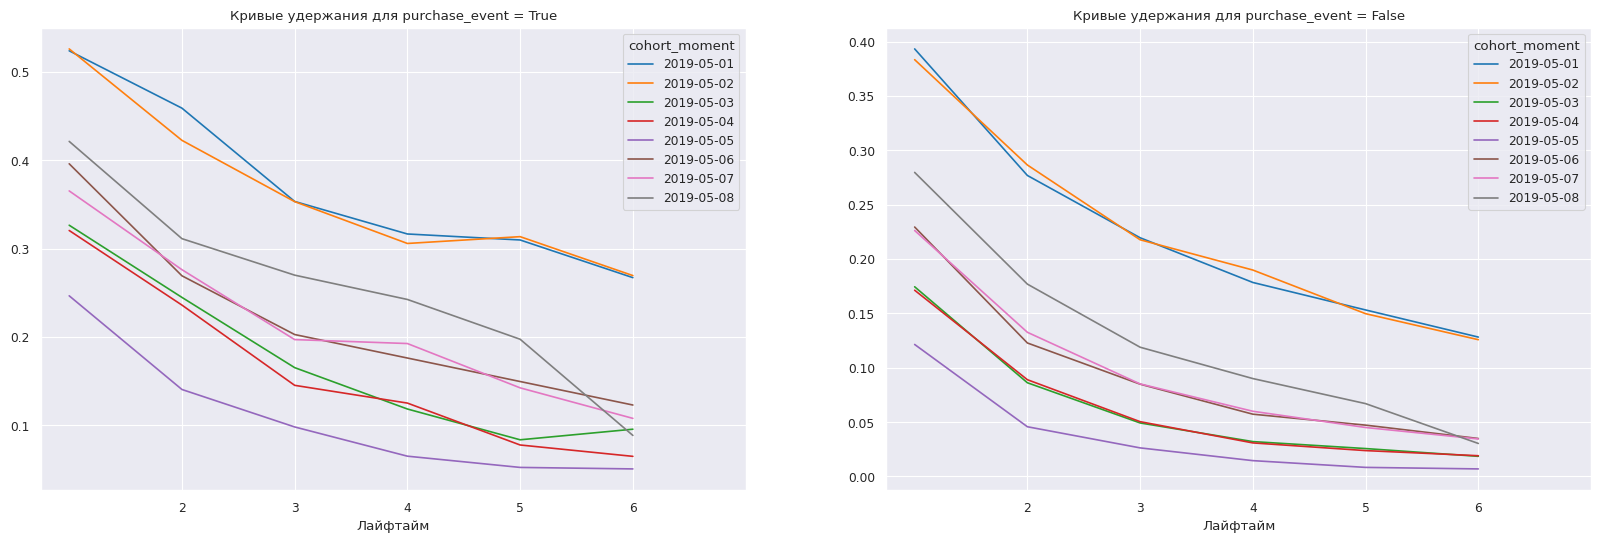

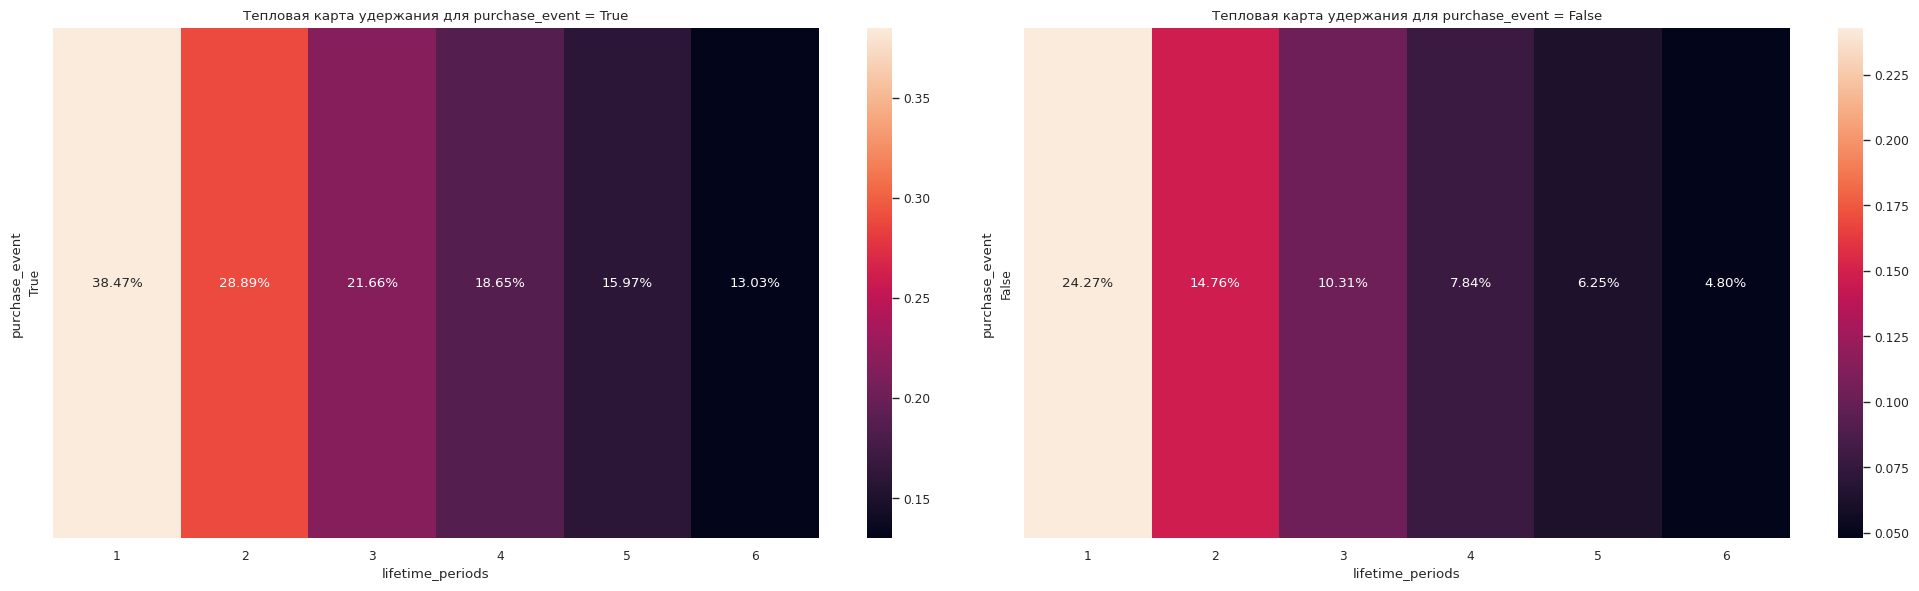

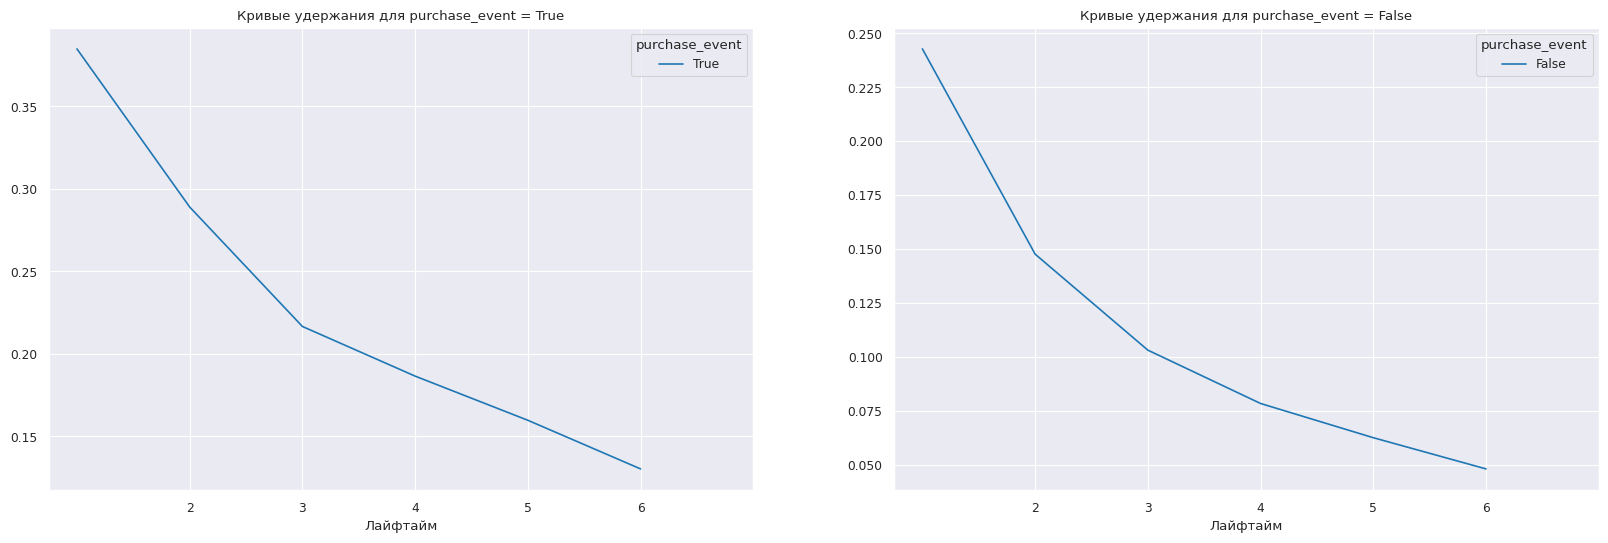

In [21]:
#@title subplots by key_event (sales in general)
_, _, cohorts_retention, _, cohorts_retention_dyn = get_retention(sessions, profiles,
                                                               last_cohort_moment=_LAST_COHORT,
                                                               horizon=_HORIZON, ignore_horizon=False, dimensions=['purchase_event'])

if 'purchase_event' in cohorts_retention_dyn.index.names:
    plt.figure(figsize=(20, 6)) # задаём размер сетки для графиков
    for i, purchase_event in enumerate(profiles['purchase_event'].unique()):
        sns.heatmap(
            cohorts_retention_dyn.query('purchase_event == @purchase_event')
            .droplevel('purchase_event')
            .drop(columns=['cohort_size', 0]),
            annot=True, fmt='.2%',
            ax=plt.subplot(1, 2, i + 1),
        )
        # задаём названия графиков с учётом значения payer
        plt.title('Тепловая карта удержания для purchase_event = {}'.format(purchase_event))

    plt.tight_layout()  # «подгоняем» размер графиков, чтобы уместились подписи
    plt.show()


    plt.figure(figsize=(20, 6))  # задаём размер сетки
    # исключаем размеры когорт и удержание первого дня
    report = cohorts_retention_dyn.drop(columns=['cohort_size', 0])
    for i, purchase_event in enumerate(profiles['purchase_event'].unique()):
        report.query('purchase_event == @purchase_event') \
        .droplevel('purchase_event').T.plot(
            grid=True,  # добавляем сетку
            # отметки на оси X — названия колонок
            xticks=list(report.columns.values),
            ax=plt.subplot(1, 2, i + 1), # задаём расположение графиков
        )
        plt.xlabel('Лайфтайм')
        plt.title('Кривые удержания для purchase_event = {}'.format(purchase_event))
    plt.show()


if 'purchase_event' in cohorts_retention.index.names:
    plt.figure(figsize=(20, 6)) # задаём размер сетки для графиков
    for i, purchase_event in enumerate(profiles['purchase_event'].unique()):
        sns.heatmap(
            cohorts_retention.query('purchase_event == @purchase_event')
            .drop(columns=['cohort_size', 0]),
            annot=True, fmt='.2%',
            ax=plt.subplot(1, 2, i + 1),
        )
        # задаём названия графиков с учётом значения payer
        plt.title('Тепловая карта удержания для purchase_event = {}'.format(purchase_event))

    plt.tight_layout()  # «подгоняем» размер графиков, чтобы уместились подписи
    plt.show()


    plt.figure(figsize=(20, 6))  # задаём размер сетки
    # исключаем размеры когорт и удержание первого дня
    report = cohorts_retention.drop(columns=['cohort_size', 0])
    for i, purchase_event in enumerate(profiles['purchase_event'].unique()):
        report.query('purchase_event == @purchase_event').T.plot(
            grid=True,  # добавляем сетку
            # отметки на оси X — названия колонок
            xticks=list(report.columns.values),
            ax=plt.subplot(1, 2, i + 1), # задаём расположение графиков
        )
        plt.xlabel('Лайфтайм')
        plt.title('Кривые удержания для purchase_event = {}'.format(purchase_event))
    plt.show()

#Churn

In [22]:
#@title Ex. расчета churn для минимальной (для одной) даты из журнала посещений
tmp = join_sessions_with_profiles(sessions, profiles)
tmp = tmp[tmp.cohort_moment==tmp.cohort_moment.min()].groupby('lifetime_periods')['user_id'].nunique().to_frame()
tmp['churn'] = [np.nan for _ in range(tmp.first_valid_index() if tmp.first_valid_index()>0 else 1)] + [1-tmp.user_id.iloc[i]/tmp.user_id.iloc[i-1] for i in range(tmp.first_valid_index() if tmp.first_valid_index()>0 else 1, len(tmp))]
tmp


user_id     churn
lifetime_periods                   
0                   10369       NaN
1                    4213  0.593693
2                    3059  0.273914
3                    2415  0.210526
4                    1993  0.174741
5                    1750  0.121927
6                    1473  0.158286
7                    1418  0.037339
8                    1250  0.118477
9                    1107  0.114400
10                   1013  0.084914
11                    917  0.094768
12                    869  0.052345
13                    404  0.535098

In [23]:
#@title get_churn function
def get_churn(sessions, profiles, last_cohort_moment, horizon, ignore_horizon=False, first_cohort_moment=None, dimensions='cohort_moment'):
    """
    sessions - журнал посещений
    profiles - профили пользователей
    last_cohort_moment - последняя когорта которую берем в анализ (ограничение появляется естественным образом
                         если горизонт анализа выходит за момент анализа и когорта еще не прожила нужный период)
    horizon - горизонт анализа
    ignore_horizon - игнорировать горизонт? (True - выводим все доступные когорты (треугольная матрица);
                                             False - выводим только когорты [0..hirizon-1])
    first_cohort_moment - если хотим ограничить и не брать в анализ старые когорты
    """
    if not ignore_horizon:
        profiles_filtered = profiles[profiles.cohort_moment<=last_cohort_moment+timedelta(1)]
    else:
        profiles_filtered = profiles

    if first_cohort_moment is not None:
        profiles_filtered = profiles_filtered[profiles_filtered.cohort_moment>=first_cohort_moment]

    retention_raw = join_sessions_with_profiles(sessions, profiles_filtered)

    def group_by_dimensions(df, dims, horizon, ignore_horizon):
        if len(dims) == 0:
            df['cohort'] = "All users"
            dims = ['cohort']

        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )

        df_filtered = df
        if not ignore_horizon:
            df_filtered = df[df.lifetime_periods<horizon]

        cohorts_users = df_filtered.pivot_table(index=dims, columns='lifetime_periods', values='user_id', aggfunc='nunique')
        cohorts_users = cohorts_users.fillna(0)
        cohorts_churn = cohorts_users.apply(
            lambda x: pd.Series([np.nan] + [1-x.iloc[i]/x.iloc[i-1] if x.iloc[i-1]>0 else np.nan for i in range(1, len(x))], index=x.index),
            axis=1
        )
        cohorts_churn['cohort_size'] = cohort_sizes

        cohorts_churn = cohorts_churn[['cohort_size', ] + list(i for i in range(horizon if not ignore_horizon else len(cohorts_users.columns)) if i in cohorts_users.columns)]
        cohorts_users['cohort_size'] = cohort_sizes
        cohorts_users = cohorts_users[['cohort_size', ] + list(i for i in range(horizon if not ignore_horizon else len(cohorts_users.columns)-1) if i in cohorts_users.columns)]
        return cohorts_users, cohorts_churn

    # агрегация без динамики ==
    cohorts_users, cohorts_churn = group_by_dimensions(retention_raw, dimensions, horizon, ignore_horizon)

    # агрегация с динамикой ==
    cohorts_users_in_time, cohorts_churn_in_time = group_by_dimensions(retention_raw, dimensions+['cohort_moment'], horizon, ignore_horizon)
    return retention_raw, cohorts_users, cohorts_churn, cohorts_users_in_time, cohorts_churn_in_time


_, cohorts_users, cohorts_churn, cohorts_users_dyn, cohorts_churn_dyn = get_churn(sessions, profiles,
                                                               last_cohort_moment=_LAST_COHORT,
                                                               horizon=_HORIZON, ignore_horizon=True,
                                                               #first_cohort_moment=(sessions.session_start.min()+timedelta(85)).date(),
                                                               dimensions=['first_device'])
#display_df(cohorts_users_dyn)
display_df(cohorts_churn_dyn)



lifetime_periods            cohort_size   0         1         2         3  \
first_device cohort_moment                                                  
Android      2019-05-01            2093 NaN  0.599140  0.263409  0.208738   
             2019-05-02            1700 NaN  0.588824  0.268956  0.232877   
             2019-05-03            1812 NaN  0.799117  0.464286  0.446154   
             2019-05-04            2264 NaN  0.811837  0.453052  0.407725   
             2019-05-05            2266 NaN  0.858341  0.598131  0.317829   
             2019-05-06            2258 NaN  0.752879  0.448029  0.256494   
             2019-05-07            1923 NaN  0.755070  0.422505  0.308824   
             2019-05-08            1766 NaN  0.695357  0.418216  0.236422   
             2019-05-09            1860 NaN  0.636559  0.306213  0.253731   
             2019-05-10            2100 NaN  0.632857  0.285344  0.210526   
             2019-05-11            2297 NaN  0.634741  0.346841  0.532847   
             2019-05-12            1966 NaN  0.590539  0.597516  1.000000   
             2019-05-13            2230 NaN  0.736771  1.000000       NaN   
             2019-05-14            1855 NaN  1.000000       NaN       NaN   
Mac          2019-05-01            2596 NaN  0.580123  0.260550  0.285360   
             2019-05-02            2163 NaN  0.622746  0.196078  0.230183   
             2019-05-03            2229 NaN  0.826828  0.373057  0.380165   
             2019-05-04            2793 NaN  0.813104  0.454023  0.431579   
             2019-05-05            2754 NaN  0.873275  0.564470  0.401316   
             2019-05-06            2902 NaN  0.752240  0.406120  0.313817   
             2019-05-07            2528 NaN  0.759889  0.441516  0.283186   
             2019-05-08            2223 NaN  0.714350  0.377953  0.250633   
             2019-05-09            2188 NaN  0.636654  0.270440  0.237931   
             2019-05-10            2594 NaN  0.637625  0.321277  0.137931   
             2019-05-11            2837 NaN  0.636588  0.327837  0.487734   
             2019-05-12            2446 NaN  0.599346  0.554082  1.000000   
             2019-05-13            2776 NaN  0.747478  1.000000       NaN   
             2019-05-14            2325 NaN  1.000000       NaN       NaN   
PC           2019-05-01            1076 NaN  0.594796  0.256881  0.194444   
             2019-05-02             895 NaN  0.622346  0.174556  0.250896   
             2019-05-03             957 NaN  0.801463  0.542105  0.517241   
             2019-05-04            1229 NaN  0.834825  0.389163  0.370968   
             2019-05-05            1140 NaN  0.852632  0.672619  0.272727   
             2019-05-06            1160 NaN  0.752586  0.498258  0.263889   
             2019-05-07            1039 NaN  0.761309  0.379032  0.350649   
             2019-05-08             883 NaN  0.727067  0.315353  0.345455   
             2019-05-09             927 NaN  0.646170  0.195122  0.329545   
             2019-05-10            1121 NaN  0.629795  0.226506  0.355140   
             2019-05-11            1179 NaN  0.641221  0.297872  0.488215   
             2019-05-12             970 NaN  0.588660  0.591479  1.000000   
             2019-05-13            1183 NaN  0.743872  1.000000       NaN   
             2019-05-14             972 NaN  1.000000       NaN       NaN   
iPhone       2019-05-01            4604 NaN  0.598610  0.290584  0.169336   
             2019-05-02            3798 NaN  0.590047  0.274888  0.220549   
             2019-05-03            4031 NaN  0.807740  0.483871  0.372500   
             2019-05-04            5140 NaN  0.807004  0.437500  0.433692   
             2019-05-05            4995 NaN  0.867067  0.569277  0.444056   
             2019-05-06            5234 NaN  0.756400  0.447059  0.310638   
             2019-05-07            4314 NaN  0.764256  0.347099  0.391566   
             2019-05-08            3869 NaN  0.704316  0.317308  0.338028

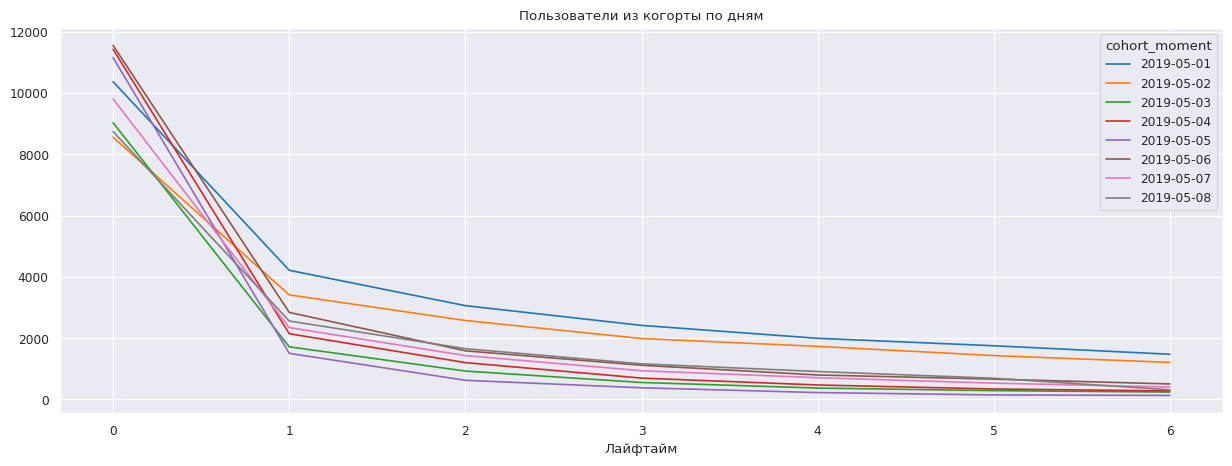

In [24]:
#@title Cohort unique users (first N cohorts)
_, _, _, cohorts_users_dyn, cohorts_churn_dyn = get_churn(sessions, profiles,
                                                          last_cohort_moment=_LAST_COHORT,
                                                          horizon=_HORIZON, ignore_horizon=False, dimensions=[])
N=10
cohorts_users_dyn.drop(columns=['cohort_size'])[0:N].T.plot(
    grid=True,  # добавляем сетку
    xticks=list(cohorts_users_dyn.columns.values[1:]),
    figsize=(15, 5),  # размер графика
    );
plt.xlabel('Лайфтайм')  # название оси X
plt.title('Пользователи из когорты по дням')  # название графика
plt.show()

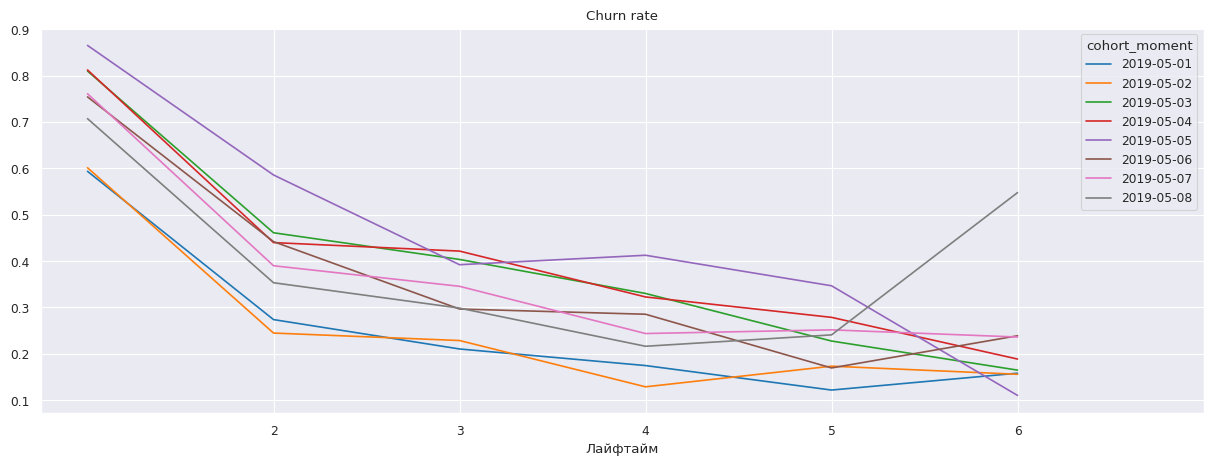

In [25]:
#@title Churn rate, first N cohorts
cohorts_churn_dyn.drop(columns=['cohort_size', 0, ])[0:N].T.plot(
    grid=True,  # добавляем сетку
    xticks=list(cohorts_churn_dyn.columns.values[2:]),
    figsize=(15, 5),  # размер графика
);
plt.xlabel('Лайфтайм')  # название оси X
plt.title('Churn rate')  # название графика
plt.show()


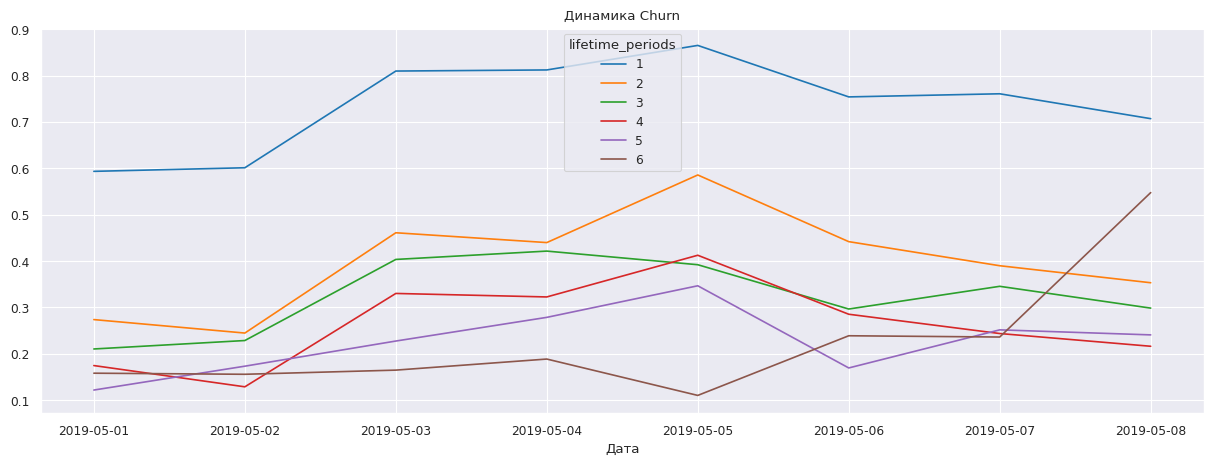

In [26]:
#@title Churn dynamics for n-group cohort
cohorts_churn_dyn.drop(columns=['cohort_size', 0, ]).plot(
    grid=True,  # добавляем сетку
    #xticks=list(cohorts_retention.columns.values),
    figsize=(15, 5),  # размер графика
);
plt.xlabel('Дата')  # название оси X
plt.title('Динамика Churn')  # название графика
plt.show()

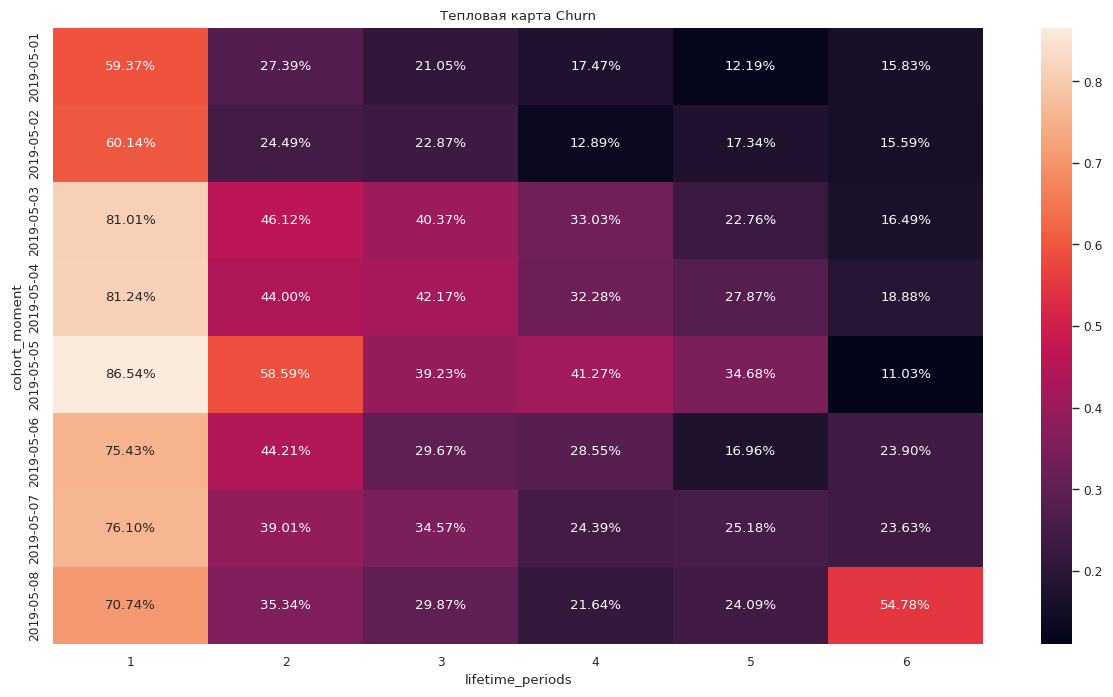

In [27]:
#@title heatmap churn
_, _, _, cohorts_users_dyn, cohorts_churn_dyn = get_churn(sessions, profiles,
                                                          last_cohort_moment=_LAST_COHORT,
                                                          horizon=_HORIZON, ignore_horizon=False, dimensions=[])
plt.figure(figsize=(15, 8))
sns.heatmap(cohorts_churn_dyn.fillna(0).drop(columns=['cohort_size', 0, ]), annot=True, fmt='.2%')
plt.title('Тепловая карта Churn')  # название графика
plt.show()

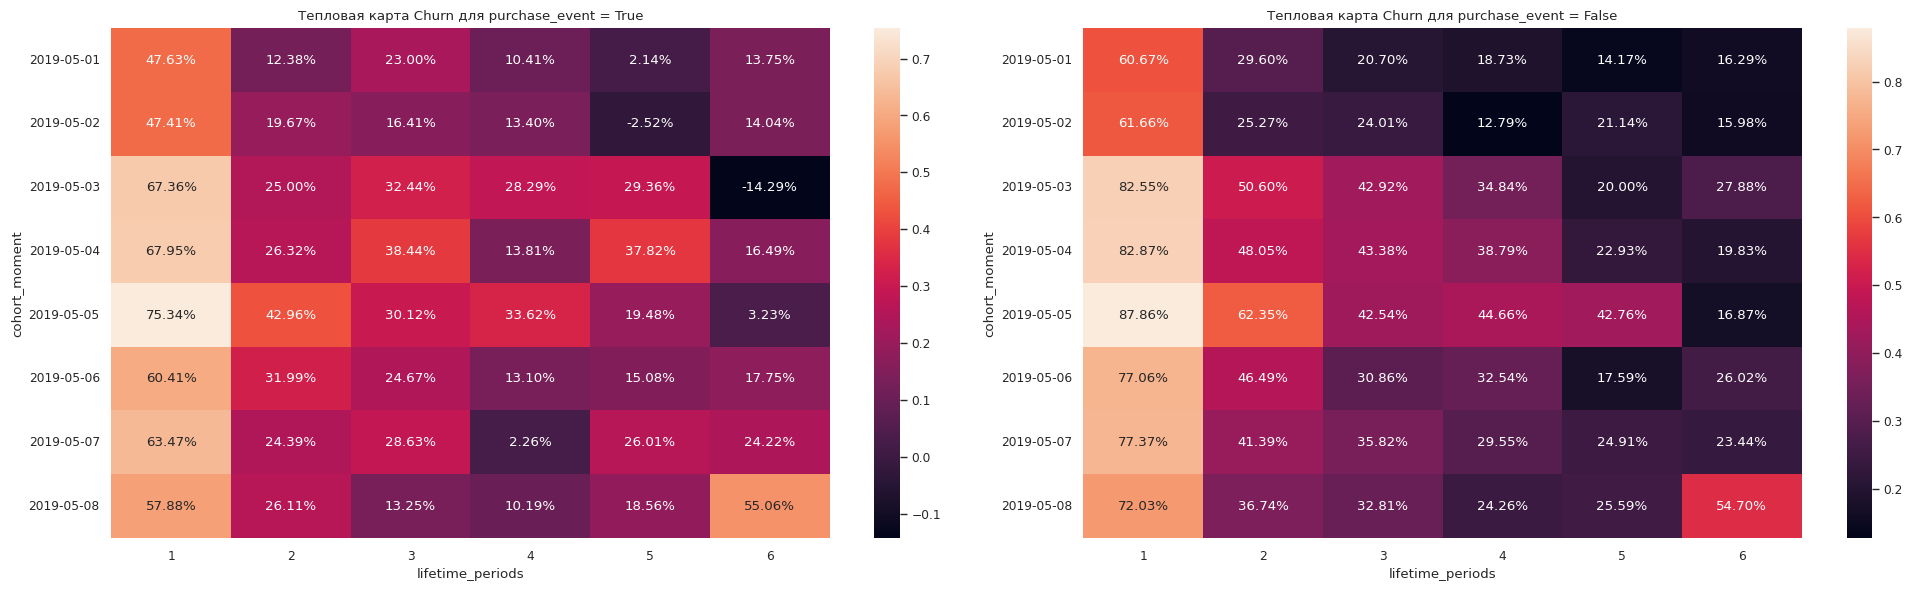

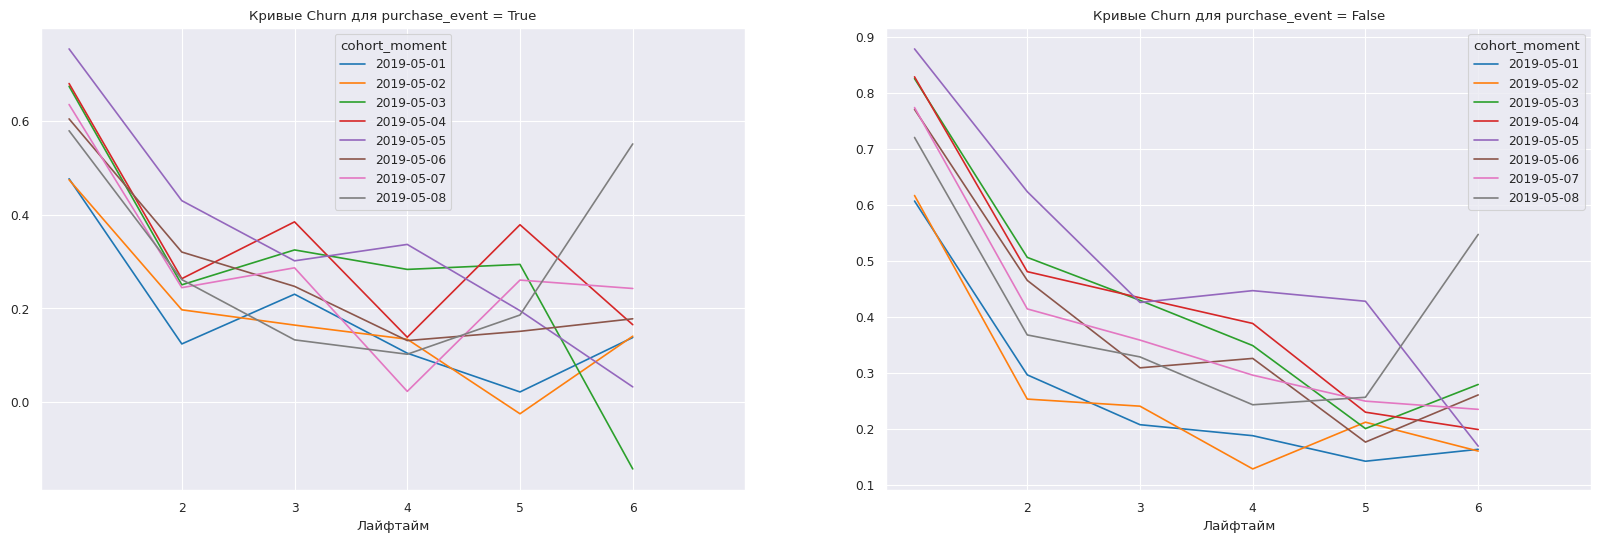

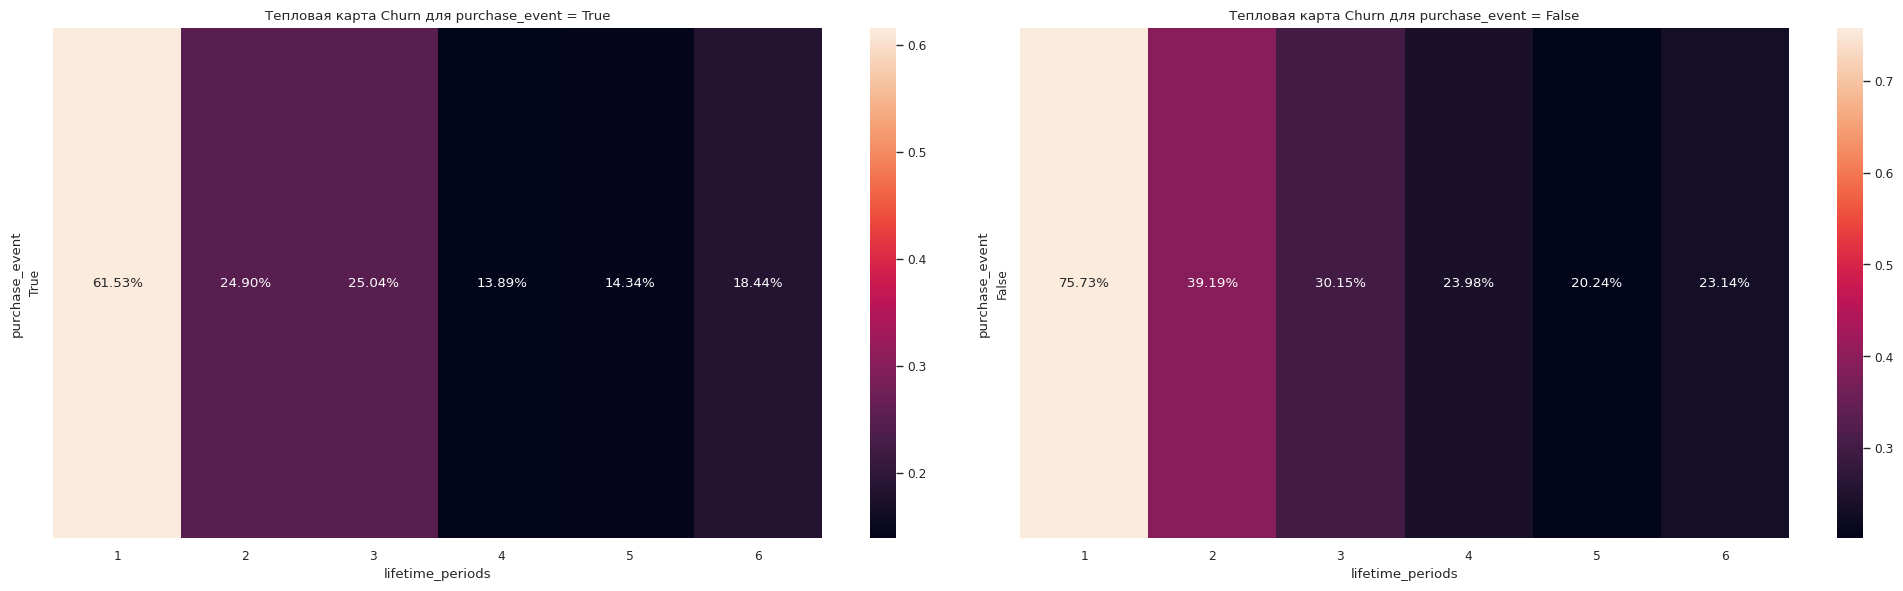

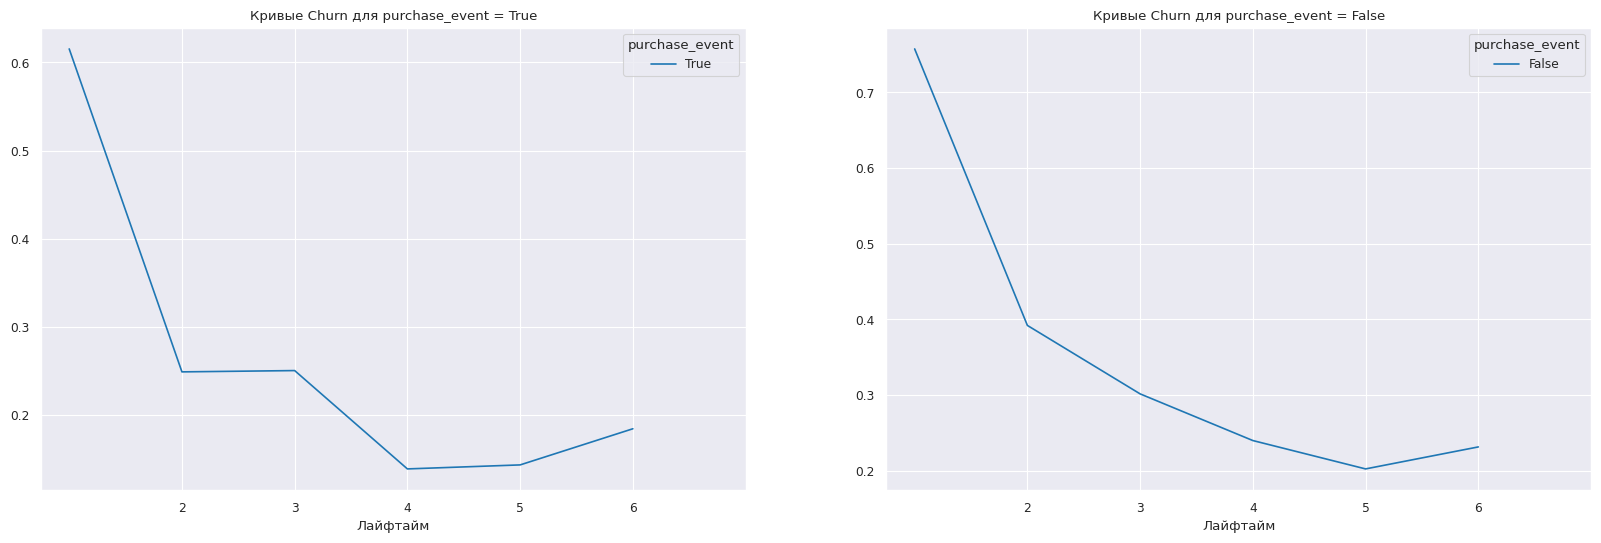

In [28]:
#@title subplots by purchase_event (sales in general)
_, _, cohorts_churn, _, cohorts_churn_dyn = get_churn(sessions, profiles,
                                                          last_cohort_moment=_LAST_COHORT,
                                                          horizon=_HORIZON, ignore_horizon=False, dimensions=['purchase_event'])
if 'purchase_event' in cohorts_churn_dyn.index.names:
    plt.figure(figsize=(20, 6)) # задаём размер сетки для графиков
    for i, purchase_event in enumerate(profiles['purchase_event'].unique()):
        sns.heatmap(
            cohorts_churn_dyn.query('purchase_event == @purchase_event')
            .droplevel('purchase_event')
            .drop(columns=['cohort_size', 0]),
            annot=True, fmt='.2%',
            ax=plt.subplot(1, 2, i + 1),
        )
        # задаём названия графиков с учётом значения payer
        plt.title('Тепловая карта Churn для purchase_event = {}'.format(purchase_event))

    plt.tight_layout()  # «подгоняем» размер графиков, чтобы уместились подписи
    plt.show()


    plt.figure(figsize=(20, 6))  # задаём размер сетки
    # исключаем размеры когорт и удержание первого дня
    report = cohorts_churn_dyn.drop(columns=['cohort_size', 0])
    for i, purchase_event in enumerate(profiles['purchase_event'].unique()):
        report.query('purchase_event == @purchase_event').droplevel('purchase_event').T.plot(
            grid=True,  # добавляем сетку
            # отметки на оси X — названия колонок
            xticks=list(report.columns.values),
            ax=plt.subplot(1, 2, i + 1), # задаём расположение графиков
        )
        plt.xlabel('Лайфтайм')
        plt.title('Кривые Churn для purchase_event = {}'.format(purchase_event))
    plt.show()

if 'purchase_event' in cohorts_churn.index.names:
    plt.figure(figsize=(20, 6)) # задаём размер сетки для графиков
    for i, purchase_event in enumerate(profiles['purchase_event'].unique()):
        sns.heatmap(
            cohorts_churn.query('purchase_event == @purchase_event')
            .drop(columns=['cohort_size', 0]),
            annot=True, fmt='.2%',
            ax=plt.subplot(1, 2, i + 1),
        )
        # задаём названия графиков с учётом значения payer
        plt.title('Тепловая карта Churn для purchase_event = {}'.format(purchase_event))

    plt.tight_layout()  # «подгоняем» размер графиков, чтобы уместились подписи
    plt.show()


    plt.figure(figsize=(20, 6))  # задаём размер сетки
    # исключаем размеры когорт и удержание первого дня
    report = cohorts_churn.drop(columns=['cohort_size', 0])
    for i, purchase_event in enumerate(profiles['purchase_event'].unique()):
        report.query('purchase_event == @purchase_event').T.plot(
            grid=True,  # добавляем сетку
            # отметки на оси X — названия колонок
            xticks=list(report.columns.values),
            ax=plt.subplot(1, 2, i + 1), # задаём расположение графиков
        )
        plt.xlabel('Лайфтайм')
        plt.title('Кривые Churn для purchase_event = {}'.format(purchase_event))
    plt.show()

#Analysis dynamics for n-group cohort (with additional dimentions)

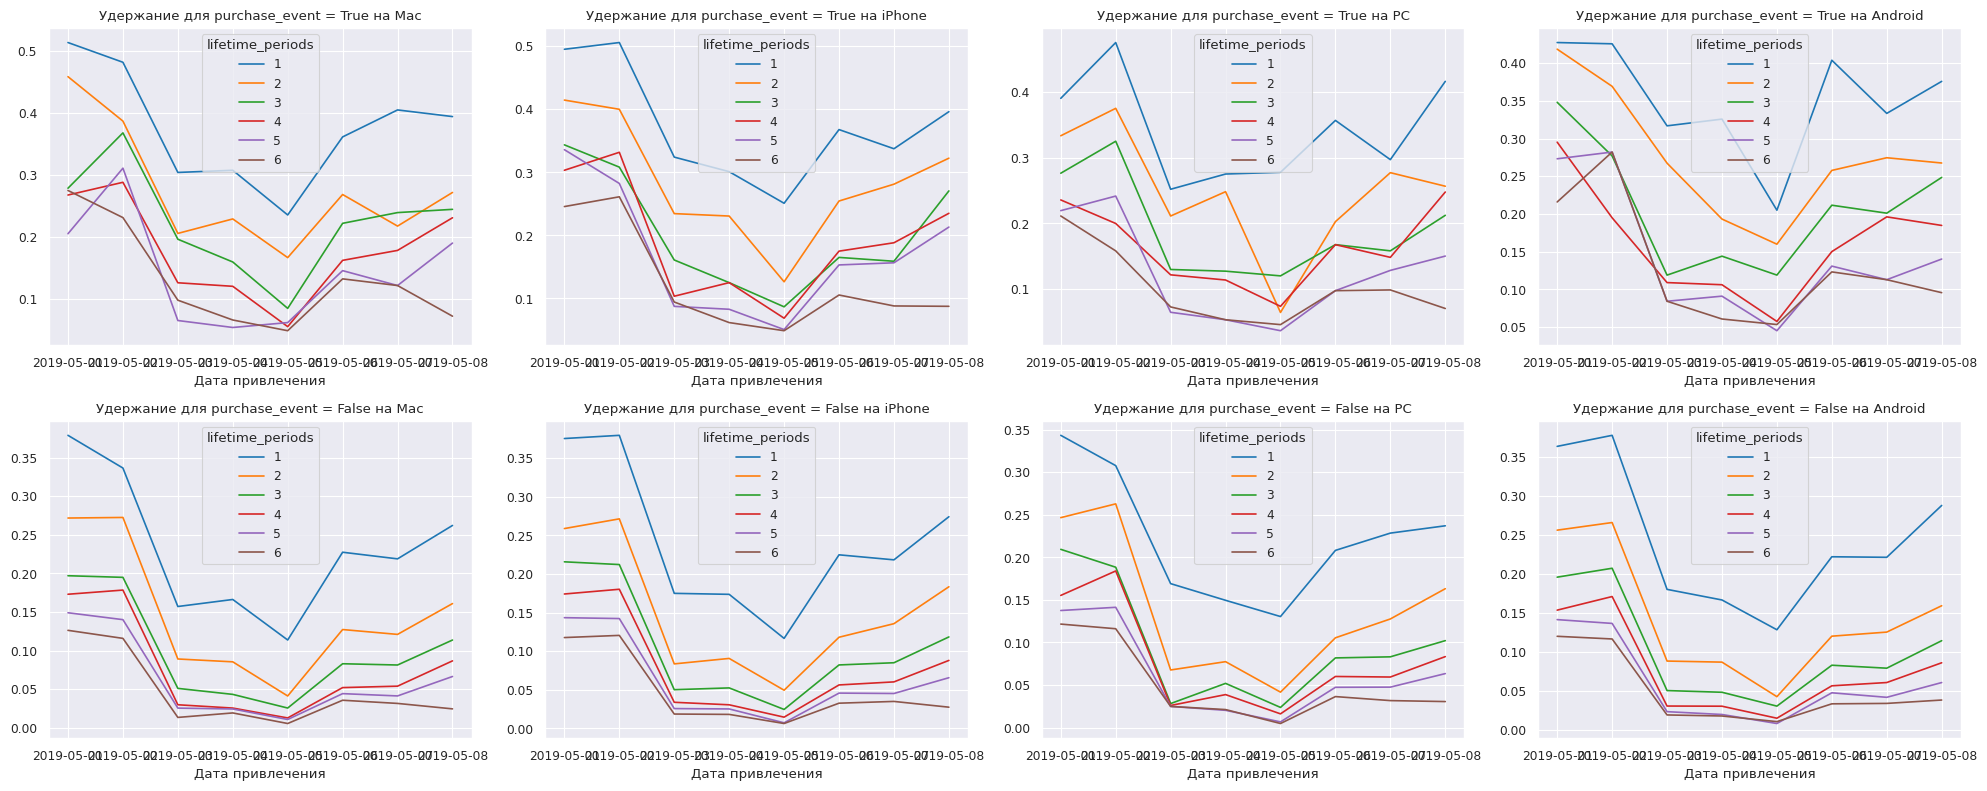

In [29]:
#@title with device dimension - Retention dynamics
_, cohorts_users, cohorts_retention, cohorts_users_dyn, cohorts_retention_dyn = get_retention(sessions, profiles,
                                                               last_cohort_moment=_LAST_COHORT,
                                                               horizon=_HORIZON, ignore_horizon=False,
                                                               dimensions=['purchase_event', 'device']
                                                              )

# исключаем размеры когорт и удержание первого дня
report = cohorts_retention_dyn.drop(columns=['cohort_size', 0])

num_rows = len(profiles['purchase_event'].unique())
num_cols = len(profiles['first_device'].unique())

plt.figure(figsize=(20, 8))  # задаём размер сетки

for i, payer in enumerate(profiles['purchase_event'].unique()):
    for j, device in enumerate(profiles['first_device'].unique()):
        (
            report.query('purchase_event == @payer and device == @device')
            # устраняем purchase_event и device из индексов,
            # чтобы не загромождать графики
            .droplevel(['purchase_event', 'device'])
            # строим каждый график в своей ячейке
            .plot(
                grid=True,
                # в таблице графиков две строки и четыре столбца
                # i принимает значение 0 или 1, в зависимости от покупки
                # j — 0, 1, 2 или 3, в зависимости от устройства
                # график для неплатящих пользователей Mac окажется
                # в пятой ячейке: 1 * 4 + 0 + 1 = 5
                # а для платящих пользователей Android —
                # в четвёртой: 0 * 4 + 3 + 1 = 4
                ax=plt.subplot(num_rows, num_cols, i * num_cols + j + 1),
            )
        )
        # подпись оси X
        plt.xlabel('Дата привлечения')
        # названия графиков
        plt.title('Удержание для purchase_event = {} на {}'.format(payer, device))

plt.tight_layout()
plt.show()

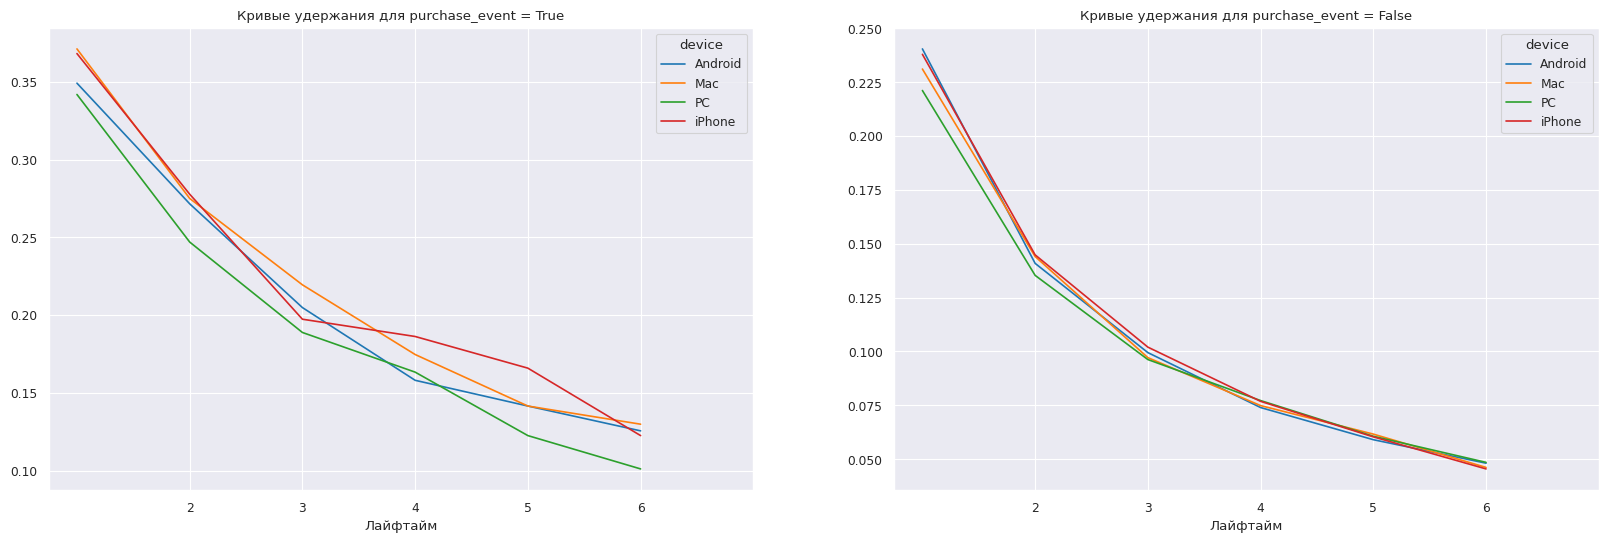

In [30]:
#@title Cohort retention by device dimension
# --- строим кривые удержания ---

plt.figure(figsize=(20, 6))

# берём таблицу удержания retention
# исключаем размеры когорт и удержание первого дня
report = cohorts_retention.drop(columns=['cohort_size', 0])

for i, payer in enumerate(profiles['purchase_event'].unique()):
    report.query('purchase_event == @payer').droplevel('purchase_event').T.plot(
        grid=True,
        xticks=list(report.columns.values),
        ax=plt.subplot(1, 2, i + 1),
    )
    plt.xlabel('Лайфтайм')
    plt.title('Кривые удержания для purchase_event = {}'.format(payer))

plt.show()

#Conversions

In [31]:
display(profiles.head(3))
display(orders.head(2))

user_id            first_ts first_channel first_device   first_region  \
0  10964006 2019-05-12 04:50:17        Yandex          Mac        Germany   
1  12358165 2019-05-10 23:16:24        Yandex       iPhone  United States   
2  12545358 2019-05-05 19:22:46       Organic          Mac  United States   

  cohort_moment      first_purchase  first_revenue  purchase_event    costs  \
0    2019-05-12 2019-05-13 04:00:32           4.99            True  817.750   
1    2019-05-10                 NaT            NaN           False  830.775   
2    2019-05-05                 NaT            NaN           False      NaN   

   unique_users  cohort_cac  
0        3281.0    0.249238  
1        3470.0    0.239416  
2           NaN    0.000000

user_id            event_dt  revenue
0   55519067947 2019-05-01 06:49:16     4.99
1  831753022495 2019-05-01 05:13:14     4.99

In [32]:
#@title join_purchase_with_profiles function
def join_purchase_with_profiles(purchase, profiles):
    """
    склеиваем журнал покупок с профилями пользователей
    и вычисляем для каждой записи журнала lifetime (в нужном интервале, минуты, дни, месяца)
    добавляет поле-классификатор периодов lifetime

    возвращает отсортированную таблицу по user_id и session_start
    """
    if "first_purchase" not in profiles.columns:
        # определяем дату и время первой покупки для каждого пользователя
        first_purchases = (
            purchase.sort_values(by=['user_id', 'event_dt'])
            .groupby('user_id')
            .agg({'event_dt': 'first',
                  'revenue': 'first'})
            .rename(columns={'revenue': 'first_revenue',
                             'event_dt': 'first_purchase'})
            .reset_index()
        )

        result = profiles.merge(first_purchases, on='user_id', how='left') \
            .sort_values(by=['user_id', 'first_purchase'], ascending=[True, True]) \
            .reset_index(drop=True)
    else:
        result = profiles.copy()

    result['lifetime_periods'] = (result['first_purchase'] - result['first_ts']).dt.days

    def lt_grp(periods):
        if periods<=1:
            return "купили в 1 день"
        elif periods<=7:
            return "купили в 1 неделю"
        return "купили позже 1 недели"

    result['lifetime_group'] = result.lifetime_periods.map(lt_grp)
    result.loc[~result.purchase_event, 'lifetime_group'] = "не купили"
    return result

join_purchase_with_profiles(orders, profiles)

user_id            first_ts  first_channel first_device  \
0           10964006 2019-05-12 04:50:17         Yandex          Mac   
1           12358165 2019-05-10 23:16:24         Yandex       iPhone   
2           12545358 2019-05-05 19:22:46        Organic          Mac   
3           16165560 2019-05-10 20:29:59         Yandex           PC   
4           17733464 2019-05-12 11:08:25        Organic       iPhone   
...              ...                 ...            ...          ...   
141414  999939571625 2019-05-08 17:47:00         Yandex       iPhone   
141415  999954663782 2019-05-04 09:57:28  AnotherSource      Android   
141416  999957797889 2019-05-14 21:54:26         Yandex      Android   
141417  999974288578 2019-05-07 03:42:53        Organic       iPhone   
141418  999996691258 2019-05-05 09:27:58  AnotherSource       iPhone   

              first_region cohort_moment      first_purchase  first_revenue  \
0                  Germany    2019-05-12 2019-05-13 04:00:32           4.99   
1            United States    2019-05-10                 NaT            NaN   
2            United States    2019-05-05                 NaT            NaN   
3            United States    2019-05-10                 NaT            NaN   
4                   France    2019-05-12 2019-05-13 10:46:16           4.99   
...                    ...           ...                 ...            ...   
141414             Germany    2019-05-08                 NaT            NaN   
141415       United States    2019-05-04                 NaT            NaN   
141416  Russian Federation    2019-05-14                 NaT            NaN   
141417              France    2019-05-07                 NaT            NaN   
141418  Russian Federation    2019-05-05                 NaT            NaN   

        purchase_event     costs  unique_users  cohort_cac  lifetime_periods  \
0                 True   817.750        3281.0    0.249238               0.0   
1                False   830.775        3470.0    0.239416               NaN   
2                False       NaN           NaN    0.000000               NaN   
3                False   830.775        3470.0    0.239416               NaN   
4                 True       NaN           NaN    0.000000               0.0   
...                ...       ...           ...         ...               ...   
141414           False   764.925        2932.0    0.260888               NaN   
141415           False  1911.000        1965.0    0.972519               NaN   
141416           False   764.500        3087.0    0.247651               NaN   
141417           False       NaN           NaN    0.000000               NaN   
141418           False  1837.000        1910.0    0.961780               NaN   

         lifetime_group  
0       купили в 1 день  
1             не купили  
2             не купили  
3             не купили  
4       купили в 1 день  
...                 ...  
141414        не купили  
141415        не купили  
141416        не купили  
141417        не купили  
141418        не купили  

[141419 rows x 14 columns]

In [33]:
#@title get_conversion function
def get_conversion(orders, profiles, last_cohort_moment, horizon, ignore_horizon=False, first_cohort_moment=None, dimensions=[]):
    """
    orders - журнал покупок / конверсионных событий
    profiles - профили пользователей
    last_cohort_moment - последняя когорта которую берем в анализ (ограничение появляется естественным образом
                         если горизонт анализа выходит за момент анализа и когорта еще не прожила нужный период)
    horizon - горизонт анализа
    ignore_horizon - игнорировать горизонт? (True - выводим все доступные когорты (треугольная матрица);
                                             False - выводим только когорты [0..hirizon-1])
    first_cohort_moment - если хотим ограничить и не брать в анализ старые когорты
    """
    if not ignore_horizon:
        profiles_filtered = profiles[profiles.cohort_moment<=last_cohort_moment+timedelta(1)]
    else:
        profiles_filtered = profiles

    if first_cohort_moment is not None:
        profiles_filtered = profiles_filtered[profiles_filtered.cohort_moment>=first_cohort_moment]

    conversion_raw = join_purchase_with_profiles(orders, profiles_filtered)

    def group_by_dimensions(df, dims, horizon):
        if len(dims) == 0:
            df['cohort'] = "All users"
            dims = ['cohort']

        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )

        df_filtered = df
        if not ignore_horizon:
            df_filtered = df[df.lifetime_periods<horizon]

        cohorts_users = df_filtered.pivot_table(index=dims, columns='lifetime_periods', values='user_id', aggfunc='nunique') \
                          .fillna(0).cumsum(axis=1)


        cohorts_users['cohort_size'] = cohort_sizes
        cohorts_users = cohorts_users[['cohort_size'] + list(i for i in range(horizon if not ignore_horizon else len(cohorts_users.columns)-1) if i in cohorts_users.columns)]
        cohorts_users = cohorts_users.fillna(0)
        cohorts_conversion = cohorts_users.div(cohorts_users['cohort_size'], axis=0)
        cohorts_conversion['cohort_size'] = cohort_sizes

        return cohorts_users, cohorts_conversion

    # агрегация без динамики ==
    cohorts_users, cohorts_conversion = group_by_dimensions(conversion_raw, dimensions, horizon)

    # агрегация с динамикой ==
    cohorts_users_in_time, cohorts_conversion_in_time = group_by_dimensions(conversion_raw, dimensions+['cohort_moment'], horizon)

    return conversion_raw, cohorts_users, cohorts_conversion, cohorts_users_in_time, cohorts_conversion_in_time


_, cohorts_users, cohorts_conversion, cohorts_users_dyn, cohorts_conversion_dyn = get_conversion(orders, profiles,
                                                               last_cohort_moment=_LAST_COHORT,
                                                               horizon=_HORIZON, ignore_horizon=False,
                                                               #first_cohort_moment=(sessions.session_start.min()+timedelta(0)).date(),
                                                               dimensions=['first_region']
                                                              )
display_df(cohorts_users)
display_df(cohorts_conversion)

lifetime_periods    cohort_size   0.0   1.0   2.0   3.0   4.0   5.0   6.0
first_region                                                             
France                    11934   864   977  1049  1081  1116  1131  1147
Germany                   20145  1498  1689  1786  1842  1890  1928  1941
Russian Federation        12285   901  1003  1058  1096  1125  1153  1176
United States             36270  2747  3092  3324  3423  3511  3575  3620

lifetime_periods    cohort_size       0.0       1.0       2.0       3.0  \
first_region                                                              
France                    11934  0.072398  0.081867  0.087900  0.090582   
Germany                   20145  0.074361  0.083842  0.088657  0.091437   
Russian Federation        12285  0.073341  0.081644  0.086121  0.089214   
United States             36270  0.075738  0.085250  0.091646  0.094376   

lifetime_periods         4.0       5.0       6.0  
first_region                                      
France              0.093514  0.094771  0.096112  
Germany             0.093820  0.095706  0.096351  
Russian Federation  0.091575  0.093854  0.095726  
United States       0.096802  0.098566  0.099807

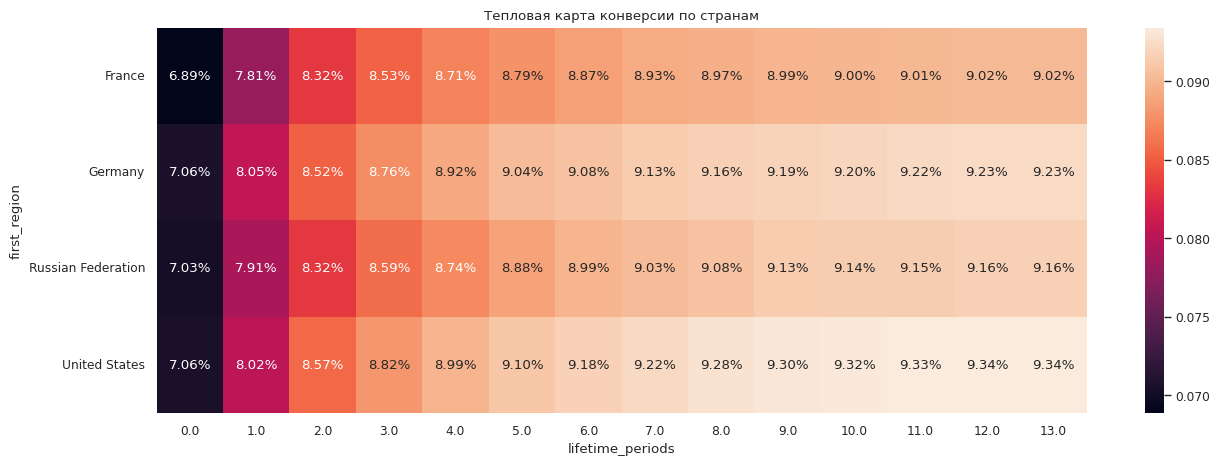

In [34]:
#@title heatmap conversion
_, \
cohorts_users, cohorts_conversion, \
cohorts_users_dyn, cohorts_conversion_dyn = get_conversion(orders, profiles,
                                                           last_cohort_moment=_LAST_COHORT,
                                                           horizon=_HORIZON, ignore_horizon=True, dimensions=['first_region'])

# строим хитмэп по таблице конверсии
plt.figure(figsize=(15, 5))
sns.heatmap(cohorts_conversion.drop(columns=['cohort_size']), annot=True, fmt='.2%')
plt.title('Тепловая карта конверсии по странам')
plt.show()

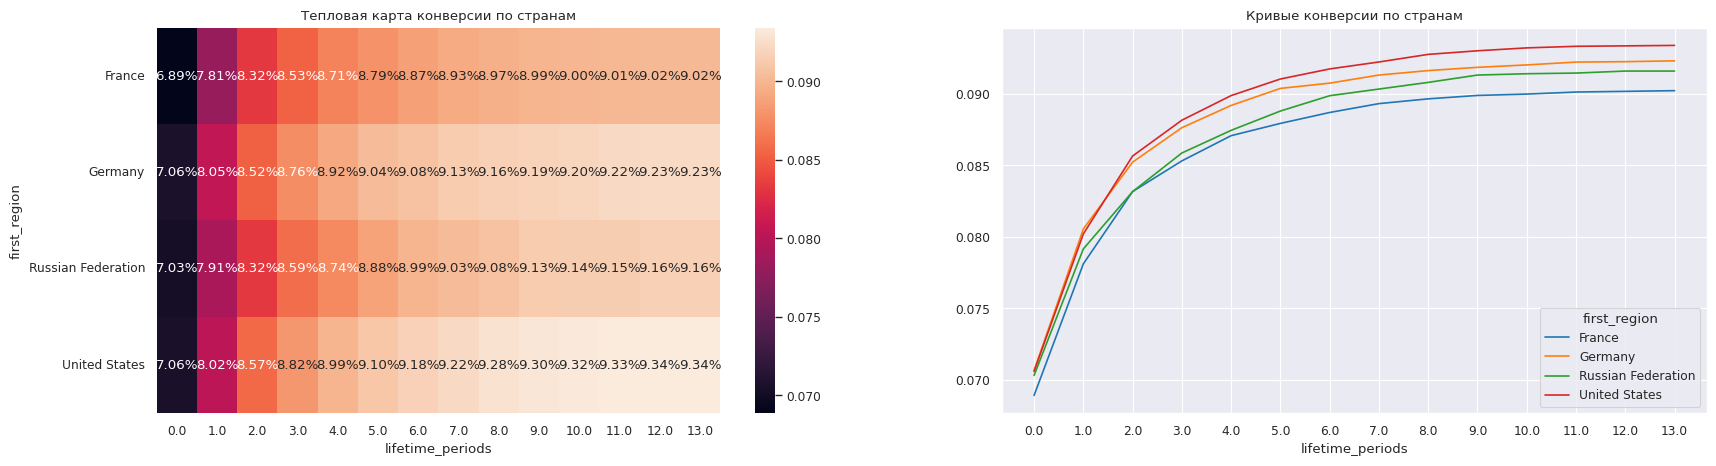

In [35]:
#@title heatmap and conversion dynamics
plt.figure(figsize = (20, 5)) # задаём размер «подложки»

# исключаем размеры когорт
# конверсии первого дня различаются, их удалять не нужно
report = cohorts_conversion.drop(columns = ['cohort_size'])

sns.heatmap(
    report, annot=True, fmt='.2%', ax=plt.subplot(1, 2, 1)
)  # в первой ячейке таблицы графиков строим тепловую карту
plt.title('Тепловая карта конверсии по странам')

report.T.plot(
    grid=True, xticks=list(report.columns.values), ax=plt.subplot(1, 2, 2)
)  # во второй — кривые конверсии
plt.title('Кривые конверсии по странам')

plt.show()

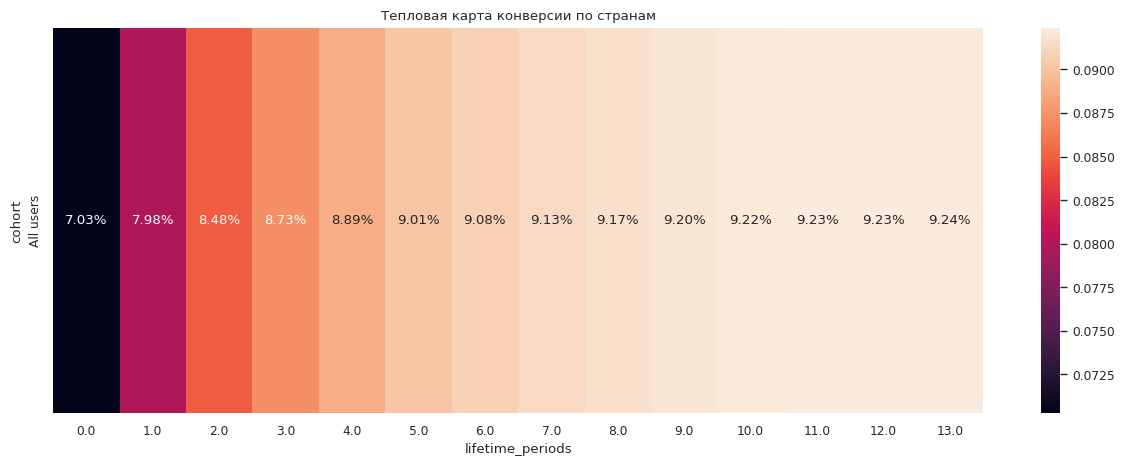

In [36]:
#@title heatmap conversion without dimensions - All users
_, \
cohorts_users, cohorts_conversion, \
cohorts_users_dyn, cohorts_conversion_dyn = get_conversion(orders, profiles,
                                                           #last_cohort_moment=(sessions.session_start.max()-timedelta(6)).date(),
                                                           last_cohort_moment=_LAST_COHORT,
                                                           horizon=_HORIZON, ignore_horizon=True, dimensions=[])

# строим хитмэп по таблице конверсии
plt.figure(figsize=(15, 5))
sns.heatmap(cohorts_conversion.drop(columns=['cohort_size']), annot=True, fmt='.2%')
plt.title('Тепловая карта конверсии по странам')
plt.show()

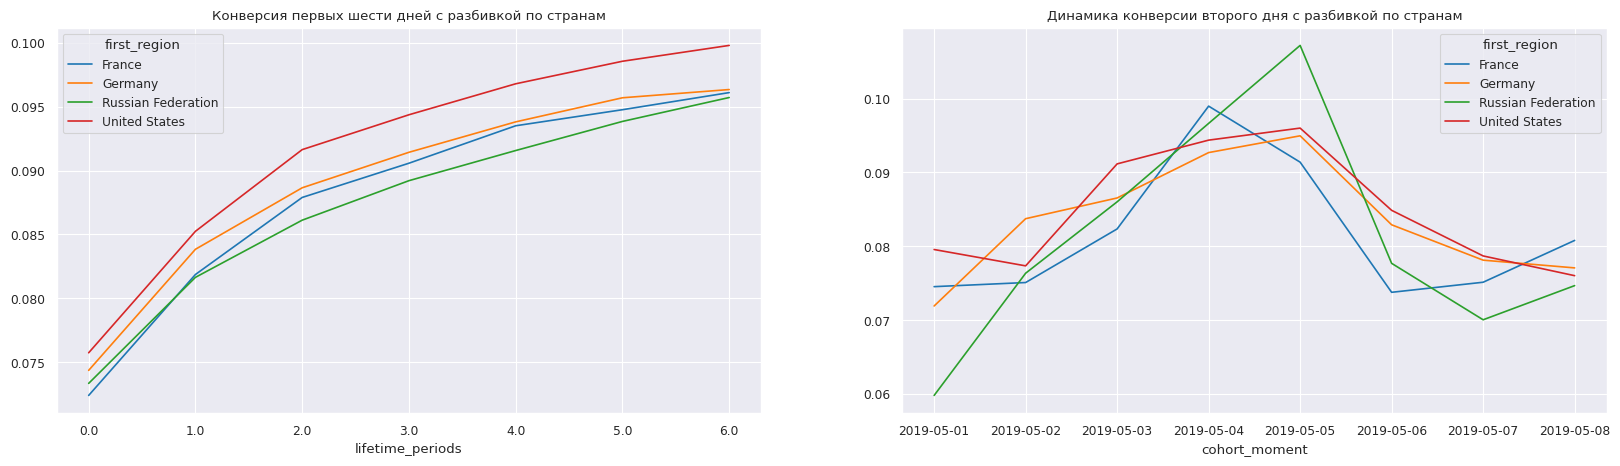

In [37]:
#@title conversion dynamics
_, _, cohorts_conversion, _, cohorts_conversion_dyn = get_conversion(orders, profiles,
                                                               #last_cohort_moment=(sessions.session_start.max()-timedelta(6)).date(),
                                                               last_cohort_moment=_LAST_COHORT,
                                                               horizon=_HORIZON, ignore_horizon=False, dimensions=['first_region'] )
plt.figure(figsize=(20, 5)) # размер сетки для графиков

# для кривых конверсии исключаем размеры когорт
report = cohorts_conversion.drop(columns=['cohort_size'])
report.T.plot(
    # строим кривые конверсии в первой ячейке таблицы графиков
    grid=True, xticks=list(report.columns.values), ax=plt.subplot(1, 2, 1)
)
plt.title('Конверсия первых шести дней с разбивкой по странам')

# для графика истории изменений
# преобразуем таблицу динамики конверсии
report = (
    cohorts_conversion_dyn[1]
    .reset_index()
    .pivot_table(index='cohort_moment', columns='first_region', values=1, aggfunc='mean')
    .fillna(0)  # заполняем пропуски на случай, если они возникнут
)
report.plot(
    # во второй ячейке строим график истории изменений
    grid=True, ax=plt.subplot(1, 2, 2)
)
plt.title('Динамика конверсии второго дня с разбивкой по странам')

plt.show()


#LTV

In [38]:
#@title get_ltv function
def get_ltv(events, profiles, last_cohort_moment, horizon, ignore_horizon=False, first_cohort_moment=None, dimensions=[]):
    """
    events - журнал покупок / конверсионных событий
    profiles - профили пользователей
    last_cohort_moment - последняя когорта которую берем в анализ (ограничение появляется естественным образом
                         если горизонт анализа выходит за момент анализа и когорта еще не прожила нужный период)
    horizon - горизонт анализа
    ignore_horizon - игнорировать горизонт? (True - выводим все доступные когорты (треугольная матрица);
                                             False - выводим только когорты [0..hirizon-1])
    first_cohort_moment - если хотим ограничить и не брать в анализ старые когорты
    """
    if not ignore_horizon:
        profiles_filtered = profiles[profiles.cohort_moment<=last_cohort_moment+timedelta(1)]
    else:
        profiles_filtered = profiles

    if first_cohort_moment is not None:
        profiles_filtered = profiles_filtered[profiles_filtered.cohort_moment>=first_cohort_moment]

    ltv_raw = join_purchase_with_profiles(events, profiles_filtered)

    def group_by_dimensions(df, dims, horizon):
        if len(dims) == 0:
            df['cohort'] = "All users"
            dims = ['cohort']

        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )

        df_filtered = df
        if not ignore_horizon:
            df_filtered = df[df.lifetime_periods<horizon]

        cohorts_revenue = df_filtered.pivot_table(index=dims, columns='lifetime_periods', values='first_revenue', aggfunc='sum') \
                          .fillna(0).cumsum(axis=1)


        cohorts_revenue['cohort_size'] = cohort_sizes
        cohorts_revenue = cohorts_revenue[['cohort_size'] + list(i for i in range(horizon if not ignore_horizon else len(cohorts_revenue.columns)-1) if i in cohorts_revenue.columns)]
        cohorts_revenue = cohorts_revenue.fillna(0)
        cohorts_ltv = cohorts_revenue.div(cohorts_revenue['cohort_size'], axis=0)
        cohorts_ltv['cohort_size'] = cohort_sizes

        # сохраняем в датафрейм данные пользователей и значения CAC,
        # добавив параметры из dimensions
        cac = df[['user_id', 'cohort_cac'] + dims].drop_duplicates()

        # считаем средний CAC по параметрам из dimensions
        cac = (
            cac.groupby(dims)
            .agg({'cohort_cac': 'mean'})
            .rename(columns={'cohort_cac': 'cac'})
        )

        # считаем ROI: делим LTV на CAC
        roi = cohorts_ltv.div(cac['cac'], axis=0)

        # удаляем строки с бесконечным ROI
        roi = roi[~roi['cohort_size'].isin([np.inf])]

        # восстанавливаем размеры когорт в таблице ROI
        roi['cohort_size'] = cohort_sizes

        # добавляем CAC в таблицу ROI
        roi['cac'] = cac['cac']

        # в финальной таблице оставляем размеры когорт, CAC
        # и ROI в лайфтаймы, не превышающие горизонт анализа
        roi = roi[['cohort_size', 'cac'] + list(range(horizon))]

        return cohorts_revenue, cohorts_ltv, roi

    # агрегация без динамики ==
    cohorts_revenue, cohorts_ltv, roi = group_by_dimensions(ltv_raw, dimensions, horizon)

    # агрегация с динамикой ==
    cohorts_revenue_in_time, cohorts_ltv_in_time, roi_in_time = group_by_dimensions(ltv_raw, dimensions+['cohort_moment'], horizon)

    return (ltv_raw,
            cohorts_revenue, cohorts_ltv,
            cohorts_revenue_in_time, cohorts_ltv_in_time,
            roi, roi_in_time)


_, \
cohorts_revenue, cohorts_ltv, \
cohorts_revenue_dyn, cohorts_ltv_dyn, \
roi, roi_dyn = get_ltv(orders, profiles,
                last_cohort_moment=_LAST_COHORT,
                horizon=_HORIZON, ignore_horizon=False,
                #first_cohort_moment=(sessions.session_start.min()+timedelta(0)).date(),
                dimensions=['first_region']
               )
display_df(cohorts_revenue)
display_df(cohorts_ltv)

lifetime_periods    cohort_size       0.0       1.0       2.0       3.0  \
first_region                                                              
France                    11934   4575.36   5166.23   5573.51   5738.19   
Germany                   20145   8207.02   9247.11   9747.14  10033.58   
Russian Federation        12285   4609.99   5224.97   5499.42   5785.04   
United States             36270  14650.53  16453.08  17699.76  18239.77   

lifetime_periods         4.0       5.0       6.0  
first_region                                      
France               5914.84   5989.69   6069.53  
Germany             10275.10  10509.72  10580.59  
Russian Federation   5930.75   6071.47   6186.24  
United States       18723.89  19044.25  19275.80

lifetime_periods    cohort_size       0.0       1.0       2.0       3.0  \
first_region                                                              
France                    11934  0.383389  0.432900  0.467028  0.480827   
Germany                   20145  0.407397  0.459028  0.483849  0.498068   
Russian Federation        12285  0.375254  0.425313  0.447653  0.470903   
United States             36270  0.403930  0.453628  0.488000  0.502889   

lifetime_periods         4.0       5.0       6.0  
first_region                                      
France              0.495629  0.501901  0.508591  
Germany             0.510057  0.521704  0.525222  
Russian Federation  0.482764  0.494218  0.503560  
United States       0.516236  0.525069  0.531453

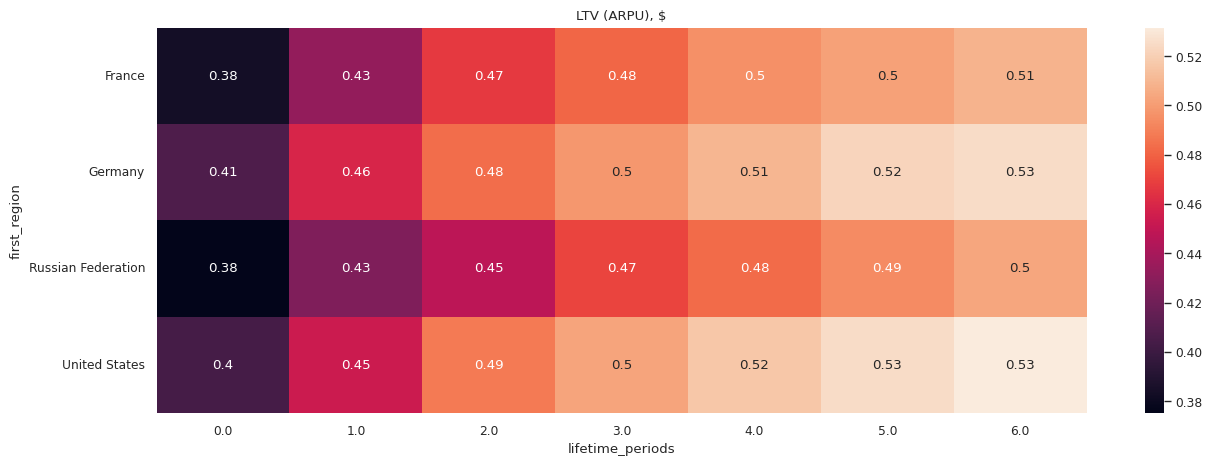

In [39]:
#@title heatmap LTV
_, \
cohorts_revenue, cohorts_ltv, \
cohorts_revenue_dyn, cohorts_ltv_dyn, \
_, _ = get_ltv(orders, profiles,
               last_cohort_moment=_LAST_COHORT,
               horizon=_HORIZON, ignore_horizon=False,
               #first_cohort_moment=(sessions.session_start.min()+timedelta(0)).date(),
               dimensions=['first_region']
              )

# строим хитмэп по таблице LTV
plt.figure(figsize=(15, 5))
sns.heatmap(cohorts_ltv.drop(columns=['cohort_size']), annot=True, )
plt.title('LTV (ARPU), $')
plt.show()

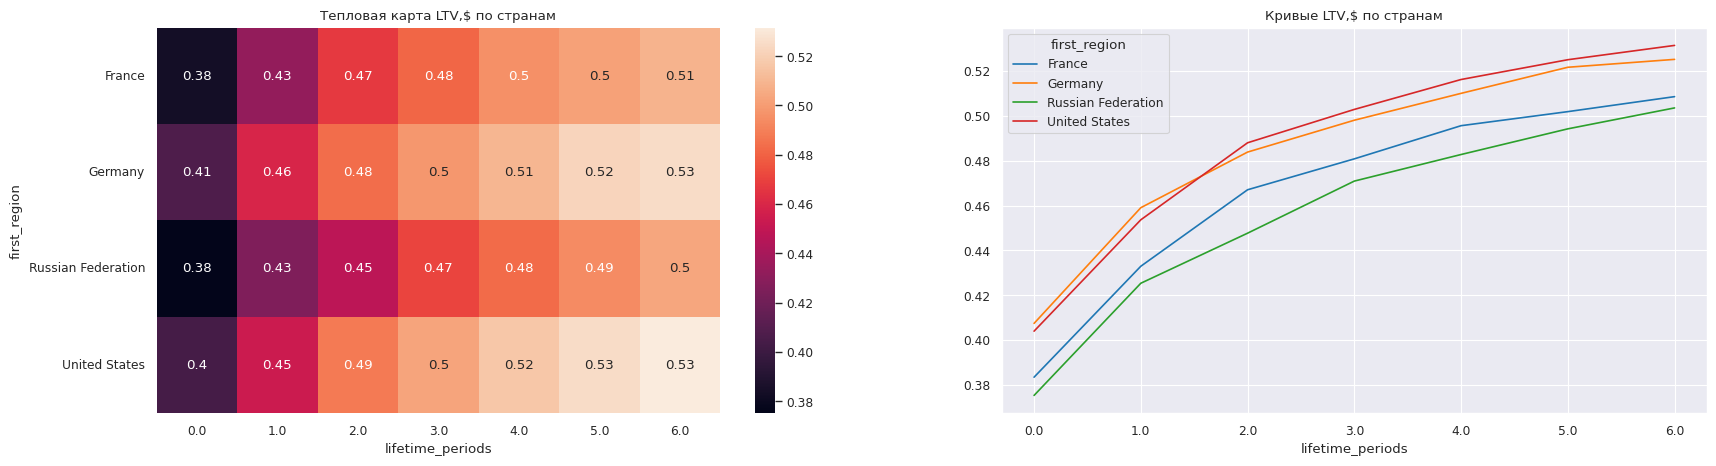

In [40]:
#@title heatmap and LTV dynamics
plt.figure(figsize = (20, 5)) # задаём размер «подложки»

# исключаем размеры когорт
# LTV первого дня различаются, их удалять не нужно
report = cohorts_ltv.drop(columns = ['cohort_size'])

sns.heatmap(
    report, annot=True, ax=plt.subplot(1, 2, 1)
)  # в первой ячейке таблицы графиков строим тепловую карту
plt.title('Тепловая карта LTV,$ по странам')

report.T.plot(
    grid=True, xticks=list(report.columns.values), ax=plt.subplot(1, 2, 2)
)  # во второй — динамику LTV
plt.title('Кривые LTV,$ по странам')

plt.show()

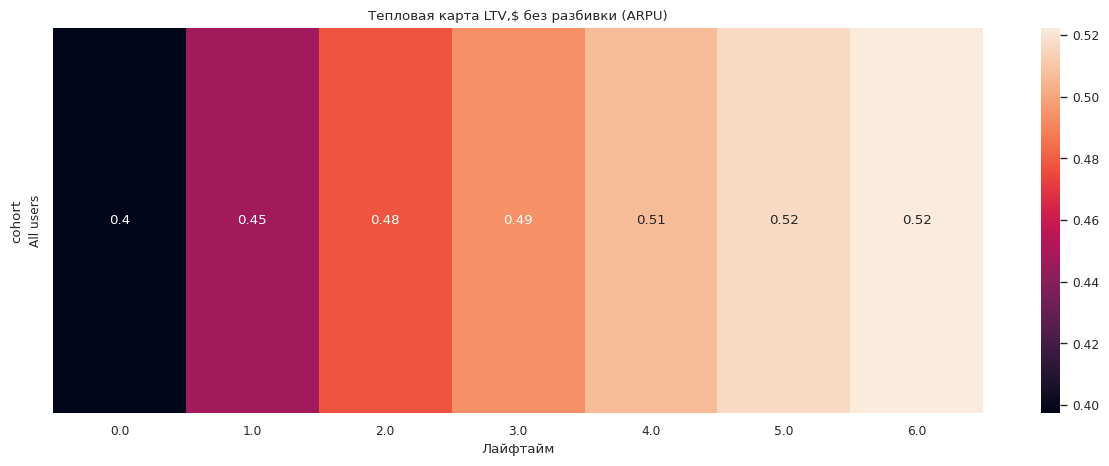

In [41]:
#@title heatmap LTV - All users
_, \
cohorts_revenue, cohorts_ltv, \
cohorts_revenue_dyn, cohorts_ltv_dyn, \
_, _ = get_ltv(orders, profiles,
               last_cohort_moment=_LAST_COHORT,
               horizon=_HORIZON, ignore_horizon=False,
               #first_cohort_moment=(sessions.session_start.min()+timedelta(0)).date(),
               dimensions=[]
              )
# строим хитмэп по таблице LTV
plt.figure(figsize=(15, 5))
sns.heatmap(cohorts_ltv.drop(columns=['cohort_size']), annot=True, )
plt.title('Тепловая карта LTV,$ без разбивки (ARPU)')
plt.xlabel('Лайфтайм')
plt.show()

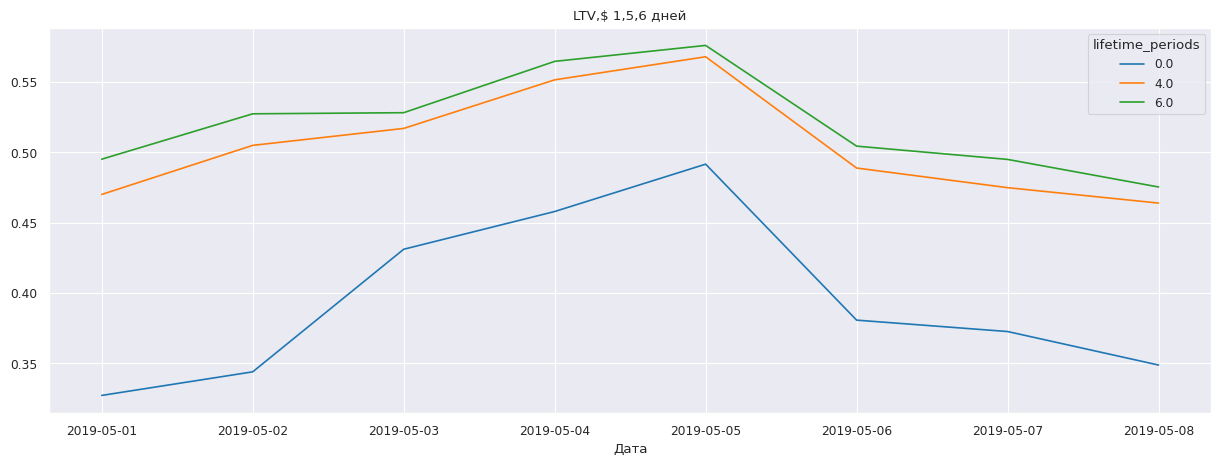

In [42]:
#@title LTV dynamics
_, \
cohorts_revenue, cohorts_ltv, \
cohorts_revenue_dyn, cohorts_ltv_dyn, \
roi, roi_dyn = get_ltv(orders, profiles,
                       last_cohort_moment=_LAST_COHORT,
                       horizon=_HORIZON, ignore_horizon=False,
                       #first_cohort_moment=(sessions.session_start.min()+timedelta(0)).date(),
                       dimensions=[]
                      )

cohorts_ltv_dyn.drop(columns=['cohort_size', ])[[0,4,6]].plot(
    grid=True,  # добавляем сетку
    figsize=(15, 5),  # размер графика
);
plt.xlabel('Дата')  # название оси X
plt.title('LTV,$ 1,5,6 дней')  # название графика
plt.show()

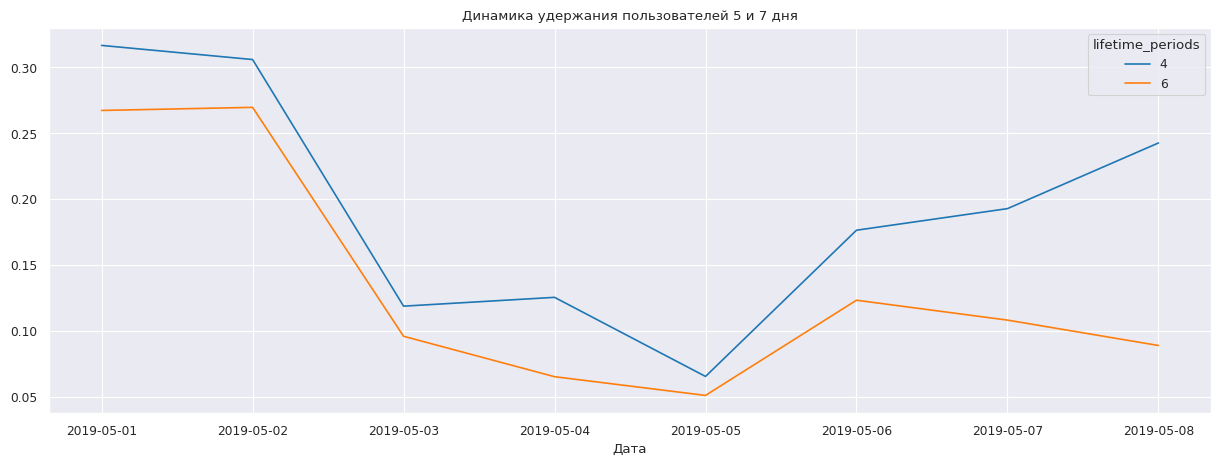

In [43]:
#@title проверим гипотезу
"""
Любопытно: для пользователей, привлечённых между 2 и 6 мая,
LTV первого дня, отражённый на нижней линии, растёт,
а LTV пятого и седьмого дня (средняя и верхняя линии), наоборот, падает.

Проверим одно из предположений — о привлечении пользователей, которые много покупали, но быстро «отваливались».

Похоже, предположение подтвердилось: падение удержания платящих пользователей совпадает
по времени со снижением LTV пятого и седьмого дней.
"""
if dataset==1:
    _, _, _, cohorts_users_dyn, cohorts_retention_dyn = get_retention(sessions, profiles,
                                                                   last_cohort_moment=(sessions.session_start.max()-timedelta(7)).date(),
                                                                   horizon=7, ignore_horizon=False, dimensions=['purchase_event'])

    cohorts_retention_dyn.loc[True, [4, 6]].plot(
        grid=True,  # добавляем сетку
        figsize=(15, 5),  # размер графика
    );
    plt.xlabel('Дата')  # название оси X
    plt.title('Динамика удержания пользователей 5 и 7 дня')  # название графика
    plt.show()

#CAC и ROI

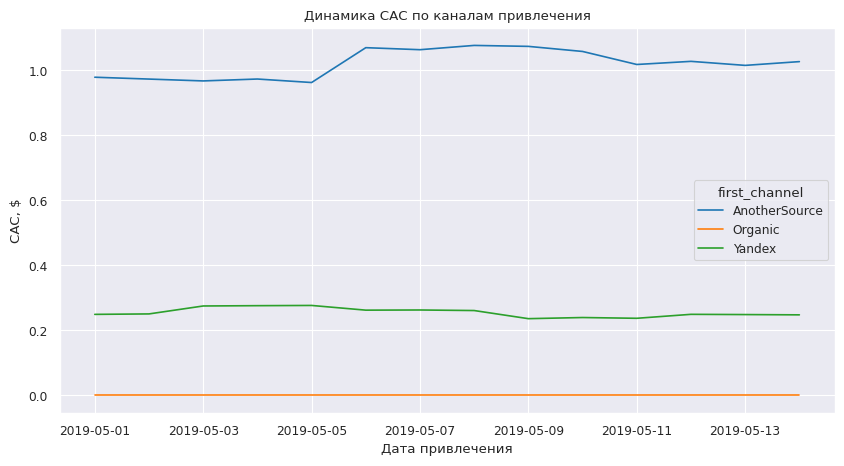

In [44]:
#@title CAC by first_channel
profiles.pivot_table(
    index='cohort_moment', columns='first_channel', values='cohort_cac', aggfunc='mean' # или first в данном случае не важно
).plot(grid=True, figsize=(10, 5))
plt.ylabel('CAC, $')
plt.xlabel('Дата привлечения')
plt.title('Динамика САС по каналам привлечения')
plt.show()

lifetime_periods  cohort_size       0.0       1.0       2.0       3.0  \
first_channel                                                           
AnotherSource           14122  0.288709  0.324473  0.349290  0.362794   
Organic                 39535  0.452986  0.511080  0.544657  0.562861   
Yandex                  26977  0.372797  0.419010  0.446831  0.460411   

lifetime_periods       4.0       5.0       6.0  
first_channel                                   
AnotherSource     0.373395  0.381875  0.388236  
Organic           0.577984  0.588891  0.595076  
Yandex            0.471547  0.479685  0.485716

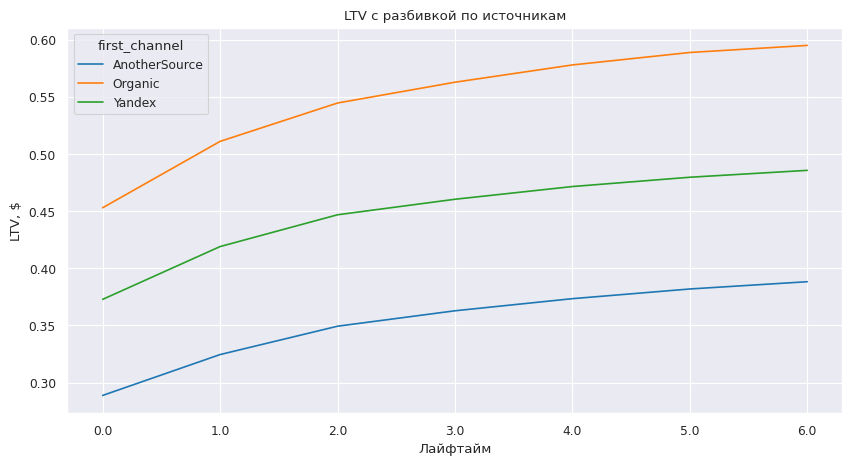

In [45]:
#@title Calculating LTV by first_channel
ltv_raw, \
cohorts_revenue, cohorts_ltv, \
cohorts_revenue_dyn, cohorts_ltv_dyn, \
roi, roi_dyn = get_ltv(orders, profiles,
                       last_cohort_moment=_LAST_COHORT,
                       horizon=_HORIZON, ignore_horizon=False,
                       dimensions=['first_channel']
                      )

# таблица LTV
display(cohorts_ltv)

# кривые LTV
report = cohorts_ltv.drop(columns=['cohort_size'])
report.T.plot(grid=True, figsize=(10, 5), xticks=list(report.columns.values))
plt.title('LTV с разбивкой по источникам')
plt.ylabel('LTV, $')
plt.xlabel('Лайфтайм')
plt.show()

user_id
cohort_moment         
2019-05-01       10369
2019-05-02        8556
2019-05-03        9029
2019-05-04       11426
2019-05-05       11155
2019-05-06       11554
2019-05-07        9804
2019-05-08        8741

cac
first_channel          
AnotherSource  1.007541
Organic        0.000000
Yandex         0.264539

lifetime_periods  cohort_size       0.0       1.0       2.0       3.0  \
first_channel                                                           
AnotherSource           14122  0.286548  0.322044  0.346675  0.360079   
Yandex                  26977  1.409233  1.583926  1.689093  1.740430   

lifetime_periods       4.0       5.0       6.0  
first_channel                                   
AnotherSource     0.370600  0.379017  0.385330  
Yandex            1.782523  1.813289  1.836085

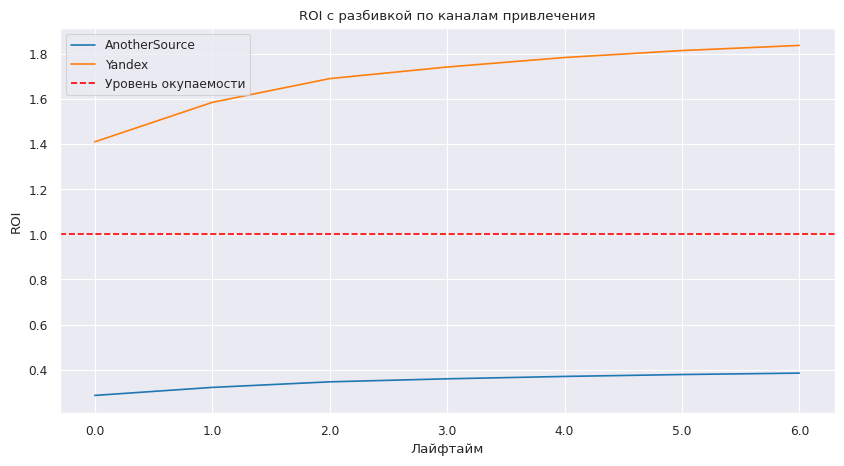

In [46]:
#@title EXAMPLE Calculation ROI
# находим максимальную дату привлечения из сырых данных LTV
max_acquitision_dt = ltv_raw['cohort_moment'].max()
# отсекаем профили, которые «старше» этой даты
ltv_profiles = profiles.query('cohort_moment <= @max_acquitision_dt')
# оставшееся число пользователей на каждый лайфтайм
display(ltv_profiles.groupby('cohort_moment').agg({'user_id': 'nunique'}))

#а можно так
#cohorts_ltv_dyn.cohort_size.groupby('cohort_moment').sum()
#или так
#cohorts_revenue_dyn.cohort_size.groupby('cohort_moment').sum()

#CAC by first_channel
cac = (
    ltv_profiles.groupby('first_channel')
    .agg({'cohort_cac': 'mean'})
    .rename(columns={'cohort_cac': 'cac'})
)
display(cac)

#Calculating ROI
roi = cohorts_ltv.div(cac['cac'], axis=0)
roi['cohort_size'] = cohorts_ltv['cohort_size']
roi = roi[~np.isinf(roi[0])]
display(roi)
report = roi.drop(columns=['cohort_size'])
report.T.plot(grid=True, figsize=(10, 5), xticks=list(report.columns.values))

plt.title('ROI с разбивкой по каналам привлечения')
plt.ylabel('ROI')
plt.xlabel('Лайфтайм')
plt.axhline(y=1, color='red', linestyle='--', label='Уровень окупаемости')
plt.legend()
plt.show()

lifetime_periods  cohort_size       cac       0.0       1.0       2.0  \
first_channel                                                           
AnotherSource           14122  1.007541  0.286548  0.322044  0.346675   
Yandex                  26977  0.264539  1.409233  1.583926  1.689093   

lifetime_periods       3.0       4.0       5.0       6.0  
first_channel                                             
AnotherSource     0.360079  0.370600  0.379017  0.385330  
Yandex            1.740430  1.782523  1.813289  1.836085

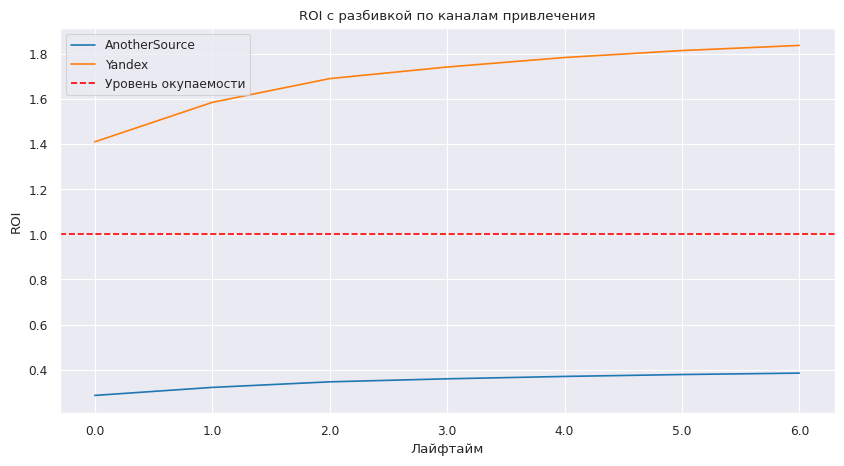

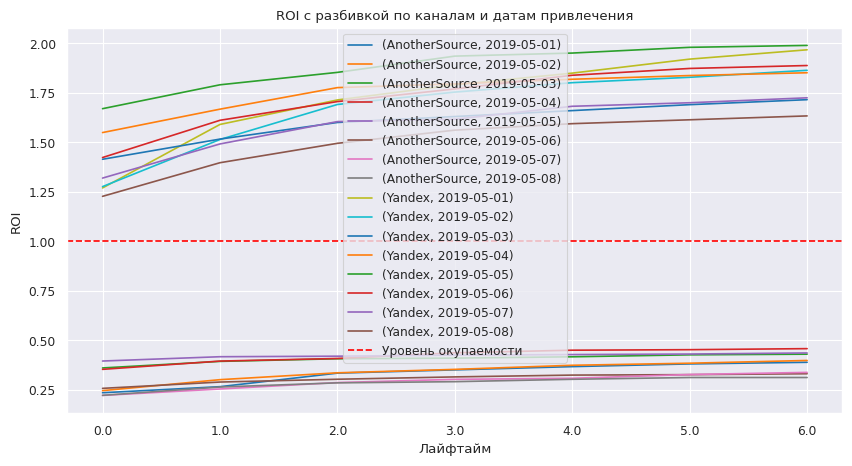

In [47]:
#@title ROI returned with get_ltv
ltv_raw, \
cohorts_revenue, cohorts_ltv, \
cohorts_revenue_dyn, cohorts_ltv_dyn, \
roi, roi_dyn = get_ltv(orders, profiles,
                       last_cohort_moment=_LAST_COHORT,
                       horizon=_HORIZON, ignore_horizon=False,
                       dimensions=['first_channel']
                      )
display(roi)
report = roi.drop(columns=['cohort_size', 'cac'])
report.T.plot(grid=True, figsize=(10, 5), xticks=list(report.columns.values))

plt.title('ROI с разбивкой по каналам привлечения')
plt.ylabel('ROI')
plt.xlabel('Лайфтайм')
plt.axhline(y=1, color='red', linestyle='--', label='Уровень окупаемости')
plt.legend()
plt.show()

report = roi_dyn.drop(columns=['cohort_size', 'cac'])
report.T.plot(grid=True, figsize=(10, 5), xticks=list(report.columns.values))

plt.title('ROI с разбивкой по каналам и датам привлечения')
plt.ylabel('ROI')
plt.xlabel('Лайфтайм')
plt.axhline(y=1, color='red', linestyle='--', label='Уровень окупаемости')
plt.legend()
plt.show()

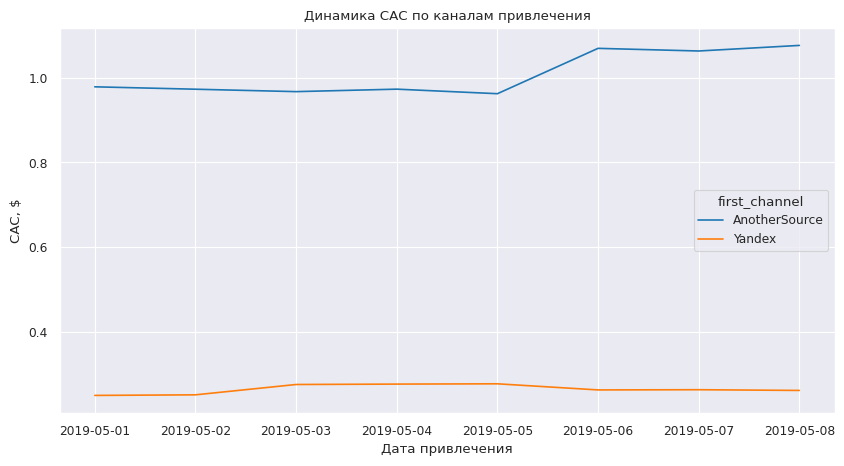

In [48]:
#@title строим график истории изменений CAC по таблице с динамикой ROI
roi_dyn.pivot_table(
    index='cohort_moment', columns='first_channel', values='cac', aggfunc='mean'
).plot(grid=True, figsize=(10, 5))

plt.ylabel('CAC, $')
plt.xlabel('Дата привлечения')
plt.title('Динамика САС по каналам привлечения')
plt.show()

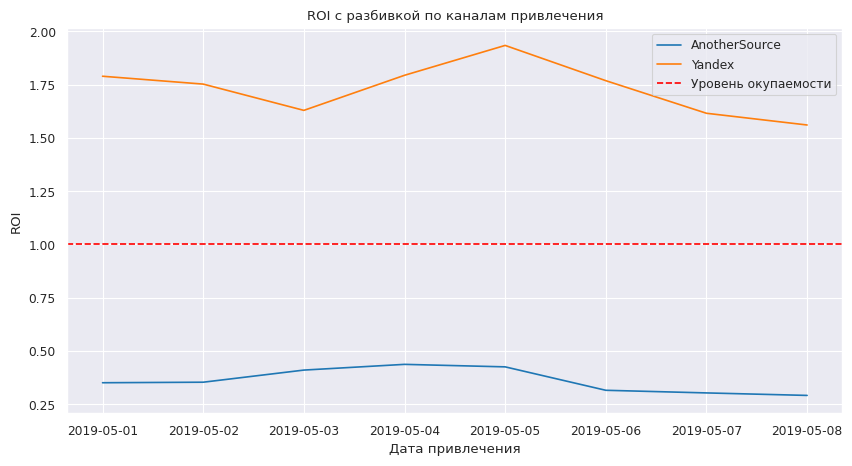

In [49]:
#@title dynamics plot of first day ROI

roi_dyn.pivot_table(
    index='cohort_moment', columns='first_channel', values=3, aggfunc='mean'
).plot(grid=True, figsize=(10, 5))

plt.title('ROI с разбивкой по каналам привлечения')
plt.ylabel('ROI')
plt.xlabel('Дата привлечения')
plt.axhline(y=1, color='red', linestyle='--', label='Уровень окупаемости')
plt.legend()
plt.show()

#Visualisation

lifetime_periods             cohort_size    0         1         2         3  \
purchase_event first_device                                                   
False          Android             14467  1.0  0.248842  0.146402  0.104237   
               Mac                 18192  1.0  0.238072  0.149131  0.101363   
               PC                   7532  1.0  0.236856  0.144716  0.101699   
               iPhone              32330  1.0  0.243953  0.147912  0.103866   
True           Android              1615  1.0  0.381424  0.285449  0.224768   
               Mac                  1996  1.0  0.397295  0.295090  0.236473   
               PC                    847  1.0  0.386068  0.285714  0.210153   
               iPhone               3655  1.0  0.378933  0.287825  0.203557   

lifetime_periods                    4         5         6  
purchase_event first_device                                
False          Android       0.078662  0.061174  0.049354  
               Mac           0.077287  0.063709  0.047713  
               PC            0.081652  0.065189  0.052974  
               iPhone        0.078070  0.061800  0.046489  
True           Android       0.170898  0.156037  0.134365  
               Mac           0.188878  0.145291  0.137776  
               PC            0.191263  0.153483  0.123967  
               iPhone        0.190971  0.170725  0.125855

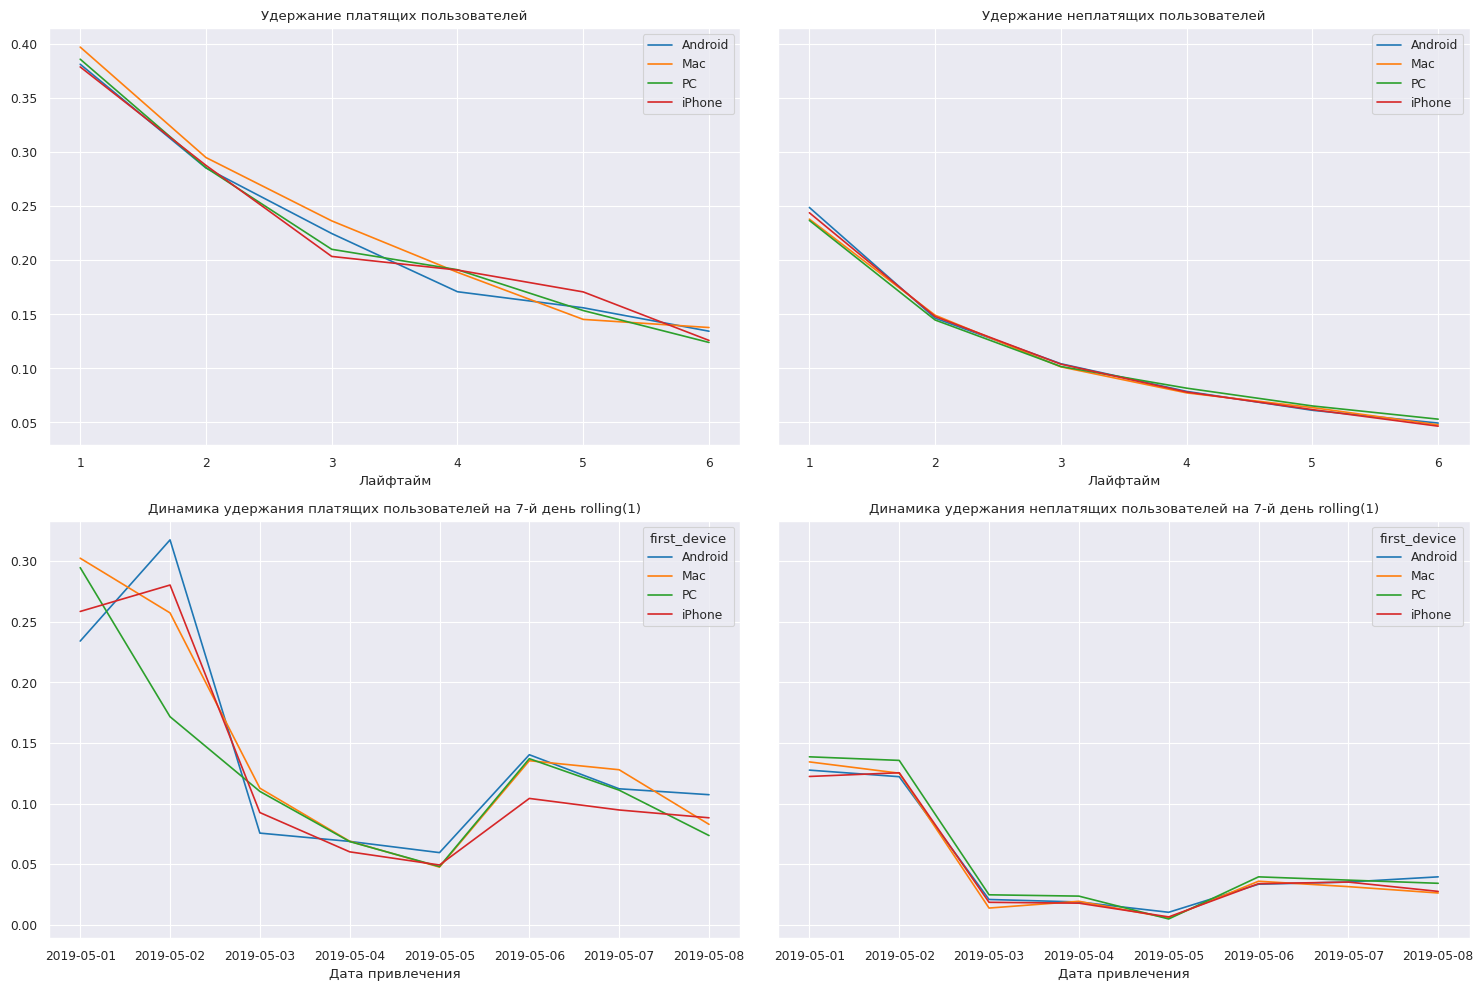

In [50]:
#@title Retention rate & dynamics for n-group cohort
_, cohorts_users, cohorts_retention, cohorts_users_dyn, cohorts_retention_dyn = get_retention(sessions, profiles,
                                                               last_cohort_moment=_LAST_COHORT,
                                                               horizon=_HORIZON, ignore_horizon=False,
                                                               #first_cohort_moment=(sessions.session_start.min()+timedelta(0)).date(),
                                                               dimensions=['purchase_event', 'first_device']
                                                              )
display_df(cohorts_retention)

def plot_cohorts_retention(retention, retention_dyn, horizon, rolling_window=1):
    # задаём размер сетки для графиков
    plt.figure(figsize=(15, 10))

    # исключаем размеры когорт и удержания первого дня
    retention = retention.drop(columns=['cohort_size', 0])

    # если в индексах таблицы удержания только purchase_event,
    # добавляем второй признак — cohort
    if retention.index.nlevels == 1:
        retention['cohort'] = 'All users'
        retention = retention.reset_index().set_index(['cohort', 'purchase_event'])

    # в таблице графиков — два столбца и две строки, четыре ячейки
    # в первой строим кривые удержания платящих пользователей
    ax1 = plt.subplot(2, 2, 1)
    retention.query('purchase_event == True').droplevel('purchase_event').T.plot(
        grid=True, ax=ax1
    )
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Удержание платящих пользователей')

    # во второй ячейке — кривые удержания неплатящих
    ax2 = plt.subplot(2, 2, 2, sharey=ax1)
    retention.query('purchase_event == False').droplevel('purchase_event').T.plot(
        grid=True, ax=ax2
    )
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Удержание неплатящих пользователей')

    # в третьей ячейке — динамика удержания платящих
    ax3 = plt.subplot(2, 2, 3)
    # получаем названия столбцов для сводной таблицы
    columns = [name for name in retention_dyn.index.names if name not in ['cohort_moment', 'purchase_event']]
    # фильтруем данные, строим сводную таблицу и график по ней
    tmp = retention_dyn.query('purchase_event == True').pivot_table(
        index='cohort_moment', columns=columns, values=horizon-1, aggfunc='mean'
    )
    tmp.rolling(rolling_window).mean().plot(grid=True, ax=ax3)
    plt.xlabel('Дата привлечения')
    title = 'Динамика удержания платящих пользователей на {}-й день'.format(horizon)
    title = f'{title} rolling({rolling_window})'
    plt.title(title)

    # в четвёртой ячейке — динамика удержания неплатящих
    ax4 = plt.subplot(2, 2, 4, sharey = ax3)
    # фильтруем данные, строим сводную таблицу и график по ней
    tmp = retention_dyn.query('purchase_event == False').pivot_table(
        index='cohort_moment', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    tmp.rolling(rolling_window).mean().plot(grid=True, ax=ax4)
    plt.xlabel('Дата привлечения')
    title = 'Динамика удержания неплатящих пользователей на {}-й день'.format(horizon)
    title = f'{title} rolling({rolling_window})'
    plt.title(title)

    # исключаем наложение графиков друг на друга
    plt.tight_layout()
    plt.show()

plot_cohorts_retention(cohorts_retention, cohorts_retention_dyn, _HORIZON, 1)

lifetime_periods  cohort_size       0.0       1.0       2.0       3.0  \
first_device                                                            
Android                 16082  0.074618  0.083510  0.089044  0.092215   
Mac                     20188  0.073014  0.081880  0.087280  0.090004   
PC                       8379  0.076143  0.086048  0.091061  0.093567   
iPhone                  35985  0.074976  0.084591  0.090593  0.093317   

lifetime_periods       4.0       5.0       6.0  
first_device                                    
Android           0.094143  0.096008  0.097749  
Mac               0.092580  0.094363  0.095601  
PC                0.095954  0.097864  0.098699  
iPhone            0.096012  0.097763  0.098791

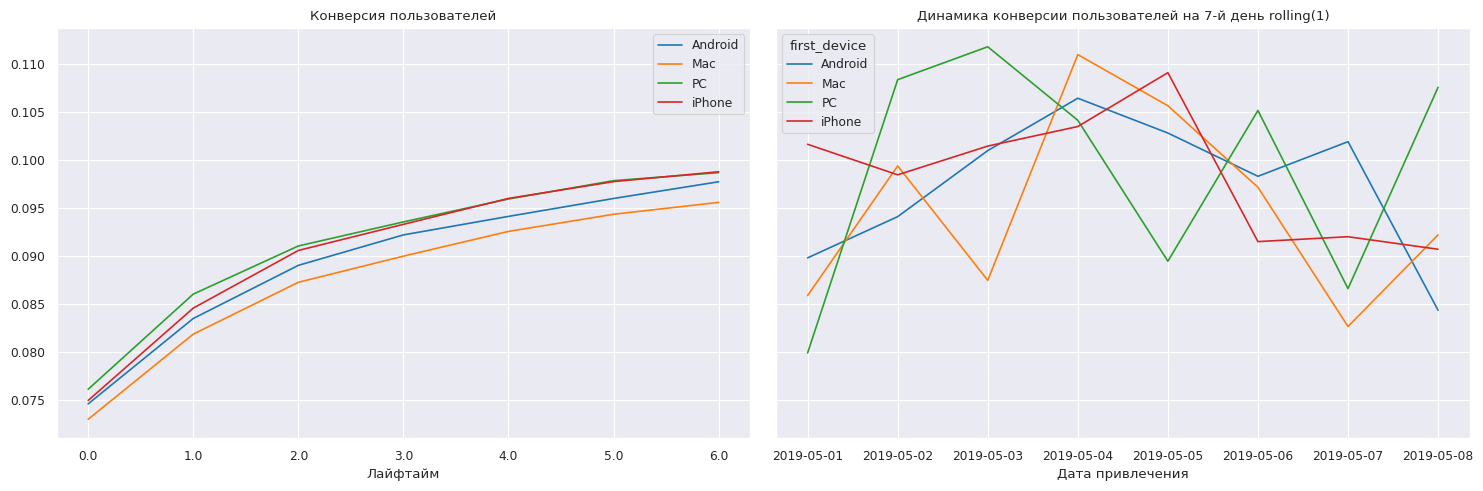

In [51]:
#@title Conversion & dynamics for n-group cohort
_, \
cohorts_users, cohorts_conversion, \
cohorts_users_dyn, cohorts_conversion_dyn = get_conversion(orders, profiles,
                                                           last_cohort_moment=_LAST_COHORT,
                                                           horizon=_HORIZON, ignore_horizon=False,
                                                           #first_cohort_moment=(sessions.session_start.min()+timedelta(0)).date(),
                                                           dimensions=['first_device']
                                                          )
display_df(cohorts_conversion)


def plot_cohorts_conversion(conversion, conversion_dyn, horizon, rolling_window=1):
    # задаём размер сетки для графиков
    plt.figure(figsize=(15, 5))

    # исключаем размеры когорт
    conversion = conversion.drop(columns=['cohort_size'])
    # в таблице динамики оставляем только нужный лайфтайм
    conversion_dyn = conversion_dyn.drop(columns=['cohort_size'])[[horizon - 1]]

    # первый график — кривые конверсии
    ax1 = plt.subplot(1, 2, 1)
    conversion.T.plot(grid=True, ax=ax1)
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Конверсия пользователей')


    # второй график — динамика конверсии
    ax2 = plt.subplot(1, 2, 2, sharey=ax1)
    # столбцами сводной таблицы станут все столбцы индекса, кроме даты
    columns = [name for name in conversion_dyn.index.names if name not in ['cohort_moment']]
    tmp = conversion_dyn.pivot_table(index='cohort_moment', columns=columns, values=horizon - 1, aggfunc='mean')
    tmp.rolling(rolling_window).mean().plot(grid=True, ax=ax2)
    plt.xlabel('Дата привлечения')
    title = 'Динамика конверсии пользователей на {}-й день'.format(horizon)
    title = f'{title} rolling({rolling_window})'
    plt.title(title)
    plt.tight_layout()
    plt.show()


plot_cohorts_conversion(cohorts_conversion, cohorts_conversion_dyn, _HORIZON, 1)


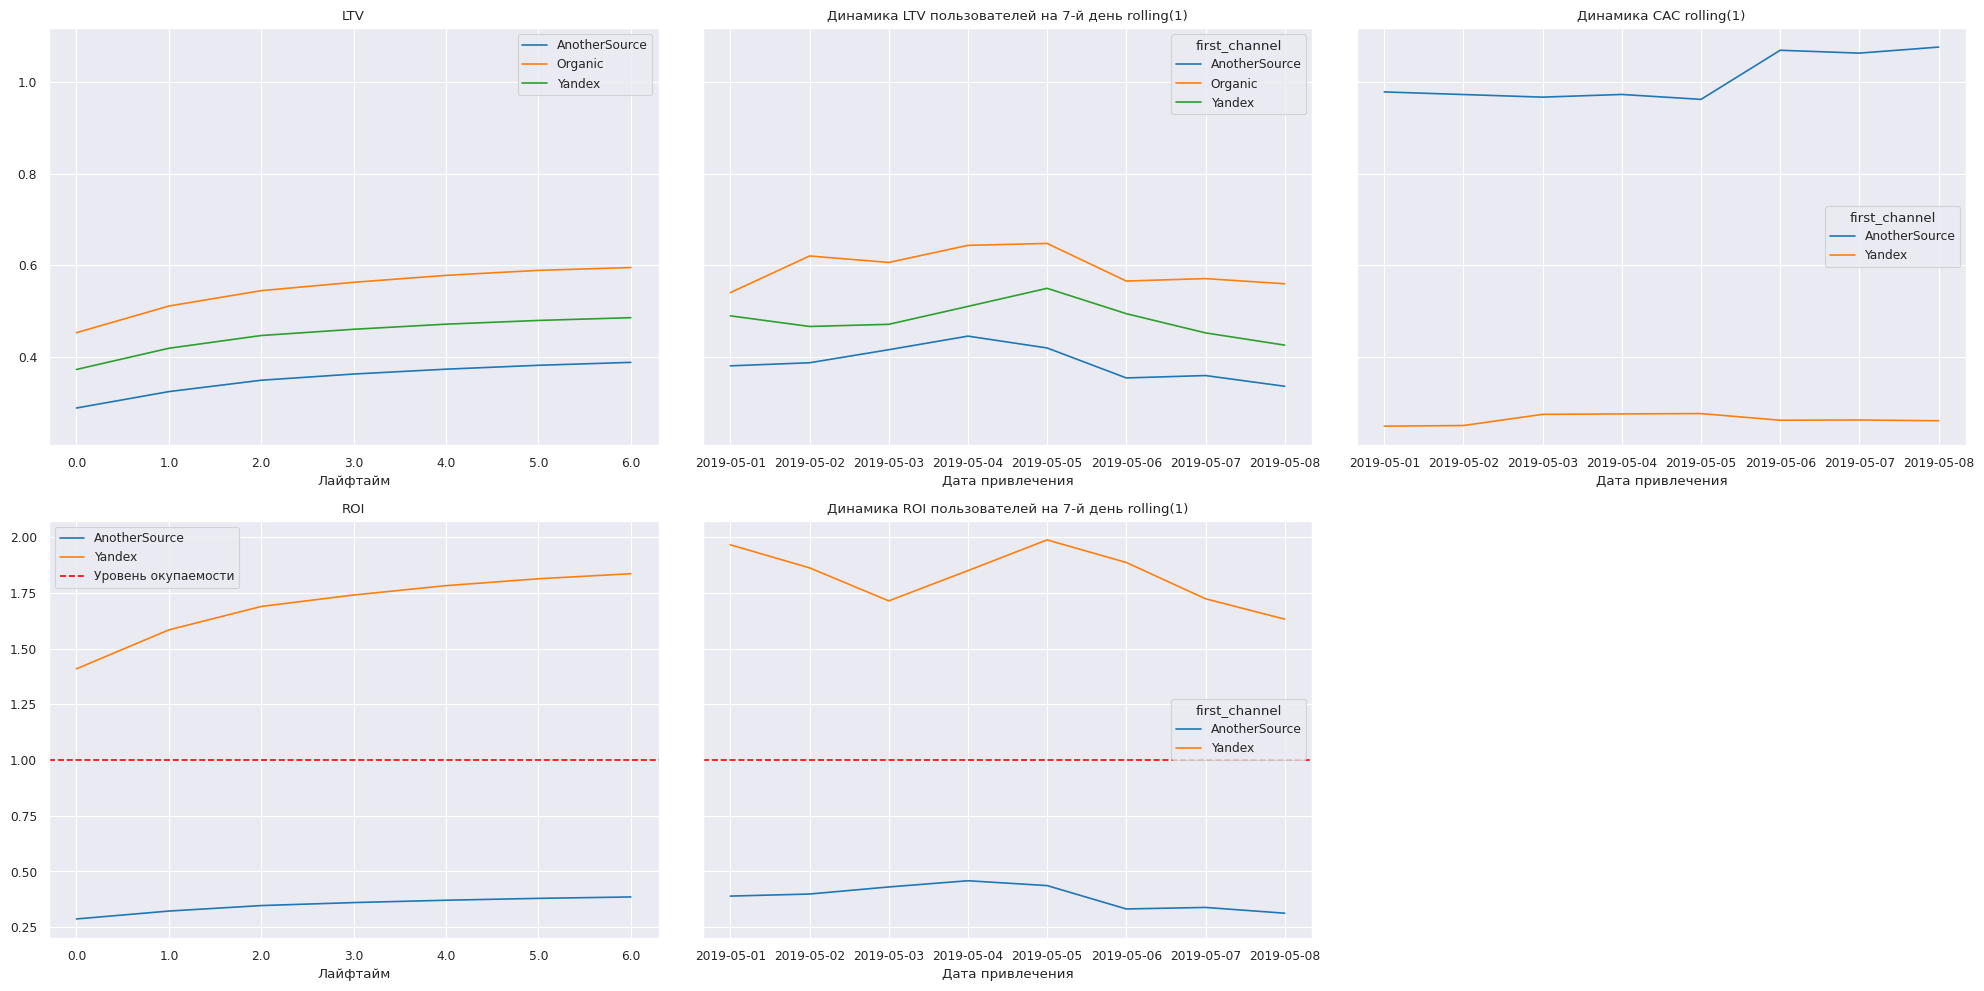

In [52]:
#@title LTV,ROI & dynamics for n-group cohort
_, \
cohorts_revenue, cohorts_ltv, \
cohorts_revenue_dyn, cohorts_ltv_dyn, \
roi, roi_dyn = get_ltv(orders, profiles,
                last_cohort_moment=_LAST_COHORT,
                horizon=_HORIZON, ignore_horizon=False,
                #first_cohort_moment=(sessions.session_start.min()+timedelta(0)).date(),
                dimensions=['first_channel']
               )

def plot_ltv_roi(ltv, ltv_dyn, roi, roi_dyn, horizon, rolling_window=1):

    # задаём сетку отрисовки графиков
    plt.figure(figsize=(20, 10))

    # из таблицы ltv исключаем размеры когорт
    ltv = ltv.drop(columns=['cohort_size'])
    # в таблице динамики ltv оставляем только нужный лайфтайм
    ltv_dyn = ltv_dyn.drop(columns=['cohort_size'])[[horizon - 1]]

    # стоимость привлечения запишем в отдельный фрейм
    cac_history = roi_dyn[['cac']]

    # из таблицы roi исключаем размеры когорт и cac
    roi = roi.drop(columns=['cohort_size', 'cac'])
    # в таблице динамики roi оставляем только нужный лайфтайм
    roi_dyn = roi_dyn.drop(columns=['cohort_size', 'cac'])[[horizon - 1]]

    # первый график — кривые ltv
    ax1 = plt.subplot(2, 3, 1)
    ltv.T.plot(grid=True, ax=ax1)
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('LTV')

    # второй график — динамика ltv
    ax2 = plt.subplot(2, 3, 2, sharey=ax1)
    # столбцами сводной таблицы станут все столбцы индекса, кроме даты
    columns = [name for name in ltv_dyn.index.names if name not in ['cohort_moment']]
    tmp = ltv_dyn.pivot_table(
        index='cohort_moment', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    tmp.rolling(rolling_window).mean().plot(grid=True, ax=ax2)
    plt.xlabel('Дата привлечения')
    title = 'Динамика LTV пользователей на {}-й день'.format(horizon)
    title = f'{title} rolling({rolling_window})'
    plt.title(title)

    # третий график — динамика cac
    ax3 = plt.subplot(2, 3, 3, sharey=ax1)
    # столбцами сводной таблицы станут все столбцы индекса, кроме даты
    columns = [name for name in cac_history.index.names if name not in ['cohort_moment']]
    tmp = cac_history.pivot_table(
        index='cohort_moment', columns=columns, values='cac', aggfunc='mean'
    )
    tmp.rolling(rolling_window).mean().plot(grid=True, ax=ax3)
    plt.xlabel('Дата привлечения')
    title = 'Динамика CAC'
    title = f'{title} rolling({rolling_window})'
    plt.title(title)

    # четвёртый график — кривые roi
    ax4 = plt.subplot(2, 3, 4)
    roi.T.plot(grid=True, ax=ax4)
    plt.axhline(y=1, color='red', linestyle='--', label='Уровень окупаемости')
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('ROI')

    # пятый график — динамика roi
    ax5 = plt.subplot(2, 3, 5, sharey=ax4)
    # столбцами сводной таблицы станут все столбцы индекса, кроме даты
    columns = [name for name in roi_dyn.index.names if name not in ['cohort_moment']]
    tmp = roi_dyn.pivot_table(
        index='cohort_moment', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    tmp.rolling(rolling_window).mean().plot(grid=True, ax=ax5)
    plt.axhline(y=1, color='red', linestyle='--', label='Уровень окупаемости')
    plt.xlabel('Дата привлечения')
    title = 'Динамика ROI пользователей на {}-й день'.format(horizon)
    title = f'{title} rolling({rolling_window})'
    plt.title(title)

    plt.tight_layout()
    plt.show()

# строим графики
plot_ltv_roi(cohorts_ltv, cohorts_ltv_dyn, roi, roi_dyn, _HORIZON, 1)

#COMMON RESEARCH ORDER

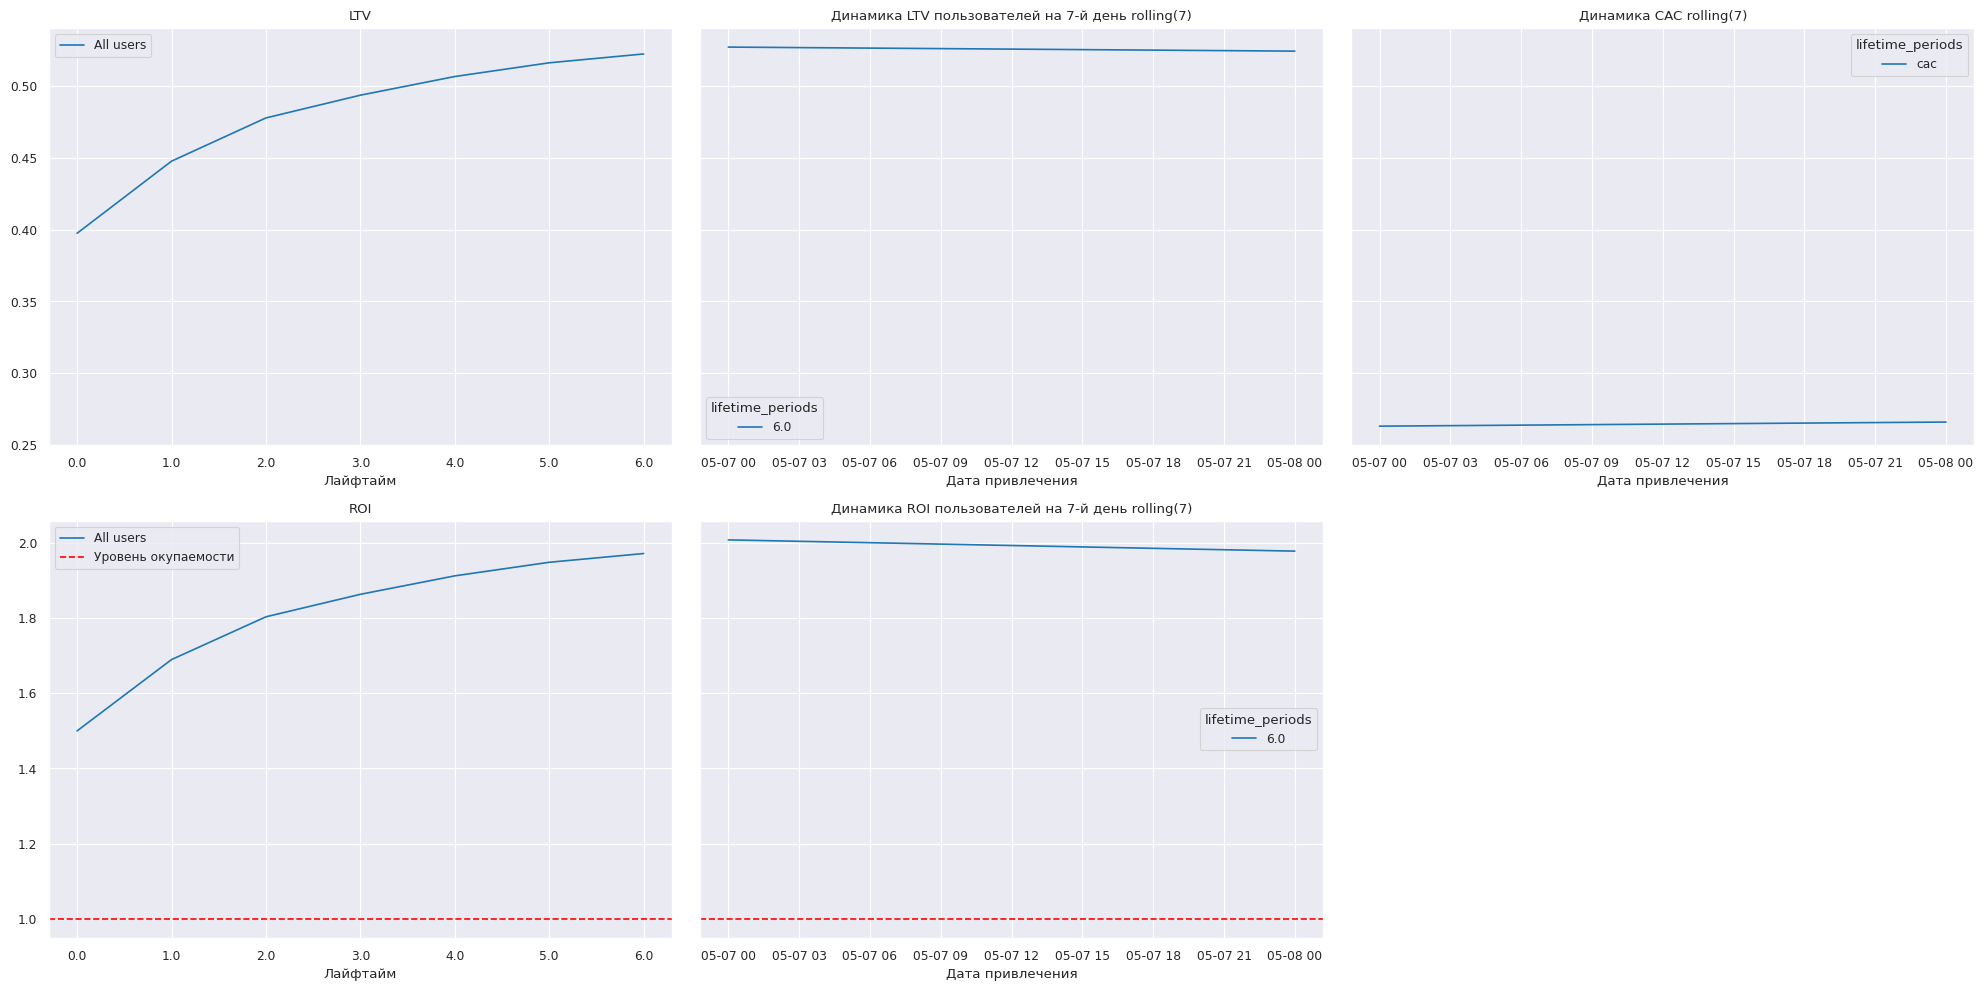

In [53]:
#@title Common situation
#Для начала оценим общую ситуацию — посмотрим на окупаемость рекламы. Рассчитаем и визуализируем LTV и ROI
_, \
cohorts_revenue, cohorts_ltv, \
cohorts_revenue_dyn, cohorts_ltv_dyn, \
roi, roi_dyn = get_ltv(orders, profiles,
                last_cohort_moment=_LAST_COHORT,
                horizon=_HORIZON, ignore_horizon=False,
                #first_cohort_moment=(sessions.session_start.min()+timedelta(0)).date(),
                dimensions=[]
               )

plot_ltv_roi(cohorts_ltv, cohorts_ltv_dyn, roi, roi_dyn, 7, 7)

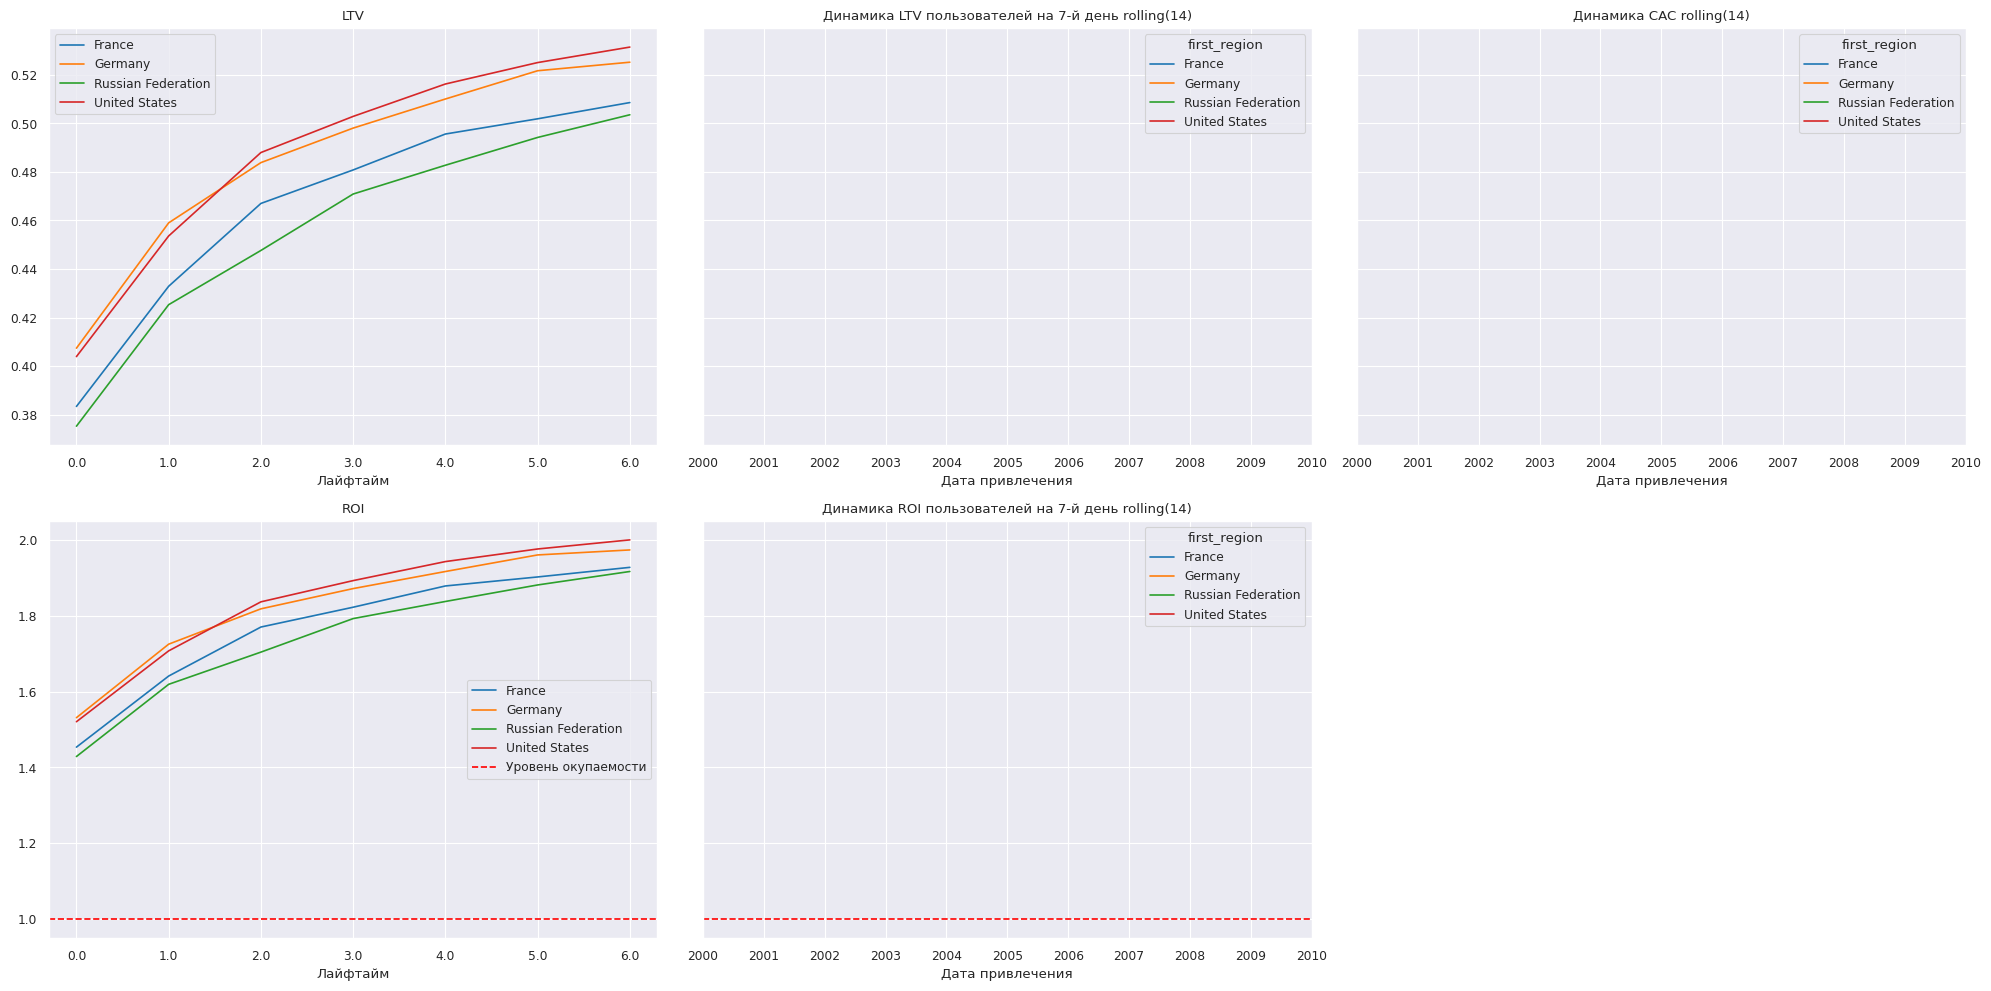

In [54]:
#@title ROI by region
#Для начала оценим общую ситуацию — посмотрим на окупаемость рекламы. Рассчитаем и визуализируем LTV и ROI
_, \
cohorts_revenue, cohorts_ltv, \
cohorts_revenue_dyn, cohorts_ltv_dyn, \
roi, roi_dyn = get_ltv(orders, profiles,
                last_cohort_moment=_LAST_COHORT,
                horizon=_HORIZON, ignore_horizon=False,
                #first_cohort_moment=(sessions.session_start.min()+timedelta(0)).date(),
                dimensions=['first_region']
               )

plot_ltv_roi(cohorts_ltv, cohorts_ltv_dyn, roi, roi_dyn, 7, 14)

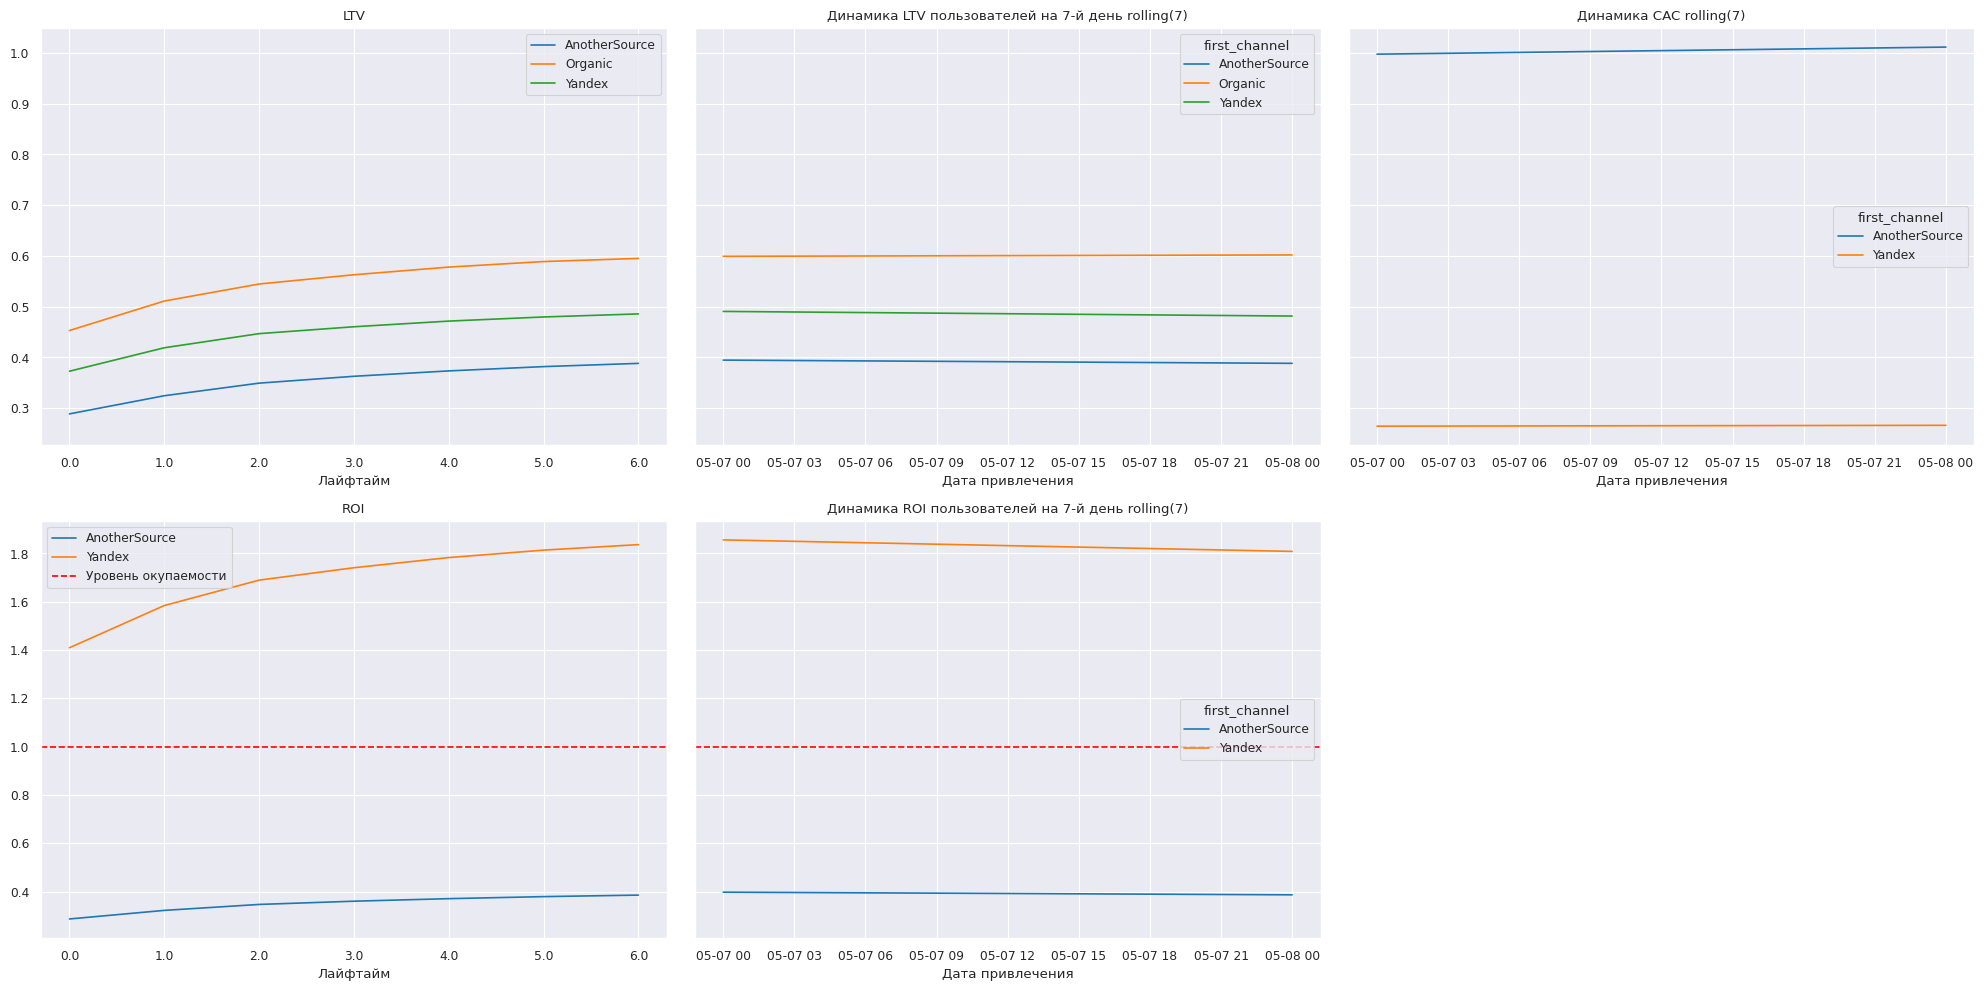

In [55]:
#@title ROI by channel
#Для начала оценим общую ситуацию — посмотрим на окупаемость рекламы. Рассчитаем и визуализируем LTV и ROI
_, \
cohorts_revenue, cohorts_ltv, \
cohorts_revenue_dyn, cohorts_ltv_dyn, \
roi, roi_dyn = get_ltv(orders, profiles,
                last_cohort_moment=_LAST_COHORT,
                horizon=_HORIZON, ignore_horizon=False,
                #first_cohort_moment=(sessions.session_start.min()+timedelta(0)).date(),
                dimensions=['first_channel']
               )

plot_ltv_roi(cohorts_ltv, cohorts_ltv_dyn, roi, roi_dyn, 7, 7)

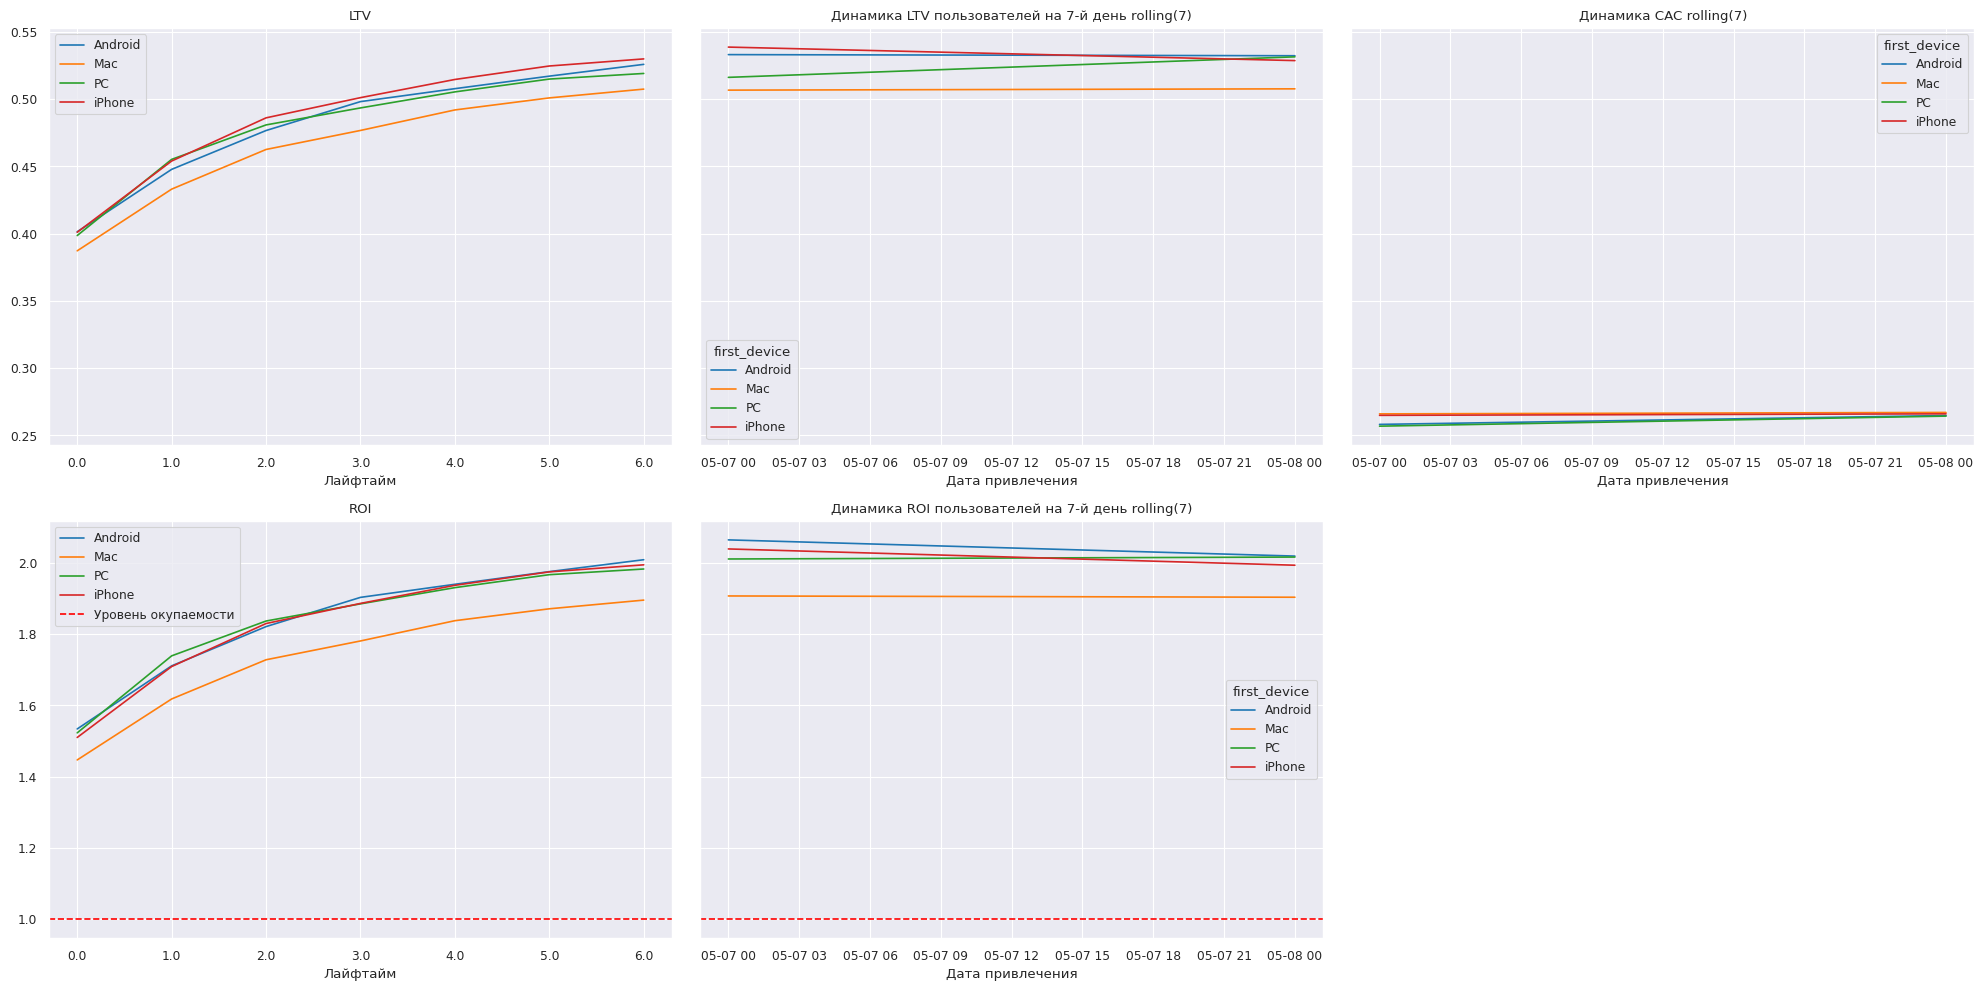

In [56]:
#@title ROI by device
#Для начала оценим общую ситуацию — посмотрим на окупаемость рекламы. Рассчитаем и визуализируем LTV и ROI
_, \
cohorts_revenue, cohorts_ltv, \
cohorts_revenue_dyn, cohorts_ltv_dyn, \
roi, roi_dyn = get_ltv(orders, profiles,
                last_cohort_moment=_LAST_COHORT,
                horizon=_HORIZON, ignore_horizon=False,
                #first_cohort_moment=(sessions.session_start.min()+timedelta(0)).date(),
                dimensions=['first_device']
               )

plot_ltv_roi(cohorts_ltv, cohorts_ltv_dyn, roi, roi_dyn, 7, 7)

lifetime_periods  cohort_size       0.0       1.0       2.0       3.0  \
first_device                                                            
Android                 16082  0.074618  0.083510  0.089044  0.092215   
Mac                     20188  0.073014  0.081880  0.087280  0.090004   
PC                       8379  0.076143  0.086048  0.091061  0.093567   
iPhone                  35985  0.074976  0.084591  0.090593  0.093317   

lifetime_periods       4.0       5.0       6.0  
first_device                                    
Android           0.094143  0.096008  0.097749  
Mac               0.092580  0.094363  0.095601  
PC                0.095954  0.097864  0.098699  
iPhone            0.096012  0.097763  0.098791

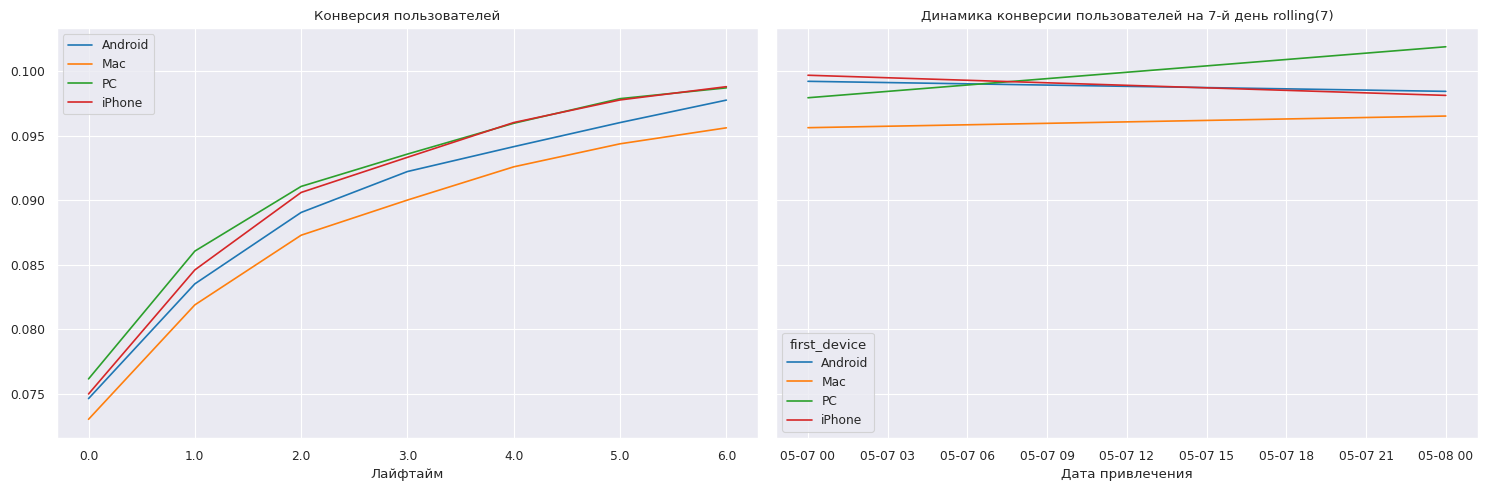

In [57]:
#@title Conversion & dynamics for issue (device)
#Узнаем, в чём причина: в низкой конверсии или низком удержании.
raw, \
cohorts_users, cohorts_conversion, \
cohorts_users_dyn, cohorts_conversion_dyn = get_conversion(orders, profiles,
                                                           last_cohort_moment=_LAST_COHORT,
                                                           horizon=_HORIZON, ignore_horizon=False,
                                                           #first_cohort_moment=(sessions.session_start.min()+timedelta(0)).date(),
                                                           dimensions=['first_device']
                                                          )
display_df(cohorts_conversion)

plot_cohorts_conversion(cohorts_conversion, cohorts_conversion_dyn, _HORIZON, 7)

lifetime_periods             cohort_size    0         1         2         3  \
purchase_event first_device                                                   
False          Android             14467  1.0  0.248842  0.146402  0.104237   
               Mac                 18192  1.0  0.238072  0.149131  0.101363   
               PC                   7532  1.0  0.236856  0.144716  0.101699   
               iPhone              32330  1.0  0.243953  0.147912  0.103866   
True           Android              1615  1.0  0.381424  0.285449  0.224768   
               Mac                  1996  1.0  0.397295  0.295090  0.236473   
               PC                    847  1.0  0.386068  0.285714  0.210153   
               iPhone               3655  1.0  0.378933  0.287825  0.203557   

lifetime_periods                    4         5         6  
purchase_event first_device                                
False          Android       0.078662  0.061174  0.049354  
               Mac           0.077287  0.063709  0.047713  
               PC            0.081652  0.065189  0.052974  
               iPhone        0.078070  0.061800  0.046489  
True           Android       0.170898  0.156037  0.134365  
               Mac           0.188878  0.145291  0.137776  
               PC            0.191263  0.153483  0.123967  
               iPhone        0.190971  0.170725  0.125855

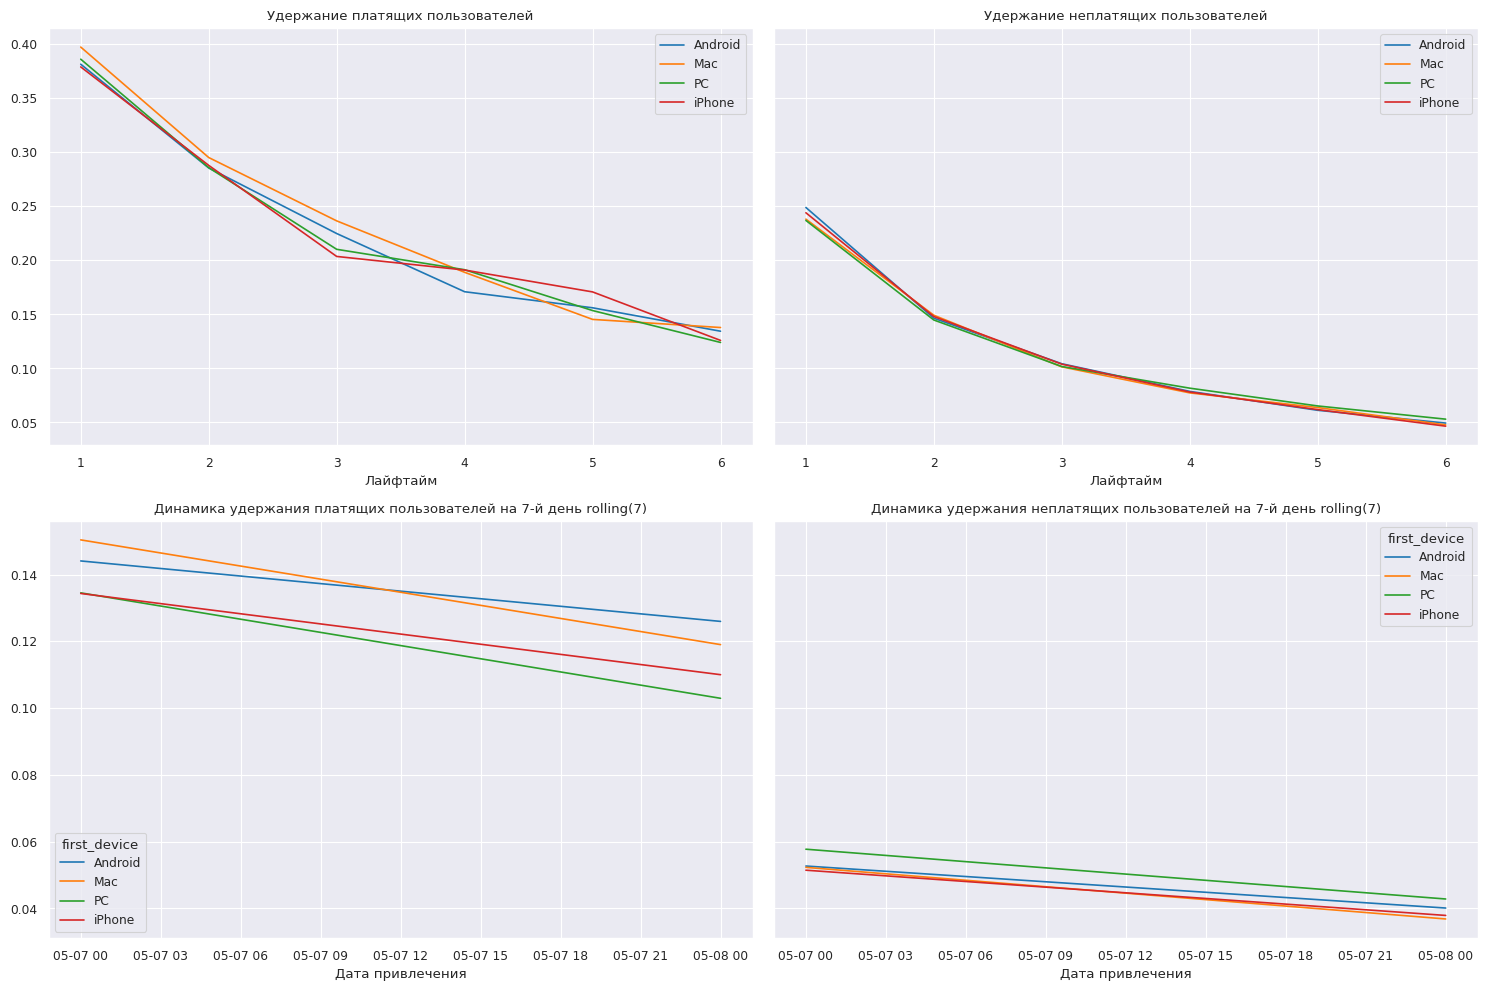

In [58]:
#@title Retention rate & dynamics for issue (device)
_, cohorts_users, cohorts_retention, cohorts_users_dyn, cohorts_retention_dyn = get_retention(sessions, profiles,
                                                               last_cohort_moment=_LAST_COHORT,
                                                               horizon=_HORIZON, ignore_horizon=False,
                                                               #first_cohort_moment=(sessions.session_start.min()+timedelta(0)).date(),
                                                               dimensions=['purchase_event', 'first_device']
                                                              )
display_df(cohorts_retention)

plot_cohorts_retention(cohorts_retention, cohorts_retention_dyn, _HORIZON, 7)